In [1]:
# Import Python packages
import math
import sympy as sm
from sympy import *
import numpy as np
from numpy import *
from fractions import Fraction
import matplotlib.pyplot as plt

Generate random data as $n_{xxxx}, n_{xxxy}, n_{xxyx}, n_{xyxx}, n_{xxyy}, n_{xyxy}, n_{xyyx}, n_{xyyy}$
---------------------

In [2]:
h1_range = np.linspace(0, 1, num=50)  # 0 <= h1 <= 1
K = 10000 # repetition
data = np.zeros((50,K,8)) # Make a 100 by K by 8 array

for i in range(50):
    h1 = h1_range[i]  # θ1
    h2 = 0.5          # θ2
    h3 = 0.5          # θ3
    # h5 = 0.5        # θ5
    
    p_xxxx = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxxy = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxyx = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxx = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xxyy = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxy = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xyyx = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)
    p_xyyy = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)

    # 1000 trials
    # increase sequence length (now sequence length = 1000)
    data[i] = np.random.multinomial(1000, [p_xxxx]*1 + [p_xxxy]*1 + [p_xxyx]*1 + [p_xyxx]*1 + [p_xxyy]*1 + [p_xyxy]*1 + [p_xyyx]*1 + [p_xyyy]*1, size=K)
print(data)

[[[185. 146.  79. ...  96. 147. 154.]
  [154. 159.  86. ...  92. 163. 155.]
  [160. 153.  84. ... 101. 149. 162.]
  ...
  [168. 155.  87. ...  97. 147. 155.]
  [139. 148. 107. ...  83. 147. 160.]
  [167. 137. 100. ... 103. 163. 163.]]

 [[174. 151.  98. ...  92. 160. 153.]
  [163. 196.  88. ...  71. 144. 138.]
  [147. 180.  78. ...  88. 137. 168.]
  ...
  [157. 159.  94. ... 112. 155. 139.]
  [159. 169. 100. ...  80. 164. 140.]
  [168. 145.  87. ... 103. 142. 173.]]

 [[167. 155. 105. ...  96. 170. 131.]
  [160. 159.  82. ...  85. 150. 161.]
  [182. 139.  98. ...  85. 155. 164.]
  ...
  [180. 151.  85. ...  91. 141. 156.]
  [161. 176. 106. ...  77. 157. 140.]
  [146. 163. 108. ...  93. 165. 147.]]

 ...

 [[276. 274.  86. ...  98.  42.  41.]
  [267. 288. 111. ...  70.  38.  45.]
  [283. 275.  83. ...  97.  46.  32.]
  ...
  [295. 254.  88. ...  95.  32.  42.]
  [272. 290.  97. ...  80.  34.  39.]
  [278. 308.  91. ...  78.  36.  40.]]

 [[258. 307.  91. ...  82.  41.  30.]
  [293. 294.

Find $θ$ and $δ$ that achieves the maximum likelihood
---------------------

In [3]:
# Reference: https://en.wikipedia.org/wiki/Newton%27s_method
def newtons_method(
    x0,               # The initial guess
    f,                # The function whose root we are trying to find
    f_prime,          # The derivative of the function
    tolerance,        # 7-digit accuracy is desired
    epsilon,          # Do not divide by a number smaller than this
    max_iterations,   # The maximum number of iterations to execute
    ):
    for i in range(max_iterations):
        y = f(x0)
        yprime = f_prime(x0)

        if abs(yprime) < epsilon:       # Stop if the denominator is too small
            break

        x1 = x0 - y / yprime            # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None                         # Newton's method did not converge


In [4]:
# case 1: 
# Notations to simplify expressions
def expr1_A(h1, h, h3, t):
    return h1*(t/h) + h + h3*(t/h) + h1*h*h3

def expr1_B(h1, h, h3, t):
    return h1*(t/h) + h - h3*(t/h) - h1*h*h3

def expr1_C(h1, h, h3, t):
    return h1*(t/h) - h + h3*(t/h) - h1*h*h3

def expr1_D(h1, h, h3, t):
    return h1*(t/h) - h - h3*(t/h) + h1*h*h3

def expr1_P(h1, h, h3, t):
    return 1 + h1*t + h1*h3 + t*h3

def expr1_Q(h1, h, h3, t):
    return 1 + h1*t - h1*h3 - t*h3

def expr1_R(h1, h, h3, t):
    return 1 - h1*t + h1*h3 - t*h3

def expr1_S(h1, h, h3, t):
    return 1 - h1*t - h1*h3 + t*h3

In [5]:
# case 2:
# Notations to simplify expressions
def expr2_A(h1, h, h2, t):
    return h1*(t/h) + h + h2*(t/h) + h1*h*h2

def expr2_B(h1, h, h2, t):
    return h1*(t/h) - h + h2*(t/h) - h1*h*h2

def expr2_C(h1, h, h2, t):
    return h1*(t/h) + h - h2*(t/h) - h1*h*h2

def expr2_D(h1, h, h2, t):
    return h1*(t/h) - h - h2*(t/h) + h1*h*h2

def expr2_P(h1, h, h2, t):
    return 1 + h1*t + h1*h2 + t*h2

def expr2_Q(h1, h, h2, t):
    return 1 - h1*t + h1*h2 - t*h2

def expr2_R(h1, h, h2, t):
    return 1 + h1*t - h1*h2 - t*h2

def expr2_S(h1, h, h2, t):
    return 1 - h1*t - h1*h2 + t*h2

In [6]:
# case 3:
# Notations to simplify expressions
def expr3_A(h3, h, h2, t):
    return h2*(t/h) + h + h3*(t/h) + h*h2*h3

def expr3_B(h3, h, h2, t):
    return h2*(t/h) + h - h3*(t/h) - h*h2*h3

def expr3_C(h3, h, h2, t):
    return h2*(t/h) - h - h3*(t/h) + h*h2*h3

def expr3_D(h3, h, h2, t):
    return h2*(t/h) - h + h3*(t/h) - h*h2*h3

def expr3_P(h3, h, h2, t):
    return 1 + h2*t + h2*h3 + t*h3

def expr3_Q(h3, h, h2, t):
    return 1 + h2*t - h2*h3 - t*h3

def expr3_R(h3, h, h2, t):
    return 1 - h2*t - h2*h3 + t*h3

def expr3_S(h3, h, h2, t):
    return 1 - h2*t + h2*h3 - t*h3

In [7]:
# case 1:
theta_2 = [] 
for i in range(50):
    theta_2.append([])
theta_2_unique = []
for i in range(50):
    theta_2_unique.append([])
theta_2_mult = []

# case 2:
theta_3 = [] 
for i in range(50):
    theta_3.append([])
theta_3_unique = []
for i in range(50):
    theta_3_unique.append([])
theta_3_mult = []

# case 3:
theta_1 = [] 
for i in range(50):
    theta_1.append([])
theta_1_unique = []
for i in range(50):
    theta_1_unique.append([])
theta_1_mult = []

cnt_0 = [0 for element in range(50)]     # number of times delta = 0
cnt_1 = [0 for element in range(50)]     # number of times branch 1 was chosen
cnt_2 = [0 for element in range(50)]     # number of times branch 2 was chosen
cnt_3 = [0 for element in range(50)]     # number of times branch 3 was chosen
cnt_4 = [0 for element in range(50)]     # number of times star wins

temp = 0

In [8]:
array = np.linspace(0.25, 1, num=100)  # τ < θ < 1
init = 0.05
tolerance = 0.0001
epsilon = 0.001
max_iterations = 10000

for u in range(50):
    for j in range(K):
        y1 = []          # δ (case 1)
        y2 = []          # δ (case 2)
        y3 = []          # δ (case 3)
        z1 = []          # log likelihood (case 1)
        z2 = []          # log likelihood (case 2)
        z3 = []          # log likelihood (case 3)
        A = data[u][j][0]
        B = data[u][j][1]
        C = data[u][j][2]
        D = data[u][j][3]
        E = data[u][j][4]
        F = data[u][j][5]
        G = data[u][j][6]
        H = data[u][j][7]
        t = 0.25         # τ
        h1 = 0.5         # θ_1
        h2 = 0.5         # θ_2
        h3 = 0.5         # θ_3
        d = symbols('d') # δ

        # case 1:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d) - B*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d) + C*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d) - E*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d) + D*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d) - F*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d) + G*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d) - H*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d),2) - B*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d),2) - C*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d),2) - E*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d),2) - D*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d),2) - F*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d),2) - G*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d),2) - H*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d),2)

            sol_1 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y1.append(sol_1)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y1[i] <= 0:
                d = 0
                y1[i] = 0 
            elif y1[i] >= 1:
                d = 1
                y1[i] = 1
            else:
                d = y1[i]

            h = array[i]

            # the log likelihood function
            expr_1 = A*math.log(1 + h1*t + h1*h3 + h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h1*h*h3*d, 2) + B*math.log(1 + h1*t + h1*h3 - h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h1*h*h3*d, 2) + C*math.log(1 + h1*t - h1*h3 + h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h1*h*h3*d, 2) + D*math.log(1 - h1*t + h1*h3 + h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h1*h*h3*d, 2) + E*math.log(1 + h1*t - h1*h3 - h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h1*h*h3*d, 2) + F*math.log(1 - h1*t + h1*h3 - h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h1*h*h3*d, 2) + G*math.log(1 - h1*t - h1*h3 + h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h1*h*h3*d, 2) + H*math.log(1 - h1*t - h1*h3 - h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h1*h*h3*d, 2)

            z1.append(expr_1)

        max_likelihood_1 = max(z1)

        # case 2:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d) - B*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d) + C*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d) - E*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d) + D*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d) - F*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d) + G*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d) - H*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d),2) - B*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d),2) - C*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d),2) - E*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d),2) - D*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d),2) - F*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d),2) - G*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d),2) - H*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d),2)

            sol_2 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y2.append(sol_2)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y2[i] <= 0:
                d = 0
                y2[i] = 0 
            elif y2[i] >= 1:
                d = 1
                y2[i] = 1
            else:
                d = y2[i]

            h = array[i]

            # the log likelihood function
            expr_2 = A*math.log(1 + h1*t + h1*h2 + h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d + h1*h*h2*d, 2) + B*math.log(1 + h1*t + h1*h2 - h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d - h1*h*h2*d, 2) + C*math.log(1 - h1*t + h1*h2 + h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d - h1*h*h2*d, 2) + D*math.log(1 + h1*t - h1*h2 + h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d - h1*h*h2*d, 2) + E*math.log(1 - h1*t + h1*h2 - h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d + h1*h*h2*d, 2) + F*math.log(1 + h1*t - h1*h2 - h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d + h1*h*h2*d, 2) + G*math.log(1 - h1*t - h1*h2 + h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d + h1*h*h2*d, 2) + H*math.log(1 - h1*t - h1*h2 - h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d - h1*h*h2*d, 2)

            z2.append(expr_2)

        max_likelihood_2 = max(z2)

        # case 3:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d) - B*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d) + C*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d) - E*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d) + F*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d) - D*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d) + H*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d) - G*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d),2) - B*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d),2) - C*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d),2) - E*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d),2) - F*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d),2) - D*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d),2) - H*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d),2) - G*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d),2)

            sol_3 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y3.append(sol_3)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y3[i] <= 0:
                d = 0
                y3[i] = 0 
            elif y3[i] >= 1:
                d = 1
                y3[i] = 1
            else:
                d = y3[i]

            h = array[i]

            # the log likelihood function
            expr_3 = A*math.log(1 + h2*t + h2*h3 + h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h3*h*h2*d, 2) + B*math.log(1 + h2*t + h2*h3 - h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h3*h*h2*d, 2) + C*math.log(1 + h2*t - h2*h3 + h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h3*h*h2*d, 2) + D*math.log(1 - h2*t - h2*h3 - h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h3*h*h2*d, 2) + E*math.log(1 + h2*t - h2*h3 - h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h3*h*h2*d, 2) + F*math.log(1 - h2*t - h2*h3 + h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h3*h*h2*d, 2) + G*math.log(1 - h2*t + h2*h3 - h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h3*h*h2*d, 2) + H*math.log(1 - h2*t + h2*h3 + h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h3*h*h2*d, 2)

            z3.append(expr_3)

        max_likelihood_3 = max(z3)

        max_likelihood = max(max_likelihood_1, max_likelihood_2, max_likelihood_3)
        print(max_likelihood_1, max_likelihood_2, max_likelihood_3)
        if max_likelihood == max_likelihood_1:
            for k in range(100):
                if max_likelihood == z1[k]:
                    theta_2[u].append(array[k])
                    if y1[k] != 0 and array[k] != t:
                        cnt_1[u] += 1
                        theta_2_unique[u].append(array[k])
                    if y1[k] == 0: # delta = 0
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        elif max_likelihood == max_likelihood_2:
            for k in range(100):
                if max_likelihood == z2[k]:
                    theta_3[u].append(array[k])
                    if y2[k] != 0 and array[k] != t:
                        cnt_2[u] += 1
                        theta_3_unique[u].append(array[k])
                    if y2[k] == 0: # delta = 0
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        elif max_likelihood == max_likelihood_3:
            for k in range(100):
                if max_likelihood == z3[k]:
                    theta_1[u].append(array[k])
                    if y3[k] != 0 and array[k] != t:
                        cnt_3[u] += 1
                        theta_1_unique[u].append(array[k])
                    if y3[k] == 0: # delta = 0 
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1

                    break

-0.3109390256128677 -9.513000128114136 43.216529619120465
-26.08563691081538 -24.840524412978866 29.944425491828525
-22.208910684388833 -25.182913533104255 27.168131526400973
-41.42778255458659 -37.017510094752176 10.138009173811728
-25.236011903603803 -13.61496192379618 31.082608746230164
-14.644983876875031 -23.249274627439775 24.716877659198694
-18.31165981204171 -15.807162648441782 34.36769690715972
-49.575861906488456 -41.27511192091157 17.11193558998233
-37.94367405998746 -34.63541520624085 6.978442659165169
-61.84052441297888 -44.4086596776026 -9.960338433800793
-10.275111920911584 -19.405936905046133 34.65281453726813
-18.172207686090005 -12.434346549517223 38.527521372768184
-28.813933233145846 -34.685393866670374 25.30341379267784
-21.593347245874448 -15.574853418634568 18.09591907979291
-18.488540588019234 -16.67540157655349 22.153450510578587
-10.291459195556506 -1.4250000508852878 45.973089846401734
-10.896161900719207 -4.255561912257704 48.454200496155465
-39.010449414421

-37.40593690504615 -28.690149420190423 24.434650487501585
-24.180176531955 -16.022131567195537 27.65296131133265
-0.989407134201798 -0.8102247179362365 65.91424712606684
-14.237344752128777 -17.117052468669243 38.90071747707085
-30.25556191225771 -29.010449414421167 25.362348383112668
-8.176925932157289 -11.382712280940922 45.88041952638378
-11.192202143856278 -8.061741170115752 34.998273352773175
-17.83617868093311 -33.45940967038905 25.526336450493815
3.234663083415356 -7.141274398555751 50.96793897033732
-9.085636910815396 -7.425486913699984 39.47375050480934
-19.278342778902285 -27.876234231825947 19.79814807647244
-4.559324436055839 -23.639507811777918 25.32337551202091
-15.729249437498147 -42.706686890623 24.529387992549715
-26.350299417305806 -32.98628769753702 28.30817123541272
-36.879542977734715 -32.35029941730577 23.476527136544895
-16.497789018088866 -20.23601190360381 41.60457548894393
-25.49127706032388 -32.260689069044474 10.68480693775178
-34.839032141413426 -33.7457869

-40.730495733664796 -38.20588422908958 22.736487497647918
-28.423013432697438 -26.78504389975349 26.010399288144846
-40.67059941153654 -38.595411915142336 19.509837983895792
-6.595411915142314 -6.964282680660276 36.70987674277442
-41.55932443605586 -50.69014942019042 -6.281136997354132
-27.628722762493297 -23.684422346423815 25.76477541467093
-15.500674410094234 -17.088176028056132 40.52938799254967
-25.40593690504614 -21.255561912257697 36.12348952428732
6.960585411921095 12.446464733900896 51.28965210087085
-49.60958072544508 -61.462474442795994 -0.979104006098531
-19.029999423075047 -30.236011903603817 28.284275494713157
-39.17550629851377 -36.6056515580011 3.871003468939556
-19.500674410094206 -7.464586931007744 24.078263014184387
-9.626605035916931 -7.608254242522641 49.548819002818995
-26.4826643000562 -32.841618946313716 4.0602052770959425
-47.595411915142336 -45.10518691946926 10.095299053939577
-15.192073929094747 -18.789904458379688 21.84340643513142
-27.816891143770555 -36.5

-31.324513655266443 -26.491364044299118 32.138176502646026
-23.029999423075054 -36.31119939999806 28.019612988222747
-24.207112341640666 -26.89182469826536 34.70284531189487
-9.879624430286597 -19.284098180782983 21.248188015626695
-26.3772478653758 -21.085636910815374 39.651226716812786
-10.869971950916607 -32.56264466216541 18.843883703992223
-13.350299417305777 -17.08563691081538 32.71886300264588
-4.614961923796201 -17.48112440144037 37.30382550336702
-25.76701978609153 -25.1271627110303 25.151047848412464
-28.25506334293516 -18.66520311144773 18.655217097356402
-13.30468815561293 -6.462391923770667 44.77003370795528
-21.980845474791806 -21.90569070718132 36.11052069261947
-36.10518691946929 -38.36168269618619 14.948458169194422
-16.10518691946924 -23.99089940576726 32.03916299687662
-32.2555619122577 -27.275111920911577 20.454200496155465
-24.495264848760527 -27.18409238927324 32.702896735404494
0.8391755927903972 -1.6510494028826912 54.79405049904009
-34.09604788845272 -42.500674

-33.520224418748086 -38.500674410094206 20.12348952428732
-28.29466192956545 -37.84052441297887 11.548938001203545
-24.115305732006412 -14.491535379077675 41.04449357374034
-21.123073651187852 -20.889972969516954 34.91169243808238
-48.87959174199176 -56.76483834726203 -2.8104620103349376
-28.611291221999238 -32.32161037763543 19.687929715111586
-23.93431572665761 -24.661460380519998 22.548938001203545
-11.840496242355982 -7.092001797316172 24.181345137421445
-40.7262368992769 -32.42548691370001 31.490287975241927
-32.42548691370003 -37.40593690504616 28.169987981011175
-31.472321642416333 -29.45997002516986 20.83675609656
-11.027525942072437 -17.25159844240278 31.247368573311135
-27.631499394228804 -12.275111920911577 39.78924833402314
-18.243768454622213 -31.602639019779858 47.32115922996191
-18.952897149139638 -19.152119048544485 37.33245272214487
-16.81390768787182 -25.94766343098152 29.912683744787753
7.842856177780661 18.530919538213325 37.381408406670104
-12.82944679089185 -14.01

-15.350299417305806 -22.820974404325 35.28427549471316
-9.374978317314486 -6.066595563084675 33.38125117164711
21.04518807331914 0.2933131093769532 55.90833801274201
1.2346630834153913 -2.500674410094227 42.32337551202092
-16.350299417305806 -15.517339026742754 26.444729742176072
-35.42802603094079 -33.729211370246375 25.557135449827676
-35.27511192091158 -28.21947443317122 3.7384130112997482
-39.334857666223286 -47.25506334293509 9.192423381670386
-14.915213340050443 -12.649806481623607 38.50941467646241
-11.584680724045668 -20.755153774678213 36.05625444080626
-53.402618772793325 -52.866040308068875 12.950857701265235
-28.33074940865191 -30.405936905046133 35.242123935349554
-24.176410946008602 -30.511902132541998 33.29674252581364
-31.752190940644724 -33.55631189783456 46.21774999551459
-14.894287834130338 -8.921678309430895 36.5047620158976
-21.935261918026946 -26.085636910815374 27.223835841955836
0.8230740678427182 7.559559089349776 41.173000519232446
-18.663532695083333 -29.4879

-26.887022869702648 -18.69014942019041 29.869237995434332
-30.971986501370523 -36.84032652907037 26.969686087574978
-17.27511192091159 -18.93526191802696 23.399061577737708
-14.670599411536557 -13.425486913700041 35.59510473496452
-14.556311897834576 -3.3502994173057914 46.68847318226625
-24.182789319151986 -40.97620165938157 19.944425491828547
-34.830268494195295 -43.7844464181842 25.86870789215307
-17.168012529523118 -26.26503266623706 38.16100172113974
0.2346630834153629 -2.2555619122577113 40.493300513463204
-25.89615398818134 -10.539774427401994 30.963975500482384
-29.44802464758999 -36.5506920806248 23.337564791266693
-28.595411915142307 -22.965651738406535 18.303825503367044
-44.500674410094234 -35.57308527475291 13.604687641452683
-33.56769517671497 -22.4107390700631 38.03978407652228
-43.074095319710565 -46.82097440432496 24.992054562019735
-20.995701570784277 -30.265032666237104 35.71001760369586
-28.214636047543983 -35.72265378382319 9.961436383241661
-30.043324094757324 -27

3.7755296875009563 12.482660973257246 50.664528709405715
-15.765336916584651 -22.67958567140799 35.69931299399198
-21.020568226958318 -6.105186919469254 44.94442549182855
-40.935261918026946 -36.911366177327324 8.039162996876627
-24.784527465303704 -11.12226344712058 29.666527702868347
-39.912263425666886 -36.38478371234174 30.39249892813799
9.570053939533786 15.313299063515764 56.31874869910517
2.903952111547234 -6.926551721098747 38.11852046915749
9.353308965190507 16.879352083886594 47.41673492079926
-19.867954577124152 -10.18541051614448 36.13421926312039
-21.09702018969581 -21.641910371866175 37.69201283639793
-30.75203231795671 -27.962375182326937 13.515627153852607
-33.988425924764705 -18.976901052575464 21.863936247557305
14.11248793735178 15.294881406701535 79.40392069820763
-26.689951536281924 -27.984633887725465 29.276692903843845
-37.80658627622955 -25.35818498039113 16.636924614992903
-19.18037441586351 -14.199924424517363 23.153949079901142
-63.31402038945113 -58.55380543

-18.350299417305813 -14.473573190879236 22.323375512020874
-15.43495766767937 -18.697547859606516 54.67339545765076
-37.967003665067665 -44.987450922061086 29.811986631759822
13.721076913040505 24.37635438751724 63.280026712747485
-6.341556989511432 -16.24828148462278 43.388323365556374
-12.8073372008107 -15.639939725671724 38.85785471655385
-31.176531430725703 -31.905455990589545 22.394296445397863
-30.318024217502952 -27.007975933418614 30.310472195177983
-11.551039126076994 -21.070813953998616 27.887217828779644
-30.55624407507345 -24.320493489868326 36.43442608392508
-32.575861906488456 -22.614961923796216 23.869237995434304
-10.6837960994092 0.6264532491519503 44.20209921994204
-24.37089026011735 -35.47994146890169 19.400097568457127
-27.50067441009425 -27.454507676333293 31.434650487501578
-3.5973741003112636 -8.863429563641752 39.25196219076473
-18.714046814699138 -18.238426806892335 25.655134901048626
-4.154259284066448 -8.813197994543678 57.30143708876906
-35.93721019499275 -4

-13.4450369223539 -16.28218057593122 25.985998990138828
-18.010449414421174 -15.105186919469276 27.64367550625166
-24.567151709560278 1.1492751316765464 34.24066442031341
-5.5070651939463815 -13.899190984517816 53.06362930471155
-21.180374415863483 -22.83763902097349 28.22062958942367
-3.035869384160364 -8.957900465574092 52.036496605772385
-26.029999423075054 -29.350299417305777 17.45828950816521
-32.13029767720836 -24.510074859960675 15.009667028175944
-1.9543133573582594 -13.160824407209596 33.3233755120209
23.65901094848926 11.48449390508165 58.52216088791218
-34.91571190937307 -28.09043907583235 21.54092958365454
-3.0104494144212026 -11.726236899276927 48.03916299687658
-11.136928666509924 -20.483663518681112 45.485926829325294
-12.00465898178959 -15.23327018567268 42.81174164486363
-9.619290660523447 -6.762603671990419 37.46291069308363
-10.180374415863497 -10.180374415863483 32.98352550913627
2.893917956182598 9.59439233269456 51.86431417964553
-28.54567440722461 -36.82852371835

-7.243151946107865 -12.015355874430114 34.75186194283906
-15.83160493287982 -14.90657287835657 33.23777703798928
-39.44983908737084 -44.127788470178956 -4.318533875361164
-20.40593690504616 -12.935261918026953 35.62412549759776
-43.31119939999809 -30.445036922353907 24.33991298245347
-26.252676520252308 -23.35029941730582 26.039162996876577
-6.275111920911584 -5.860074421632731 27.389092254435752
-32.74483330649213 -27.910747261815757 22.505167121434233
-11.520224418748093 -14.010449414421153 30.398563008415145
-1.4925076803207702 5.744438087742253 55.133900501924685
-17.99089940576733 -10.93305791701578 36.94462337573702
-16.066086902161516 -10.670599411536529 44.555356659099
-39.750529484034956 -44.29161419347675 27.01142810869542
-28.294122291750277 -22.662365345519113 29.503433951181854
-32.35029941730579 -37.33074940865191 22.84968798678043
-40.39144345340695 -35.673292712588136 23.90604014966288
-27.039016499283854 -16.41470317067374 42.898921441806806
-21.971349397113386 -9.1051

-30.180374415863476 -32.67059941153655 24.063058737576267
-25.0414449944395 -26.79116847688755 45.22527624616379
-16.818370550868764 -22.98568547846085 25.72367860641637
-44.67369469738098 -55.6167105082076 19.510320777030344
-20.99570157078425 -34.46157439278649 39.856106644675855
-40.7262368992769 -24.95481192668082 24.01961298822274
-19.176925932157218 -13.238680230952419 30.537554722323137
-16.7084531527618 -8.817544013957082 41.866748221750086
-24.10138753030207 -19.75631063185496 23.486688419383945
-13.338757826200982 -15.2749140370031 31.619538978774926
-13.275111920911556 -19.91571190937306 30.303825503367044
2.084288090626906 0.0091005942326845 51.888788004088156
-29.614961923796244 -37.68198269041691 18.114350493270805
-18.668258872913718 -9.271148451056632 36.58636203724693
19.139925578367276 7.103838099280814 53.58803801851132
-13.636139460246234 -1.5177509377455252 49.61377606572749
-22.99395094782313 -19.51205768897465 42.54532180579029
-46.501598108768796 -42.42128270203

-37.8796244302866 -47.009950845098594 4.869237995434304
6.819625584136496 1.4241380935115515 48.32337551202089
-33.14532937924237 -20.266943034755876 20.794050499040097
-22.500674410094256 -21.93506403411844 34.35946299110736
-5.6149619237962085 -20.556311897834583 38.89792703510469
-0.5202244187481426 -9.235086165046233 44.213177010328685
-21.539774427401973 -25.690149420190416 13.323375512020903
-48.20419212773246 -51.63779191630875 11.546436662948867
-14.915087031477881 -12.80075444365643 41.1321367670015
-16.932376526021592 -17.76533691658463 26.65521709735648
-17.158877709201278 3.569403047462515 37.19990978999237
-10.879624430286626 -20.24081406862078 20.663225514905513
-12.425486913699999 -18.777528654971476 41.529387992549694
3.1594755870211415 -0.1608244072096241 48.39856300841512
-23.48112440144037 -17.944248177898444 41.264725486059255
-13.765336916584644 -15.840524412978851 33.84019168752694
-24.123765903152375 -35.59522134528921 14.156054357966324
11.3417036344985 4.220876

-27.678360056357306 -20.915723808598315 24.028829517597373
-29.2503823398401 -32.1642089084114 28.046735681318147
-18.709699428844253 -33.2360119036038 23.209087998318957
-13.595411915142314 -14.84052441297883 33.30382550336704
-36.202975966573156 -39.72189116723115 13.959266259145474
-1.4622251493049205 -4.396201569835249 38.89285381670516
-39.00959984364466 -11.314010364406585 6.784451112811542
-10.931372340073573 -16.247393026101967 18.868599719883367
-23.279186251612266 -32.41234093776003 42.62417352726712
-33.0660869021615 -18.954811926680847 26.010626728351287
0.02631189151937008 6.614581808126779 47.811978474497494
-23.403119223400452 -9.225676902987232 45.723208734691624
-44.16082440720963 -29.345953685260042 11.454200496155444
-11.5954119151423 -2.5747329027484653 26.940825935970565
-15.520224418748136 -19.670599411536564 29.718863002645847
-18.840749988220324 -28.947453656413785 29.748661979273656
0.2542130920692216 4.40458808485765 46.738413011299734
-35.25556191225769 -33.1

-13.275111920911577 -12.029999423075047 22.41811301706899
1.8391755927903901 7.6501991520168175 47.49330051346322
-20.007564022415778 -15.857189029627364 25.228638006972787
-14.924698169244536 -0.6056515580011279 36.59719059118145
-28.41970504390642 -52.471502281610256 15.570733342742464
-19.925182663352537 -2.0987424486626836 37.40770203943159
-17.50067441009422 -10.445036922353893 30.46236722592894
3.1203755697133744 -13.066086902161544 38.44996030304235
-18.670599411536557 -14.935261918026967 32.5229839598357
-14.745786907930771 -5.19992442451737 32.56848800985742
10.329400588463436 2.028650602886586 59.71886300264586
-3.556110324021823 -3.515853011270906 44.60487457951313
-23.148268250715425 -23.471985370423887 38.96832123252812
-28.62791854925657 -41.91388102569965 10.897927035104713
-16.246422881241216 -20.08563691081541 30.96397550048239
-4.092564480781888 -26.24324911519799 30.42431339541154
-18.63663188135073 -5.48141342196503 27.75266470821104
-15.614961923796194 -23.50067441

5.009100594232713 6.2542130920692 55.64367550625164
-29.566273693177642 -10.87258450591878 31.724903762557968
-21.9908994057673 -26.141274398555744 45.81078585338118
-37.766061858576684 -23.650613457397696 10.862249642158723
-6.246851715329555 -9.442905383955619 60.747084174182696
-11.652264504905098 -16.012988531661946 35.11584276483629
-13.297713471621265 -28.252387754693217 31.08174379675603
11.879352083886616 4.940213667089701 43.53109667294453
-5.658483555071591 -11.054545311056692 47.48016916270474
-30.84052441297886 -26.813933233145853 23.148193321993546
-15.595411915142321 -18.915711909373087 34.20908799831892
-19.68670093648418 -20.967912726470765 31.832275933727544
-33.971349397113414 -9.989822931978836 24.169769816246685
-46.41033260998535 -38.762014470981505 8.571264641592945
-26.144286936776986 -31.02086039205856 -2.4871494778828804
-38.21927654926276 -50.40593690504616 13.92532278638475
-9.974164051426222 -18.292435462870444 23.539467247224156
-37.09462317068685 -31.61032

-4.494885516038245 -11.34158922037765 39.49971917135864
-15.651049402882649 -7.765336916584644 41.20908799831894
-17.389486802131692 -31.532416157134946 24.42088964880452
-12.289498128397497 5.694738857017718 38.50353329032565
-11.160824407209596 -10.330749408651918 44.48016916270478
-21.91571190937306 -15.925069889066549 31.0058521495257
5.176486478434256 8.424138093511552 61.548938001203545
1.7526081898849881 -10.744802768135948 37.47991431716053
-23.575861906488456 -12.369849425959686 27.888788004088177
5.990697665153256 -7.0525151777613075 42.203372260070594
-19.78895638727724 -7.729368748131478 32.21880639182187
15.839175592790404 7.953463106492386 68.96397550048243
-11.433495331249034 -21.405936905046154 32.595104734964565
-21.405936905046147 -13.093645328364516 34.20908799831891
2.70533807043455 -15.556311897834576 38.39856300841512
-4.255561912257704 -0.1051869194692614 37.66322551490552
-31.520224418748107 -29.029999423075047 13.79099895698425
12.693393369081683 7.304567621164

-22.010449414421174 -24.059668244266113 30.284275494713143
-24.517095697005452 -27.905786323180997 21.214432824454363
-23.10619831489778 -5.654690621075716 52.34041155177611
-38.48774805556816 -32.686185950335506 20.019612988222747
-21.234478189286996 -13.630548462595186 15.377558330084437
-6.120647916113398 -13.348846527740555 33.95302825735526
-6.405936905046161 -1.9064015435779922 47.1339005019247
-24.80416999520746 -22.83085556777209 36.64302615260916
7.970000576924953 3.17422343065806 37.8527005250017
-25.89187116887586 -24.562412974949154 34.93646864762491
-2.2846082201650475 4.683896835371655 46.086333166622516
-28.38888823464695 -30.17223029792119 23.387276300617167
-22.032565326337682 -34.570843791323625 21.735998108011245
-3.02635802514866 -15.053668594665929 23.559183960901144
-12.177366038850487 -13.837165465736504 38.88690074578821
-20.765336916584637 -19.93526191802696 24.888788004088184
-26.142607247080655 -31.892300346330074 42.80071295933038
24.933913097838513 24.51887

-0.7892250712690796 1.7724263554841428 46.98787040667795
-8.465097117346865 -8.162864033711735 38.97812796863984
-24.02131750691521 -19.27298515850898 36.42381067577587
-31.54710663999284 -17.770139081601563 26.604773372852407
-14.006953102309915 -22.182599689753104 37.038587459054526
-15.097742587163289 -21.742587916828235 34.730338307041904
-5.494231156647231 -17.751463312590744 40.14734943346404
-7.820974404324971 -9.481124401440354 53.18953798966506
-16.745786907930786 -21.311199399998067 45.50983798389578
-2.419068255804582 -8.255561912257676 33.767102050970074
-8.244361784671995 -24.12980066091294 33.0083497386025
-22.425486913700006 -9.740089249223907 17.01435614517604
-18.27511192091159 -27.082188427109124 30.284275494713135
-26.651049402882684 -10.41842019724681 26.47375050480933
-34.105186919469254 -34.52022441874812 14.039162996876634
-36.14064856417997 -38.046100948022726 -0.03206301728957506
-42.274242422973906 -19.0798483434139 13.697170469181444
-19.90704403984654 -8.563

-19.66311328933775 -15.973801983312178 29.663427088718244
-7.216025949464957 -20.11740840264838 31.310143873202588
3.381657026078166 4.563528870656121 38.833769139087
-18.19049322840064 -9.860512010589474 51.19867702068158
-23.828510741038905 -23.893356372931734 37.246667748970864
-10.010449414421174 -10.840524412978866 36.05871300553049
-12.40593690504614 -0.7848869252385029 36.15345051057859
-3.566722875471946 -1.1533962862923062 40.73841301129975
-19.618670248112416 -23.175076717723883 24.53697208804691
-23.369348575859945 -35.755577166609065 20.606360214449953
-13.16082440720961 -6.1051869194692685 37.20010173844754
-18.575861906488456 -16.500674410094234 40.35996156042994
-20.49921536333595 -17.898576804007703 33.44827630320599
-27.482528999852434 -30.40992988146249 21.840170255134733
-9.670401527628044 1.2216563102774955 40.31051013491397
-1.0200592707997558 -0.18838813663194287 43.51786885711746
-32.61248844279361 -35.95606207545662 14.335702108918078
-35.25556191225768 -34.8405

3.1514671694720136 -9.726236899276898 45.05871300553048
-34.31119939999806 -26.425486913700013 34.58502548029001
-26.17736953299297 -35.38880179968082 18.01798069308667
-29.18037441586351 -31.670599411536557 24.37100458221218
-10.350299417305798 -18.96109347832983 40.34874228282133
-10.140184792937852 -20.58359596515748 22.469969185500723
10.012745459252308 10.31329906351582 48.48251104007938
-4.116026731194978 -18.443542768884555 48.7745004903862
-26.745786907930786 -17.058535691600362 25.549772882897926
4.669250591348117 -0.31119939999803137 57.37901299976125
-36.27511192091159 -38.35029941730581 12.468948339792375
-21.811835373308483 -18.384507226548166 32.53518619255113
-37.708899885613704 -47.21178114669342 8.77697397138876
-12.784886925238524 -16.935261918026967 21.663225514905513
6.797034586565083 -4.536234124724878 37.407273205343266
-11.980643486983737 -4.907885402184725 33.862647498094624
-41.57586190648844 -37.4254869137 24.41798587085305
9.4797755812519 2.8391755927904114 4

-2.4175308580034383 -13.425949932110917 48.38819039385672
-7.509415391098436 -9.897756805505622 40.84241352686976
-14.02999942307504 -13.199924424517363 19.173000519232474
-0.08563691081538138 -0.915711909373087 47.22863800697281
31.839175592790404 32.66925059134808 69.61047341917049
0.6301505740403144 -14.726236899276884 40.20928588222741
-3.4811244014403826 -2.236011903603867 57.11435049327083
-7.330749408651904 -6.480154035113635 45.036623879635854
8.741898970501545 5.905376829313127 58.32838215819662
6.882628740839692 -4.863720579806817 41.202825725833804
3.13992557836724 -9.311199399998046 45.13136138468388
15.763988096396211 24.110904815734017 58.09781302283827
-21.181108410815355 -21.385747778603154 29.76606632652399
-7.255561912257711 -1.986553673721545 35.09890332700405
-20.50067441009425 -18.840524412978866 33.8692379954343
-28.954811926680804 -34.75379532547985 11.718863002645897
-7.010449414421153 -5.765336916584637 35.741298403305095
18.61876729515994 7.179025595675036 49.

-26.58967411123534 -19.720539240570048 18.228638006972794
-25.932702780910702 -18.39920862370809 29.19589148060187
-1.2555619122577113 -0.4254869136999915 42.84228954736429
-10.359285677177247 -7.180374415863525 38.05871300553047
-13.928554370096293 -5.013884243300062 27.994533203786183
18.724888079088444 10.424138093511559 50.916504742515556
-11.745842890607783 -10.574704282510169 31.647930739158618
2.3676695240134933 10.306799037753777 51.759947230854145
-11.08415639331647 -0.2655093612616639 34.545746657354314
-14.373309981013819 -6.935261918026953 40.28836450672289
2.6187672951599197 -9.651049402882663 40.594456676406736
-25.9908994057673 -24.745786907930757 37.52137957500066
-15.722193162048484 -16.12906017119682 21.39266302859248
-19.55821692196819 -34.31253224852295 14.473750504809338
-9.508262566268073 -15.006565036340426 17.424339253155093
24.66925059134808 25.110256757176188 63.68277552355938
-9.10518691946924 -10.350299417305784 29.493300513463225
-44.02999942307506 -37.3893

8.249410927052274 4.896297115160337 44.323573395929365
-18.06932707801772 -23.255059654998256 26.50500966486159
-26.803857481666483 -26.151514041414508 32.49593065435545
-29.147886492634946 -27.571789153411515 33.02009134316356
-21.141274398555744 -7.755080997801045 39.86923799543431
-5.854499773053362 -13.904953152133317 42.00585214952572
-5.524125102599598 2.6179588356535035 54.670292231358744
2.045188073319167 -5.01044941442116 31.201689558902814
7.705344362866271 -2.194135254560564 44.778246540354445
-2.4450369223538644 -15.514435248791308 41.96397550048241
-30.562757170679262 -40.022368780278065 16.828643331125505
-1.4692100985909349 4.468935769526155 46.57667265449739
8.481267852817346 11.061136089895882 49.63632625915605
-29.793255509515404 -20.643294016512712 31.00011047996242
26.301942505047812 24.616604166299673 73.06234759021021
-32.65032356561562 -30.058535691600355 14.078464587997072
-4.5202244187481355 -6.595411915142343 34.078263014184344
-12.816009910297524 -11.08017415

-6.366400942253421 -9.1803439824155 31.493300513463197
7.13992557836729 2.574513086299987 39.09781302283825
-40.25556191225771 -30.70969942884431 11.858398183708577
1.4631147089834045 0.6990565187855111 56.1155693525514
-12.195503891076939 -10.398127389196837 30.471402313622544
-10.210984142182767 -14.5525027725566 33.884333132889495
-37.26721717035949 -29.700989231916154 26.169440496602302
-32.045074267689046 -36.151685376193086 19.016561446166897
-17.58438431804415 -11.437938468977144 33.3280142732484
-12.010449414421174 -12.425486913700013 34.47375050480934
4.499523473814236 11.567190999864657 54.17574980799081
-27.780694765648036 -37.98385823458817 3.2122039116701897
9.49932558990578 16.139925578367283 47.08697321111249
-3.6860604081806443 -5.79688977880253 41.99975034265863
-0.5954119151423498 -5.990899405767323 45.104879739291455
-1.7309945132707085 6.36124787443682 48.55699707065152
-15.820974404324978 2.8557130632229857 28.173000519232467
0.6497005826941944 -7.651049402882677 4

-15.484357841254905 -12.293169658000018 26.66967964884786
0.894813080530767 -10.702980543210174 46.284473378621655
-3.556311897834604 14.705338070434557 45.41811301706897
-37.66663594168162 -24.740647887345773 11.906723005266032
6.697939631018471 13.234663083415327 52.24818801562667
11.636061251764978 3.975789746881766 53.516853228245
-10.81523765306769 -20.89057704015285 23.2059031500032
-5.308314007992706 8.385104116795205 45.7845797450607
-9.765336916584644 -19.31119939999803 41.702198385997335
0.4650841466657383 -2.215827054949145 39.298333502754964
-13.772088239595611 -31.741040829026275 21.44779646344152
-11.32678593879703 -11.118947758166321 45.56761603377618
-8.216025949464978 -18.67202792017384 28.090295443941407
-5.985337199799048 3.673596323393845 38.78228022090747
-15.828982821874078 -19.575861906488456 37.93304221294807
-17.34633594745089 -13.957863468736683 24.318101472773293
-10.072794873594319 -19.40235444877316 31.831360867592856
12.06168653991724 6.179025595675 53.908

-27.670599411536543 -30.99089940576731 33.90681774608622
-15.891616780015873 -19.583353276201485 26.21203774358246
-3.8879930145635058 4.677802906655415 39.33784606351057
-3.0235807651796307 -18.79500573777571 29.323403052202064
27.773020375127494 21.79369906606025 59.23841997567306
13.02535014111239 13.638317303813821 48.29370669082987
-13.180374415863476 -12.350299417305813 30.39856300841511
-2.1984321529518596 -4.320493489868369 40.50982126358362
3.8734734450811814 7.928712350744618 60.898098369883265
16.179025595675 20.32940058846347 61.41811301706899
9.273108431866213 12.342338503038064 53.93359389103112
-1.0299994230750542 -9.745786907930764 36.88898588799663
-15.369849425959664 -27.820974404325007 27.866698878193553
0.10805867030192928 10.15841185697927 56.99055992331167
2.404588084857643 -1.7457869079307997 45.5684880098574
-18.275111920911606 -17.44453835303132 20.32337551202089
-30.840524412978837 -32.88974324282377 27.264725486059284
-4.026676081823119 -5.185384175675537 37.

10.594063094953832 13.502210981911098 58.32337551202086
-23.216461894949965 -1.21947443317125 34.47375050480933
-13.91571190937308 -3.539774427401987 30.078263014184365
-15.422601521694673 -11.690149420190409 29.398563008415117
-1.670599411536557 2.4797755812518716 40.24818801562667
7.745241116637615 0.40431168979685594 47.34727697772488
-10.484136939661667 -30.820974404325 17.738413011299706
16.706830342000003 6.384475228507398 51.07728834642968
-7.445036922353893 -12.37932017993905 29.90833801274205
-9.028107420848748 -6.446160554968898 42.09598968471962
-0.8722587613237422 -13.123822660693023 33.33731615061428
0.9805643257073768 5.822510976141871 47.336305464248525
-4.6628717849238726 -5.201744757810694 41.8828143643112
-5.063334798822616 -2.0579168000188446 37.88781326311109
3.3294005884634714 6.661242173799032 44.00307551779018
-8.995701570784242 -4.748201811219275 30.938458203957534
11.348950597117344 18.416129675962495 57.83315051634786
26.90297981030416 18.836203407305824 73.20

-23.64091596516402 -29.172742484600704 18.92173306035208
3.8128563018601227 19.62116431416886 61.84125908932149
-4.178897233269211 7.440675563944133 24.94438648799399
-7.965651738406557 -11.437675811451811 25.151274507237705
-11.479486264073287 -9.949428718123677 41.59219331394753
-1.9707508709604227 8.038716089338259 50.790038563499294
-25.595411915142336 -28.085636910815396 27.532273384555026
-7.703910258887532 -3.992192586323455 41.21222553538217
8.601255384692031 7.387721496561355 41.21628386621462
-4.434586250374757 -7.37318387664385 35.2227380271502
-1.044965743926575 -6.532900416577341 37.89455640166602
-13.541564054197636 -5.413945322595296 47.309778199980734
19.483864593261636 20.08678490356302 56.02592138317887
-24.386386896392253 -13.549245181381394 42.84968798678045
3.535413068992213 -15.971349397113443 37.98352550913625
-2.7624515245792622 -1.5202244187480929 35.00307551779015
9.828764615152998 -3.9713493971134213 50.813600507693955
-11.753284465838803 -15.022283927641233 

2.7872491274980433 6.35953746392633 54.82847614731153
-3.2778346644797054 -14.519907295222502 24.116307643948325
15.278917292275295 6.744438087742324 39.94743803004982
-15.614961923796209 -17.678607829085564 20.07826301418435
-15.556311897834597 -3.1051869194692827 44.20908799831891
14.363687668263701 15.874064746218167 68.95699569388394
-12.105186919469276 -8.679893501406859 24.00307551779016
-3.7452408716350334 1.2166904125706495 45.631505294381284
-3.982866992374788 -1.2341993701150642 27.756558201764868
-27.971349397113414 -16.765336916584644 39.26472548605928
1.5188755985596316 13.554963077646121 49.24818801562667
-1.073843032278326 -15.352593262042305 34.67972383408292
-1.8796244302866043 -8.935261918026974 23.437663025722863
-7.510947866889467 -9.21765744106878 33.23430372332898
-24.745786907930757 -22.255561912257683 33.82066722414717
7.316612306592027 14.17732281708043 56.81207629893843
-12.350299417305777 -17.33074940865191 34.59510473496445
19.971492848490435 12.042154378378

-5.417320183926549 -1.4193428861167376 51.14321086771976
27.24929428829777 17.240290577991665 72.77091917029641
-0.49820092909165936 0.7676922192943323 48.23980361259818
-21.327972776916425 -30.834988009374925 20.231742035358852
18.179025595674993 19.00910059423267 65.90833801274204
-0.7657289310600319 -8.047367682623737 41.51043561882856
-30.066086902161544 -21.35029941730582 34.41659275041324
3.064738081973047 0.1594755870211202 40.418113017069
-16.461138447301536 -20.520224418748114 19.323375512020895
-39.14127439855575 -22.953062701194398 25.893133736133933
10.883429801650301 -1.2825103603276347 55.17159284692733
-4.923720326922144 -11.160824407209603 39.05871300553051
8.519297747175038 8.742884029505227 44.2658513672877
4.932782173004455 10.178844562403917 61.152591547383366
2.2346630834153416 -1.9128265173677477 43.323375512020874
-11.595411915142321 -7.02999942307504 28.66322551490552
-6.768388458640494 -9.745786907930778 42.13390050192473
-5.935261918026974 -12.088176028056175 

-13.462200399343459 -15.022861032319312 49.41117176797461
-2.010449414421174 0.06762347397842916 37.83315051634784
-6.805959361102225 -0.1968715849782754 47.68027418530471
7.032036740253702 5.218317224132051 60.491014853295695
-24.141274398555737 -14.56944324859304 41.02249838022809
10.47742739006516 7.182526014182351 54.21648796333921
-5.960410321657527 -1.9234111441677157 54.000316885646555
17.723713796844173 9.654026241484303 57.167259310054014
-24.990899405767315 -13.784886925238531 28.1339005019247
-3.7342453168259837 -0.007564022415806448 44.818126500511454
-19.553582589582717 -21.191214227589228 29.144213798145053
-4.6109984539413205 -13.403678850439007 35.00799111615686
2.1943440713285227 2.2335450013939067 49.19208513519313
-26.745786907930757 -18.02999942307506 26.379012999761237
-29.82757156323894 -18.51565257939793 32.341405254018994
4.42413809351153 9.819625584136489 50.07826301418434
-7.86007442163276 -16.160824407209617 34.05871300553047
1.1369169732332054 -1.39083590136

18.819625584136517 14.254213092069236 54.654239255034064
-5.935261918026953 -8.840524412978866 35.56898657918005
-14.753058369666178 -2.8516080948855063 39.37765059418207
-17.199924424517377 -15.954811926680833 14.991692238909707
1.9861686827312681 6.1827427586334665 47.287305210429174
-1.1051869194692543 -11.066086902161523 42.88878800408819
12.161292743358722 6.050053634305527 44.105668745146126
-22.887022869702676 -21.7457869079308 39.26472548605927
-17.765336916584637 -17.208910684388798 27.058713005530493
-8.279429143406553 -9.802838069556174 40.38926895038997
-13.885154161047701 -8.78468904132999 36.06469437037511
-5.2080679061539 -3.984733397821003 38.63003958985646
-3.359285677177276 -5.990899405767308 47.96397550048239
0.4047859687661557 9.385038076203777 42.17300051923244
12.744767724383607 18.959697143986347 58.94502312676134
4.860334150040956 5.335243820025681 55.694591794287575
-8.896161900719214 -0.9054559905894664 49.20908799831891
6.807468240851428 -1.6569359130935055 4

-8.990899405767308 -2.76533691658463 42.473750504809324
-8.43447317357149 -1.7846890413300258 41.83357135348422
-15.417868912373265 -17.112390145531265 31.987059563021564
4.263399590406017 4.407061565860246 44.67355992643834
7.329125517909986 4.058179949882103 44.27417688605374
-11.595411915142307 -12.828982821874085 34.473750504809345
-18.72924943749819 -36.99089940576729 14.54639888396282
21.914363089184583 21.318017309583013 60.09781302283821
0.11374757406610314 -0.9957015707842629 37.04037127021082
-0.2603640772746729 -10.302060368981557 39.024683995708166
-32.1803744158635 -21.389399434613537 10.365252161064173
-17.67059941153655 -10.199924424517356 28.217798195247113
5.479775581251886 0.084288090626913 43.248188015626674
8.623746541326398 -1.017257246474074 52.05750039700886
-4.516135406738385 -10.356214634872131 47.18270818395533
-23.765336916584673 -24.59541191514235 24.820019165589375
8.007219957862318 28.292774052158265 58.18944590475719
-8.749198981158294 -9.546178460115918 

36.27860943087307 34.19877717814163 68.68210968674812
-17.303441371222206 -10.782628594195558 23.124623980791537
-2.678607829085678 -9.042191161461886 37.582225042320744
17.525166930634306 17.021843690046005 51.09527390559747
13.671837276549667 15.075981700388589 59.99257815110631
5.345939539183242 4.631330289215754 43.1210172533047
0.06641887125504553 -2.134233227376612 39.908338012742064
8.035069260782024 10.089653576710674 56.568488009857425
6.964348461800718 11.13670208718861 35.94449571815634
-11.821721051910828 -16.37711419591318 33.24838958943941
24.33004972247297 15.761061833292473 64.94502312676128
-23.377493525387365 -19.998986312170288 5.78961044279211
-1.1051869194692756 -14.80142439567112 46.973285866277486
0.7330548088619224 1.401536542801857 47.06137633768281
11.933913097838456 20.64970058269418 57.5880380185113
17.57451308629998 16.329400588463436 53.682775523559386
-18.42548691370005 -8.868082839181824 21.833150516347814
-9.726236899276927 -1.1369286665099736 49.624125

1.9392529363987592 -9.294064294632648 37.44937913610121
10.787568086862166 8.130336421368497 56.98748897899121
6.764486665718778 11.998790710846919 58.137989513934485
2.823074067842768 2.5863633777519865 49.43398077489195
3.4993255899057445 5.9895505855788045 47.07826301418433
7.120375569713417 1.3098505798095772 27.64188587945597
26.009100594232677 25.179025595675 70.00307551779014
6.723252907721019 9.068701551827957 45.24564889838591
27.99185454514779 32.55743655864869 54.62133516534188
-14.155707188692574 10.852756874041589 40.40823061815671
-5.367364214991497 -14.188323531215417 54.426912383698316
-11.049549431728934 -30.141274398555737 28.451661378914668
5.1299920301694755 -2.039150599928334 40.261617902011764
10.667384882337743 0.45299846796052634 52.307914515376766
-7.0079758129747844 -7.934763348704315 30.866703838103337
-5.007889475806266 -3.2397689311795546 37.76849162327522
10.933913097838477 16.329400588463464 60.323375512020895
-2.531494288544664 5.301565641066539 41.55060

-2.6499562078191374 -3.2621452840955882 46.58998118896962
26.353422880083237 14.218310508469976 62.02757773270114
-35.774807670564066 -22.954811926680847 22.28427549471312
-3.2289451871506643 -11.575861906488463 37.81360050769396
-24.18037441586349 -20.445036922353886 21.058713005530485
-0.9908994057673084 2.329400588463429 50.05871300553048
-3.1803744158634757 2.6301505740403357 31.267738024280547
2.989550585578847 2.15947558702117 44.2288358908813
-18.651049402882684 -3.7096994288442957 32.39856300841512
-15.076519733384274 -22.50964606036426 26.691511580321798
-27.690149420190423 -28.10518691946926 16.71886300264586
-6.446108652118227 -7.8606245403830215 43.45764897986173
-6.842160568395855 -8.06697558158072 46.32357708583356
10.725099972965232 -1.96318051095772 42.37595888270552
0.3437105147030124 4.076132305010148 47.243727258028834
11.669250591348082 12.499325589905759 55.95178376209553
0.8499976141096255 7.491317172356716 45.67476710601027
14.499325589905766 14.499325589905766 5

8.237548475420702 6.574513086299959 44.34292552067475
6.597401930595865 2.545240250630684 53.522533202155465
6.772765635173251 18.50246056736831 55.611341614448364
17.084295357520702 15.425780115464804 60.48191723458282
11.729265326666798 24.595368693375256 51.57334779657121
-24.16082440720961 -16.27511192091159 30.027779717996214
-5.733026081180164 0.6989340377206119 38.5769183622568
17.93391309783847 20.43567968461636 67.3233755120209
-14.961253847088848 -15.059627726243178 37.91268374478777
14.737951975857058 10.159974156343736 45.08220693277626
12.206043308106004 14.091914783440046 46.588235902419775
0.08966706650468126 -1.028074687513957 44.71571296225486
7.904553195156112 15.690235727360097 57.18567085459522
1.205908079628557 -11.638798003482876 31.221028290690633
-27.39951824715073 -24.5202244187481 23.209087998318914
7.822510976141892 12.396579667308622 38.94743803004978
-12.445036922353857 -17.425486913699977 27.63283569452588
32.56312980741952 23.65977983736869 73.03821928635

-3.0495494317289413 -7.614961923796237 18.117363031492076
-9.771740949298568 -5.898576804007746 43.54976127653145
18.094218437984225 28.87576164119948 48.85525477649867
-8.080089941946305 -2.366400942253442 36.73841301129974
8.093427121643437 1.348950597117316 52.3985630084151
-6.69014942019043 -11.659057820431734 33.568488009857425
-15.646703670836906 -18.7683884586405 29.30382550336701
-4.843386929221225 6.849809551461362 31.90353248917563
4.443688102165424 17.30985057980959 55.519269180012515
5.892787917392688 18.68429693669944 58.55406999547114
6.234663083415349 2.08428809062692 46.59829393729484
-5.105186919469297 -4.585155996358708 31.053970108387666
14.739475527468343 21.79367154276872 58.189445923906305
-13.719170182823717 -9.166909651396672 25.2943547493876
9.688800600001969 25.117324027657553 52.85270052500173
-3.5758619064884414 0.5745130863000014 48.447796463441534
-4.017460683062339 2.879352083886623 38.37568502971461
3.06473808197304 1.89176153847486 38.75796301995361
-9.

-7.32212685401403 -4.772180054919154 31.514682696451572
5.159475587021149 3.499325589905766 47.90833801274206
-4.9609094555932955 -2.692750269597717 33.12966030881158
16.04518807331916 6.545492323666693 41.777513028607466
-4.236011903603817 8.215113074761483 42.24818801562668
-16.294809825044837 -0.7957046655774462 37.72622867160867
0.46713788588020577 -3.416176547904918 31.524392113221953
5.373641542771082 0.6033734607489549 46.049726745659065
19.219202086771276 8.883915822228232 55.90567597066352
3.4039315063537856 -0.9677525287850983 34.441534888796575
-15.87962443028664 -24.595411915142364 16.934306679291375
0.5216522302951461 -2.174956310228083 37.72597251680511
-33.282392731148036 -27.198338457105926 5.756630171428718
-13.126526554918783 1.2970416843245332 40.37002673988978
2.1399255783672615 -6.34213268753232 40.323375512020895
9.29552100806145 9.306799037753755 43.30000012801864
10.228351798776025 1.3191713546143689 48.62074945926703
4.461671973388299 -0.10468835014664535 29.38

35.66925059134807 32.34895059711733 73.8527005250017
-9.668125930533975 -8.516135406738314 42.76815125523493
11.045188073319167 -0.575861906488484 40.92788802139592
-1.5929885723136152 -13.58444839466165 41.316801427991344
-29.085636910815396 -20.36696403395434 20.71886300264586
1.6888006000019544 9.574513086299959 56.29298569164129
2.001340737283499 -2.400344231556538 32.89410942666652
1.6424216313608753 5.4402296672799935 37.19745762630281
15.120375569713374 1.839175592790383 39.610473419170496
1.6136131036077614 10.753432594302573 60.00742124983589
-13.463989296075034 -8.350299417305813 38.548938001203545
22.73526677466031 31.04689578881846 64.70910289139893
-7.683380839849825 -10.309396596616097 27.654422291720312
9.866912773443758 6.267171135632516 46.40517850542329
39.385038076203784 24.858725601444263 64.74849226597418
4.254213092069222 3.4241380935115444 54.05871300553048
21.87393123316957 21.124719065229897 54.49230000886648
-14.31873461313345 -26.298261194161235 20.1101103001

9.601104266133 8.68825945465602 41.347542757615834
6.060696906639521 -7.324456455302247 40.099306753168186
15.404588084857672 10.424138093511552 54.56868589376589
-7.526628451462081 1.7731130462944265 34.80102356494358
-12.726236899276898 -8.160824407209617 51.60457548894388
-4.54924518138138 2.4631109646033664 30.26773802428056
0.6301505740403002 -9.512057688974615 34.68030158686646
13.129132748999929 -0.5884468415606889 47.60513518840471
10.583223283228172 26.120375569713403 48.947438030049824
6.836124050734561 11.340942179568223 56.57196449971046
19.87604889017603 25.702130460514717 66.36061327543045
21.404588084857664 26.90395211154724 47.136913040145984
-5.425486913700006 -4.361139229031544 38.56848800985744
24.554963077646107 13.763988096396162 54.43766302572286
-20.433495331249098 -21.69002496889722 18.6146547436184
15.376788417835087 -6.901837818852087 27.838285212295084
-4.369849425959686 -14.745786907930793 31.738413011299734
13.481274232608762 8.751678804929469 57.6450651028

6.450754818618634 2.6692804484536623 47.49618590546851
-14.225818146716634 -3.2437630365980255 19.342273311856633
11.675669249243505 15.800075575482666 39.45721303437674
36.283227357639205 39.68399843498495 74.08280495946424
-6.038678810586916 -3.9707587425924373 33.142738908326876
-31.25556191225771 -27.889095184265955 22.69931299399198
21.780664928023846 16.781123201761503 54.77241676713048
33.499325589905744 23.538425607213505 77.07826301418436
13.437587025050874 18.678008609096537 52.55224986661248
11.125849191412236 16.292592997114106 52.846830049146575
36.14621607411625 31.989550585578833 56.801152049271145
28.906354671635505 16.732246349355407 62.927888021395894
2.4263358511262183 10.172188371798306 47.78455419978663
-11.801423040838266 -10.415765257939256 25.777714602420247
1.2542130920692216 10.385038076203806 42.34292552067477
3.6360899860186677 3.577398478305362 44.73587389405896
26.949076862547223 33.89578464869703 63.4317630459003
12.914363089184597 14.989550585578804 51.9

12.545272699281291 12.23303639437517 49.70955105161408
24.76398809639617 32.03142723462207 65.43766302572286
20.321834821307192 11.170039335803537 64.5026108792583
-8.889743242823783 -3.93526191802696 38.398563008415124
-14.539774427402001 -16.19992442451734 14.927888021395908
2.4241380935115444 5.74443808774231 50.98352550913628
14.791089315611224 9.695479939650674 50.368557487276945
-21.2728665842576 -23.345798840844616 21.892751473943125
-6.007335659849538 -24.76485387252866 19.75198759824029
27.264131767956357 20.607001009528503 58.91454889433147
-4.709699428844317 -16.734245316825955 28.90833801274202
19.574710970208493 21.848166426097798 62.7502651198297
1.1594755870211273 -0.5006744100942271 45.56848800985741
16.431204809964754 12.791089315611188 40.504170973609966
-7.206369033139644 5.212573957520718 46.42852088488967
17.162225162573115 24.792652823335807 65.81003462089564
10.225676823543893 15.292482380673498 50.25163649933293
9.03265944408924 7.262381978224866 41.707156176821

18.419335928494604 16.699153500650866 51.026588996298926
-4.0482293138657255 -11.660066338650218 27.62991466755458
0.9728859689303135 -1.8313853819623631 31.682775523559414
-5.085636910815374 5.705338070434543 32.7087441901087
31.774859694587292 26.068827093982854 55.362673413237154
-3.739368250035348 -6.2555619122577255 38.153450510578566
10.818577823752165 7.084577789967909 50.94343540164463
8.075698814229476 20.111117399052638 49.51532400311963
-7.394395313941303 -2.2408140686207645 45.72799751440413
21.727361560090998 22.9488606532609 46.42242061784258
-6.425289029791529 -0.6932009622462232 43.77137513609849
8.69860336802818 6.105686623224592 56.257045146237544
16.20564232078201 18.64970058269421 50.19255052788634
-9.910290905800807 -11.741815218485485 45.90358010020711
-2.8796244302866185 -15.330749408651918 28.24818801562668
2.8391755927904114 0.7639880963961616 55.7336108462828
34.49215533847533 25.167642316794634 64.40864226308958
10.155094881411799 11.909560924167671 39.993604

19.634487204692206 14.163760192316154 53.046096462812415
6.13992557836724 -4.651049402882691 44.73841301129972
-2.177489023858179 3.7807234507372627 32.29335521073565
14.58563996200595 9.993514055433693 43.19255052788634
-1.0382423412629862 15.98213403226898 54.57657182665739
-5.018162924580842 18.544723434787336 46.01590210031096
0.0647380819730543 3.38503807620382 32.43766302572288
-11.106131828721693 -2.922324003452367 41.39014756644818
1.503289059760668 3.641615302502231 47.19001095126221
-4.882773915268132 8.911392820313871 43.94215323737332
-8.114032217685079 -14.965124107090276 32.51043561882857
-11.840524412978858 -6.8600744216327385 31.3493441785702
5.46022557259802 -7.40593690504614 37.83315051634785
28.345128564521055 39.523331265699454 59.41131088184727
22.59951531784074 15.933913097838499 62.49076139622243
18.766370571962447 11.077315851892791 58.56258803003487
-2.5954119151423427 -1.3502994173058127 37.24818801562667
-7.90292037363924 9.095756483173233 39.02183641852719
1

-2.6901494201904157 -8.085636910815403 36.32337551202091
-4.379345725213142 -6.396623425103755 47.21808910084856
-4.537300946399398 -6.16149205812485 25.33329314394078
-0.4811244014403684 11.97000057692496 47.663225514905534
-19.32289916456461 -13.485356192971956 28.6163898789436
5.63115554617864 -4.03118113646287 40.431050931643654
6.32940058846345 11.724888079088416 44.24838589953518
-6.445556744538607 6.163973026973515 32.181935546891964
28.261086717686716 20.94866094147539 61.85713020761476
6.319160945604693 3.135364739623789 34.91889003129075
40.31916094560469 22.6330372114014 70.83464278791328
-23.22414933856033 -15.02183053691931 16.90883658206466
-11.425486913700041 -2.2946619295654784 26.48431425359175
-3.6998943360618597 -2.873835260329784 46.34999223712803
9.490511001035173 5.559698191631398 48.54801303317464
13.987982673204769 11.109222278632714 43.084876343442936
0.9409798142916799 -6.160824407209589 41.15345051057861
18.290300571155704 11.262381978224937 38.62713803581907

-3.523275960803929 10.100825561059537 24.21210053654022
-0.7653369165846371 1.9591607651992078 35.342925520674775
-2.285951732637294 -8.159280405303093 39.43457814086198
-2.069955005650584 -0.012864317709663453 22.40855829377225
-4.251598442402759 6.529960772606572 32.79625572889262
14.865766772623388 15.441246503929825 51.5128505221171
5.914363089184619 5.499325589905766 50.36954224578183
7.424138093511559 11.159475587021163 53.49330051346323
15.314626788072786 13.01097557533516 54.93794233942123
12.058215867634551 -0.41651645427226214 47.765949513864015
-4.690149420190437 2.7807913955738996 22.52101725189056
9.29030057115569 -7.311199399998046 41.663225514905506
45.08428809062693 44.66925059134806 75.38202553798253
-5.108238461525104 8.515863060338347 22.212100536540184
-1.5758619064884485 10.87526307187688 39.5128505221171
14.424138093511559 18.159475587021163 57.58803801851132
9.81243732372402 8.76281843752416 22.23032691411497
10.649700582694202 12.03620181344774 41.77751302860749

11.031157413414071 22.309661016849738 49.64883075084198
2.055995853434588 -6.1423758470214835 38.01107416781686
21.921803658608958 21.477248954632103 55.53056196368366
0.49932558990578 -1.5758619064884414 49.888788004088205
19.574513086299994 23.72488807908841 49.745771281566796
-13.135323506963445 -3.4937379859514905 33.8191827686421
8.305610386696436 15.24578600648288 54.847950353489786
-8.585155996358765 -6.094997013641716 25.951756961377985
16.329400588463436 23.38503807620379 48.1059797526117
7.574513086299987 14.21511307476149 39.947438030049824
18.248313112246606 19.013937727782988 67.96664529685202
7.0842880906269485 20.780525566828786 39.04217553509792
-0.776720195465046 3.60112981140702 35.92788802139593
20.333364058318402 20.23851526727877 59.014366386089144
25.09923126987185 24.41225678985645 66.40292214815229
-4.784886925238524 -8.909293251477642 26.34292552067476
10.035717319339788 5.547842000008629 52.058910889439
33.74493665706488 32.551589303923116 65.891014002466
46.6

39.7248880790884 30.59406309495381 63.79706303726137
9.521681980171998 5.542771339259225 49.855716479392875
23.65786731246766 31.750856745637698 58.2936416935771
9.365809864741564 -1.6655779278654919 37.10288107838092
35.79346348140337 15.168215912460425 54.33508268233405
37.54412326592041 29.239907378431575 63.289274713416646
-1.614961923796173 -10.330749408651911 37.17166767070754
19.21883254905609 19.1970630514748 55.03130541196659
8.554963077646107 3.99382890611011 40.1255319176478
2.3727439167413564 -1.699135680061886 38.10096951531939
6.811198185999999 6.744438087742303 49.521019408272835
25.574513086299966 20.179025595675007 62.69752336719627
-5.935261918026988 -8.00850467518643 35.062161489236715
3.4559244895273906 7.601847681014661 50.853307755090846
18.434479324717252 4.937137457738153 63.30626591296848
-0.0856369108154027 -0.08563691081543112 46.68712125560512
26.9832502010834 32.35656116419195 70.17046140199169
6.2903005711557185 -6.1607029043642 36.40727320534324
25.207230

1.5589265475010734 -9.619675262853576 42.23015056048225
7.673596323393845 6.9700005769249245 31.872250533655553
-3.6469053539507073 -6.904314161233131 41.21058026988439
20.557424605743925 22.80499878857431 55.22861794588019
20.860896254895174 29.62035829008449 57.51879106083057
36.79988881193749 25.981273702113725 63.74898226273112
9.234663083415349 -1.141274398555744 53.715811460590004
2.8396741621130133 8.711948381178516 48.18593341160255
13.360160690647064 5.561174045863837 48.090628356664766
7.744438087742303 8.989550585578819 47.588038018511305
-15.86495232907388 -11.475877113651421 15.059347178588034
-12.095953321335749 -20.73049282197148 27.756564455004263
14.535610952900747 10.084691854414316 40.81557616406238
19.139925578367247 14.159475587021127 46.53240053077094
7.234663083415363 8.110904815733981 41.26773802428055
11.669250591348089 7.103838099280807 61.05871300553051
-9.366084424619395 -19.704100926502065 30.042236691732295
4.9143630891846115 12.800075575482637 41.43766302

9.755322497847501 15.46042345650649 48.088570903345854
9.226722635563533 16.380467062987606 63.41925548669964
17.16424279986206 9.273398365673238 49.0065240014964
18.874027657729336 25.56060048315876 60.59412025688745
9.189159033393672 -4.650290716499249 43.511486841947445
19.963596544211065 8.89422206722702 64.05983995241823
-19.91831764142013 -19.37440066231514 30.38448431440869
10.518875598559653 21.724888079088437 55.34292552067478
7.100825561059523 -0.78488692523851 16.64668804447293
13.015519252128122 12.574513086299987 49.097813022838224
15.5549630776461 7.39560182498623 46.68277552355937
-15.840524412978851 -10.571516174442706 28.98352550913628
-14.278323697761799 -10.353491818178185 32.08990698036132
19.46022557259802 6.179025595675007 46.437663025722856
-7.3111993999980385 7.630150574040336 43.32337551202092
3.4045880848576786 11.809214606499168 33.70232553221327
7.479775581251879 15.365488067549897 31.13691304014597
27.30985057980957 19.424138093511523 56.362475529328634
-10

17.744438087742274 9.443688102165389 63.05566146347465
35.57146154424414 34.701827238356145 69.16557727828845
1.7953461406621898 4.117615695606716 31.666008425159557
37.348950597117316 40.254213092069214 77.19255052788631
-11.840524412978851 -8.105186919469276 32.56848800985745
36.943052128854994 29.783538105050077 80.41811301706898
7.479679352508214 10.50227182524251 47.11039134590029
22.748140110880236 25.528225151868895 57.16687515178366
24.99202406658145 30.068316441678093 52.61847283508581
7.14946627346329 -0.7079040950335624 42.98372339304478
16.891348946002473 23.41483916023183 54.04326873016146
6.40458808485765 8.479775581251886 41.682775523559386
35.9143630891846 40.47977558125188 62.89180054230942
13.691577231737469 14.782420487735202 42.11736303149209
8.083457433872958 4.818330480869086 40.74979042046086
15.133123443145543 22.308514161962236 66.30864508008702
23.29957052961823 21.476625138999104 64.70531511415055
34.26575468317407 28.26237982184273 77.00310102741298
4.307934

6.348950597117323 17.970000576924946 50.35446711177962
1.373553112486455 -9.606795194022745 26.270249098624927
18.819625584136517 13.009100594232692 55.75796301995362
14.942850284672247 6.449139308955544 42.34831769095679
47.66925059134809 43.518875598559646 81.70232553221328
24.119600164703016 29.81708646689576 68.21097649918804
-7.9904008364446995 -2.1082384615250973 43.89366969828999
20.819625584136546 23.797024033426815 48.212100536540234
15.506702105950858 13.048636557025432 38.87472401465811
15.329400588463457 17.819625584136517 51.8527005250017
16.30985057980959 10.499325589905766 47.85270052500172
15.264167376924853 23.702798953193813 47.16650427839454
16.927424243130346 12.5216518896503 59.93064337722063
8.337569474619187 12.045188073319167 34.8722505336556
31.24745949911462 22.245216229529895 62.378595397487366
3.70533807043455 -0.8600744216327314 25.287288032934434
10.999285920789731 6.727579502424788 41.85000110769249
14.012656787077653 26.996339895990438 47.30120815776181


7.064738081973026 12.048073465324535 34.87225053365557
8.159475587021134 13.139925578367269 43.022625526444
-1.5758619064884414 -6.737620178157307 57.359462991107385
7.362394959473313 10.031414851050826 45.57719820678559
20.44368810216544 29.574513086299973 68.6140066850606
10.054699467857745 12.273897496774516 23.1451694190685
9.434394012295144 4.690726668428468 56.84639032147846
13.433550963667713 26.386155173678887 53.58953029007682
17.098643751568105 21.393021598373366 58.48236776954088
7.5549630776461 4.6497005826942015 36.60758802716518
25.404588084857707 23.329400588463457 57.235996277239806
18.35267007383319 3.208762359387535 42.26715357070305
18.759928863138207 17.432306979667217 51.41253272308767
16.27376310072311 27.47977558125192 61.92788802139593
26.896412843435527 23.86307133349002 52.66081961346972
29.38139747841568 29.65378959470395 64.68804225036733
7.141258985568065 2.46601474255484 49.006103843980654
-6.614961923796166 -13.670599411536536 30.326260904026242
14.452224

24.26352345786436 21.450106760060876 62.9506285583462
31.543579798765727 19.746225827056534 63.340386403433975
5.588588203909566 -11.03410104667553 42.61036465890071
27.404588084857664 20.86786463246078 62.68277552355939
37.83917559279039 35.7639880963962 76.02262552644403
29.558411561352322 24.822120718772688 60.16324825262887
32.23466308341532 26.424138093511523 62.88156089945068
-21.288210860427974 -30.208016033417664 13.632835694525923
32.784444714840504 21.182927517774516 46.25620633890747
29.442355253640514 41.40614715862837 60.120101160929025
35.82950855979585 25.599430252880694 59.500886042910345
6.3334896004732 12.04249802616203 53.557648198131716
29.88582682065929 28.499325589905723 62.950323422055156
4.883912064219658 4.438414738051357 41.426130775515105
29.415341315709256 35.79640168850628 64.19734726662328
38.068701551827964 29.550188392789586 67.63572042304123
28.34613594280456 15.333596019368649 41.910245190043504
25.6512542581143 35.57777883824984 55.265399591089256
23.

-2.445036922353893 1.7053380704345358 23.713867123318046
-6.500674410094234 3.875263071876873 33.484314253591776
22.999285920789696 24.685627515159233 43.268962896788935
14.506617343663848 17.28949186068386 53.502069783313175
1.9895505855788471 7.3850380762037915 36.864242116106496
23.696505570108854 9.582214538528085 51.085235055134966
42.9095609241677 27.60222982472736 71.88495865796935
4.112998249171611 2.259527663445837 38.61732336237605
42.19507453436535 46.74739769492446 76.62763660514169
10.727852971682928 11.665436197347823 53.152903902625546
6.321099815920213 3.402138062011076 35.38308620439953
5.970000576924932 -8.971349397113428 46.64367550625163
6.66803415171411 0.44192436724218 52.49027674643278
32.404588084857686 26.17902559567502 65.19255052788634
31.365856060056018 45.92105484693995 56.80524739382424
26.5353060720333 16.766873488401544 58.96457313541519
37.724888079088444 31.49932558990578 59.721875540867146
11.600615120816059 11.640746206731919 48.0949712069011
42.2930

-6.8796244302866185 -8.539774427401973 15.117363031492111
5.246204674520165 3.1594755870211415 43.00307551779015
6.740408131971712 5.496786472665022 55.37080775479458
21.87576473321848 25.380908002440037 49.37874573349743
13.33853961947996 22.299610936950835 37.05074741583112
21.064738081973054 10.273763100723109 58.83315051634784
31.30231358824946 19.9705982118577 66.05145358843833
18.212193502292024 14.401526432859313 44.03912584581877
11.554963077646107 5.74443808774231 42.20186089368144
13.03539677848589 10.035691774065711 49.65250998712862
41.112008201423514 33.827822572348396 69.22190265107149
42.95892646582065 48.79690714542945 79.19468901321123
39.368500605771196 41.858725601444284 91.66322551490553
-1.0466640397235878 -13.500674410094227 27.173000519232446
8.056858769764098 0.5086359557008748 35.513195495599206
36.67736534958987 45.11138930984193 62.82815463702009
1.8752630718768444 -5.180374415863497 28.852700525001694
20.932612389229185 17.231419932672097 56.2021978127009
50

-1.244020321152945 5.80007557548263 36.51285052211707
26.40855155471258 29.30985057980954 53.38202553798248
19.724888079088423 15.574513086299966 47.117363031492104
46.42159897627077 46.00604905217686 86.23706812505897
0.30233331284753007 -4.2189632332046045 33.77327827864693
3.800075575482637 -2.01044941442116 34.097813022838245
16.99596924347422 11.159475587021156 43.947438030049824
2.718988099265829 0.4560043582916009 42.981860128340216
19.445324189357244 29.223279804534947 67.6919145545759
15.234663083415363 7.006049052176863 55.07826301418435
40.96681898343172 17.66682162365307 56.47136798252653
5.2368893010090005 7.247014174859437 35.012280533540654
23.187835029965065 20.577524573789773 49.636154098967616
5.416129675962445 1.2542130920692287 47.32337551202089
1.834373427773464 -3.0969108580749207 43.226098889731986
28.553593557132693 41.223823271689625 77.9278880213959
19.163482906423056 21.735372635839752 66.6077896009779
25.476724039196057 25.819625584136517 54.45721303437676
5

21.914363089184597 19.839175592790376 61.354467111779535
25.266652863111474 18.662938783477436 54.07973073984856
4.074498713043376 0.8248023939408711 40.523390337785955
30.399713357740993 24.5842451296241 66.021722346115
2.0647380819730756 -1.6705994115365144 40.663225514905555
16.740872674295943 17.972885968930306 40.38252410730513
30.914363089184597 26.763988096396183 68.6827755235594
3.013295190152405 4.312517923091441 64.8306491780931
30.035599538809457 35.44904771084678 56.23483064953983
5.93391309783847 10.49932558990578 58.2286380069728
10.574753728365806 11.763339712681258 51.36422578596994
12.990049154901456 14.649700582694216 47.43766302572288
2.7584364409341404 -17.3143905760528 28.65238570317976
7.945648403254168 -14.210043237054514 26.888732440771125
18.8357177200011 22.79417559566007 51.64682317413195
5.840642219991061 0.5358049938473002 33.394827830794824
4.894813080530753 9.875263071876887 31.872749102978158
11.83917559279039 16.40458808485767 54.17300051923249
19.42431

32.499325589905766 31.25421309206922 67.77751302860749
31.234663083415356 33.30985057980958 54.41088591243151
15.796573386224182 26.403146490640673 58.84636885219178
-1.7165482712847222 -11.11334185876629 34.298500870199994
6.254213092069236 12.064738081973026 49.15364839448709
33.830815525317696 47.462067880973635 82.36607236327573
16.736429670193253 12.59353497418114 45.43461148366704
6.607786853141789 17.903952111547284 47.786652059624004
13.065236651295635 8.545492323666679 48.42095991404675
18.921377941171883 27.707300993751687 57.798833282398036
42.67202722308362 33.33228598046872 56.67738689876438
4.479775581251886 1.1854442535704806 40.5880380185113
22.254213092069193 20.59406309495384 65.41811301706898
9.594063094953874 19.139925578367247 51.16994897717665
25.267570104916594 26.245861200726623 77.46785052498672
20.422976602030523 28.997429891908503 57.98047078913053
-9.154477345114593 -14.896764836097752 34.341770641544855
14.515355751746377 25.90506899931428 54.13271975511744

24.764547084010275 24.355199128156364 59.541710896566016
-2.633019660884578 -17.81012659467315 40.37809250669242
0.885316781277254 21.79823805931175 41.899970644452196
24.903523277458852 35.761964864493905 54.06940713660629
20.53561095290072 11.669250591348089 48.19472462243063
16.198575604328923 29.630348457948827 65.6122135844
24.383248449408143 28.328717250940734 80.23260147682772
33.57976216979272 20.97818778624284 70.96757123485658
43.894813080530696 42.64970058269421 60.49631305168447
29.724888079088387 25.574513086299973 52.96987343070902
47.138583202434944 49.861784990626035 66.90616941839912
48.760029367306196 36.06654419340321 71.81177047371204
18.25421309206923 29.69395479155409 50.21210053654021
32.630150574040314 25.159475587021106 50.476763043030594
29.669250591348074 39.215113074761504 57.47676304303063
50.1694680038248 61.56353172442149 80.28469543362895
15.941444144923395 13.160967858586638 59.908501590904045
19.82779231390999 26.325670483669327 59.947376803587
28.3366

6.839175592790376 14.598408826999602 48.34292552067477
43.267521740689006 54.385880043868184 77.1646319349556
10.988261029330396 7.678389622364584 43.55629627147058
10.98314655286488 25.66949664252585 45.471297104008165
29.30783964763924 16.942484133170105 58.06156554027752
30.82064385575925 24.59694848695922 63.20409211899116
10.673339603357881 23.254144588461934 52.9066988746274
31.019356513016298 32.601020817304345 64.8784832047099
10.009100594232713 9.181910987680403 60.64656089825698
22.933913097838484 21.68880060000197 73.98352550913629
25.68079218245294 37.29099603591907 53.06172554375176
25.009100594232706 28.74443808774231 64.8527005250017
20.659010948489282 21.13992557836726 43.551950539424844
26.024638481235137 27.913691283731524 57.184839947201894
24.1038380992808 27.424138093511537 72.24818801562668
15.52058470048626 14.920495056996586 56.7093667033924
-6.410739070063087 5.959589599287597 23.74946189684613
18.270261757642828 20.89630535209622 61.53554593264897
-2.425486913

25.061686539917183 23.7785810108399 56.96745951500612
15.159475587021149 18.894813080530724 48.362475529328655
36.249604282426546 26.692229433110164 66.57146728311119
5.8165740420806955 17.78052556682877 35.62713803581905
29.05020638471568 22.831544289602824 46.480336456402675
31.98649904352302 36.47977558125185 60.551950539424816
3.9895505855788187 2.329400588463436 45.07826301418436
21.425867038473847 23.00541496533466 69.1712367843092
34.229927566983555 44.91830607114413 59.59653717798669
24.67488924056424 26.6942008482307 61.75561482876684
25.649700582694194 27.72777347109379 49.72187554086712
10.797536458241915 1.5940630949538601 47.24818801562667
21.858725601444227 28.91436308918457 71.15689899428483
21.93391309783845 29.476724039196043 64.78665205962399
44.45075481861862 37.037789633903095 73.45752925836875
41.418342937015396 45.07800264920885 67.31420051829117
13.13391518591473 10.352399080823538 70.2683829494186
29.422805244986684 19.784272002322467 67.89045126138718
20.407473

51.574513086300016 48.25421309206925 75.64668804447297
13.430556751406968 12.159475587021127 49.09781302283823
36.49932558990579 38.98955058557885 66.38202553798254
10.993639597588555 19.076824482627238 49.56467494172951
11.697641101629337 14.58424842151085 43.950036621948634
-0.19885124644911656 -8.085636910815403 33.90528647068621
3.80007557548263 4.215113074761497 27.87225053365558
31.63373138907386 23.329899157786066 51.21662620945087
34.62752747413706 24.578476556154882 49.38611454999225
18.02064336322234 26.592725937362076 52.56011942558053
15.385038076203784 4.943223463633586 46.92788802139591
16.724888079088416 20.04518807331918 38.4574109182852
11.358089628133797 15.404588084857686 53.17300051923248
11.933913097838456 19.404588084857664 58.83315051634779
18.28301297590572 24.99868961659532 54.789388490087994
41.204751568080816 36.05690774082253 58.31672121162364
45.84963520695753 37.03796096868169 74.87513592566093
45.1517930210117 46.42033459226613 69.63258601966655
34.112006

14.17003933580358 26.551911535590314 62.588038018511284
8.894813080530717 12.215113074761469 36.854192796567176
20.084288090626913 23.40458808485768 57.02551091844937
31.016677665036163 37.89227396328999 68.87018651448588
42.18337132772074 32.76398809639616 67.2121005365402
36.15947558702115 30.76398809639619 70.61155149702012
25.91436308918462 27.159475587021134 60.50386426224566
7.4532884155620565 -3.9149136056855127 33.457272691765404
19.649700582694194 23.3850380762038 44.55195053942483
8.555160961554641 7.898261564236954 47.08056519796856
22.048552347271205 12.622963820372568 51.87408270799013
25.192206869929898 6.470522299541308 48.63448230490009
20.98955058557881 16.42413809351153 57.92788802139593
25.544844265108956 31.744438087742296 69.09781302283822
30.32940058846347 28.25421309206925 65.20409211899118
10.120375569713417 6.385038076203784 27.183079773906986
27.39511733087827 43.12037556971341 58.61815177594764
28.212573957520675 23.232123966174576 53.0283661085259
20.4045880

29.234663083415363 32.13992557836726 52.06172554375178
-4.160824407209596 5.38503807620382 39.83315051634786
23.87152529309536 21.685798777351565 50.70770569712753
32.58558187064292 13.123589681747426 43.495076105520106
31.280782418481813 35.73320871772542 44.92740708846806
8.013446326278448 6.479775581251886 37.20460966786461
11.914363089184583 19.042136531263367 46.36247552932862
38.80111676363705 32.36656921978966 66.5018247483732
38.23466308341537 35.747323479747664 62.906548385946365
17.103838099280807 17.521789889247756 71.29244222448656
17.40153654280182 21.919784536914193 50.96097515714404
11.60889082568277 7.092976310559841 51.44103243169263
36.94866094147542 47.658839613710775 67.89848905912369
11.313939591819313 18.297067785235505 41.35945796449491
14.744438087742296 20.139925578367254 47.53240053077095
1.1399255783672828 -5.316001565014965 37.66322551490554
20.875263071876837 10.525294256455084 43.28728803293442
31.713504800208035 21.93391309783847 62.60758802716517
15.1135

34.92203969811493 24.36955020042072 63.60910225412508
10.971299762096471 6.0492770853289315 31.003770395698446
15.30985057980957 9.914363089184612 46.8527005250017
19.869287899888434 13.766385007200995 39.81635436899982
42.819625584136524 36.17902559567502 70.6300234278244
-2.238467317266476 -10.3351756156598 34.29370818010884
7.254414665881967 2.5798039986399246 42.274492757233126
6.525888949179446 9.996406764346709 48.51570082104427
16.628639191506586 12.807933151326559 53.98502943135643
32.40458808485767 31.98955058557886 59.382025537982535
17.714487602777886 22.62788660994444 47.503605568370695
26.51350458391773 21.41305543937333 61.67645696641421
55.989794465006845 51.009100594232685 78.81661304591523
39.876755343442326 36.9808497937516 60.144548353094955
36.7218365370326 30.42413809351153 64.45721303437675
33.52647786987417 34.436130405840125 60.631232991446986
47.594260978862316 57.068446104786155 84.42819227174353
11.13992557836724 2.4241380935115515 45.58803801851129
25.989550

40.13992557836725 29.76398809639617 64.25826727030116
-7.935261918026981 -4.199924424517405 27.34581091268009
33.839175592790376 37.15947558702111 68.28728803293441
52.09442595024624 52.86377689189663 76.26309587635092
23.25421309206925 22.496274047849965 65.17300051923249
-13.765336916584687 -6.294661929565478 22.354467111779535
37.32940058846342 38.574513086299966 66.01315477246465
27.756291933063657 26.50741784523691 60.570308250770545
28.015958988301847 36.39341777661095 63.175421750336106
17.970000576924967 15.894813080530717 40.797063037261374
15.620347625508401 39.82071863784263 57.626188589381265
39.53842560721353 50.74443808774232 85.6080865964878
32.574513086299966 28.009100594232713 65.77751302860747
23.5745130863 25.649700582694223 54.22141090233529
15.61552583266235 26.437048155403396 63.185496272488955
13.030648251824012 12.062198964732275 47.94557592871787
16.364532503370043 22.764316570668157 63.38295281149876
24.48262727196331 17.895010964439187 48.59859377604146
37.57

29.285293263303664 17.781905929328566 60.28672979925308
47.15947558702113 40.518875598559625 77.48318170092604
47.96518975903361 45.478713788313556 82.81401185644133
38.82151321784269 46.939804060956405 80.40709328483709
29.139925578367276 23.37556732222442 53.21210053654022
17.67664475561267 24.87871714889092 53.47434813974208
19.32119553236332 31.246295699211636 60.78879506514033
9.663526019979557 12.018410960027808 58.672364545922
13.554963077646079 15.6301505740403 35.13691304014597
52.405086654180295 45.10928083284653 78.59811727318575
10.02701415828659 4.706567140492787 38.445829774078554
33.894813080530724 26.747886571448525 61.287820925576874
30.582966091041094 19.789956762945444 57.97340669659913
24.022227180065393 31.37506587971636 55.396532708377705
26.044948213313127 32.756360678264016 62.458012520839304
15.797009136507675 23.95389905197731 46.050928353829605
11.762870558019912 10.191083570401702 37.39043623977444
41.9125993542614 34.93385478546058 72.36643261845089
32.9426

21.80940490092177 6.181499076677575 46.74672234495337
29.789368469508034 31.62365829597941 58.153680014279836
31.189281514458656 31.921160090929213 66.7775130286075
21.839175592790376 29.335819246358888 57.117363031492076
10.939067289390636 -3.809432813220269 39.34292552067475
8.773337649705518 -1.8313362378733586 52.854130893639706
50.095853483254125 44.91781157289086 76.35736399055403
7.004298429215737 6.81962558413651 42.92788802139594
29.13094209881792 28.281654979154517 66.52670826748492
43.89481308053073 30.198575604328916 72.95032342205518
1.260691788598507 5.861389772609968 39.90009277147796
32.78353810505006 46.491317172356744 75.53240053077096
23.512598045818983 21.93816960733365 50.426510327513974
3.97315147866793 10.780884960561856 36.60813881262248
25.092540897146407 22.631406535461963 53.013639266572596
-6.702341158577234 12.432430963414333 31.011598490465623
45.66925059134806 48.989550585578826 73.06172554375175
13.407599513660863 22.673218529621764 39.87633954566536
8.0

42.955628190019446 29.691819799404286 60.25730597225365
45.42413809351156 47.84848595858551 77.38202553798251
18.69699443345364 31.87856948421838 57.05277110820959
-10.445036922353907 -8.784886925238524 21.51285052211707
30.93141040484037 44.411629256036775 58.492159248308894
38.25403632738771 31.513031602945816 60.96946151970627
40.984748420561864 22.668518241884698 68.37722337296556
11.375241276528797 19.05313904034834 47.84186071327602
23.931313488173146 24.852029751299767 59.00090353280653
19.385038076203763 5.688800600001926 52.245136473570795
31.8000755754826 25.574513086299966 51.07647338738871
11.687238392649427 19.389001546058722 47.23327516510345
26.96694903486913 26.479775581251857 49.72187554086711
23.80007557548265 13.839175592790383 49.94743803004983
35.13992557836723 28.49932558990576 57.55195053942481
34.98955058557882 30.839175592790404 65.70232553221328
13.241729799868551 -2.885722828932529 36.256354745400145
31.30806095301395 46.89481308053076 76.77936419888603
25.55

5.325679512664095 8.99659175675798 30.62555798971762
29.483739051106852 25.849431511573925 58.02170655009488
9.850968686009786 10.270477585921654 57.641136389010924
19.649700582694194 18.40458808485768 49.53240053077096
30.06473808197301 26.744438087742303 56.62713803581904
11.888913100708109 9.472852431963474 50.98730207092515
34.74443808774228 35.15947558702115 64.21210053654022
18.469364603614586 5.084288090626927 38.287288032934434
10.66124217379896 11.095665152247243 42.67972398150353
11.130429279113798 17.75768565608314 53.392722402720125
46.8458533080106 43.923509251070044 84.75945529151909
13.271856566576822 14.347252283658506 45.71258145099682
13.30344654709566 16.40268279844699 50.413280143786814
41.83798467137094 37.77271852326396 64.38576055483523
38.74980751331194 36.61064926777119 59.525212613647646
25.57155288478183 28.06027489737086 57.925660768345466
35.800075575482666 27.91436308918462 54.89180054230946
23.219861094425546 19.56539408067384 58.68129193192659
22.7444380

37.61638973534325 33.10914372576523 68.26969632856454
45.61717598186536 45.45708596379454 81.40861671781549
21.609944549665194 30.238460350690232 61.10691721320459
9.071156739868456 3.661242173798982 33.532428078932384
6.329400588463457 10.89481308053076 44.512850522117084
42.30985057980956 34.424138093511544 65.13691304014597
20.01616731068595 14.715901819216981 45.28728803293444
19.933913097838513 22.424138093511573 68.49330051346324
12.991042857144329 17.582786610598212 56.88100030087928
23.355248076766365 33.02713033623077 50.86117506296287
38.85872560144422 53.80007557548264 72.47676304303059
28.566998635582138 26.481289263736656 60.529727421486825
40.2789318671302 35.91709650260912 64.06018895183689
11.225676823543907 19.385038076203784 46.77751302860749
52.858275949144996 59.25378718013079 73.38892280333742
34.15967347092964 43.995969243474285 64.41278018162589
22.290300571155676 12.329400588463436 42.76852676873605
13.604682025937166 27.77730170372145 46.849573225558885
54.6467

22.653942448590506 26.502316566419857 62.794915050056574
35.01616731068593 23.763988096396197 59.87225053365559
30.538397657901747 33.11865650826796 52.27255599521075
52.649700582694166 45.179025595674986 75.06172554375175
25.51887559855964 32.34414843210035 68.68277552355939
31.009100594232677 34.340942179568216 68.77751302860747
52.426611574514155 56.599188474057776 82.66508665618683
20.51087832023287 32.607549023330606 47.82592341171036
17.656119240589682 16.831544654232857 35.087706891432276
22.234663083415327 30.96199215937589 42.156463048799836
35.61119820031925 38.265985607593066 64.64434491570533
26.381986534147963 25.479775581251886 48.72187554086715
0.820716316442784 4.630348457948813 41.724626761967535
41.84313906264527 53.72437794280642 66.00130165171127
39.476500906098046 31.43101267120629 65.09284183006373
65.29466057075794 51.214216780927075 75.28961804056887
37.23260601342626 31.957156600324204 70.71163589800832
16.068671599616927 17.304925882404078 31.058674001695945
2

37.479775581251914 34.989550585578854 59.061725543751784
33.30356902816051 50.9187088212304 72.107846489336
43.64970058269422 40.744438087742324 65.2316505451941
22.479881346558642 34.318019465965314 53.32989542013639
26.40458808485765 35.95045056827105 45.91135055096329
42.58278992502205 39.80878577241077 62.829968408557704
30.366085702482692 38.80007557548262 58.76219624536137
19.66619904929226 31.21511307476147 54.87225053365559
44.25830210407897 50.508635955700846 80.02375670074845
37.914363089184626 41.67566924924353 64.89180054230947
31.819625584136517 28.91436308918459 60.56108957044134
19.989550585578854 19.989550585578854 52.77751302860749
28.064738081973033 29.335819246358845 50.891800542309454
41.65046371103543 44.599942040897126 63.661796079711245
43.21920208677123 41.75634159894051 60.82161971910893
46.19791396008056 51.686009557425514 80.68817083304496
24.016488155867606 15.885358716165712 57.75848784405116
41.17584253654056 35.74890126008981 59.888749000253625
11.6561192

20.16292407072742 27.398934487041842 56.58183453006144
37.979310942720026 31.56147400215324 52.25486205780033
17.385038076203777 14.894813080530717 39.79706303726135
31.12997325515149 31.04263040367617 51.78265950298632
32.12113513748745 14.381644014857962 62.84106323465764
36.413898450652766 32.004670965034364 61.09814557022486
35.557436558648746 35.94804365550942 51.945166888515054
27.76398809639616 29.911311547128776 71.34292552067478
32.0091005942327 27.443688102165446 77.2481880156267
12.243119330470371 5.95239363203207 37.39107119690899
5.404588084857664 2.084288090626899 46.59717704952786
3.3489505971173372 5.5655268264285525 58.133900501924735
-5.458067797752705 -3.4293701005692085 27.927642726103716
50.78396029874185 46.52195785933999 76.30733661091091
7.147283848634295 21.800075575482637 53.78103253124836
37.86803596723941 39.07606190328517 81.38726000139576
36.10507142292008 35.23456512521649 71.36795351104459
46.18179235454727 49.087173482632316 80.39677338161944
35.8868046

33.574513086299966 36.064738081973054 59.35300477534925
61.2195982659616 58.49317305211388 86.52290423151749
33.871100515944725 28.694039340598344 43.822553323908124
37.228757142072766 21.840667864355893 63.90440153124865
51.301416899390254 47.13155821007739 75.33344878748434
63.74443808774228 67.89481308053072 77.44067556394413
46.5062484195267 53.82307406784276 86.30503983155448
36.883429801650294 27.945454688943315 66.9474380300498
-10.171311033717842 -10.73406136046642 28.733001697533837
-4.670599411536564 4.875263071876837 33.09781302283822
34.570970052954465 29.165708295596858 60.396773381619454
27.485473549578117 20.753270993884797 50.73213145965078
34.048275299395776 31.24491900219892 46.496313051684496
32.084288090626956 29.882621342143914 69.85270052500175
15.168785952816265 16.07942702673367 46.36247552932862
12.159475587021134 19.215113074761497 43.28728803293443
17.854297319603084 16.132575481713992 50.12107904009615
28.267814256152477 47.178678153048224 52.04471285990837


40.61328966749215 41.02215820372406 55.149779144187875
27.165356603869448 38.21989838471505 54.565826698119615
14.184693224531564 26.798742726957734 42.731459992541254
44.8959774951949 41.15947558702118 63.67537708414335
47.723686243414235 58.951060606352726 71.68595323402411
30.234663083415363 32.309850579809584 53.476763043030616
24.03796096868166 31.989550585578804 68.09781302283824
27.744438087742296 28.98955058557884 59.428676765851435
1.535413068992213 -5.105186919469276 23.94743803004978
17.399822132989108 18.629501933883887 47.44111150942912
16.76483939587095 12.761456940878794 60.19959169906546
35.839365202849535 31.594699802174468 59.98520519883266
43.50221098191117 45.759185931379186 70.89180054230943
16.095436788223154 12.291853771194326 40.97217829435887
19.4797755812519 20.724888079088416 44.79706303726136
32.87221152982103 23.25421309206923 54.797063037261346
35.02639030494859 29.94622252646598 59.61629822409334
37.38249895896307 36.508421706952966 55.571500548078724
27.

5.440675563944161 -6.595411915142343 24.221239567556758
45.404588084857664 39.17902559567503 72.79706303726138
41.86627681200543 31.763988096396126 65.79706303726134
17.20892797065929 26.138660503154192 61.43826155187584
37.58016093520995 44.28311265403242 74.78994664361265
46.280181758618546 51.649700582694216 72.4015755466364
17.560570669286257 3.1676423167945984 46.56723135229851
42.09454400941047 45.724888079088444 62.74142554952105
42.55242396040534 39.32928816088473 63.422093439776
38.18816462669152 43.06473808197303 65.89468593431481
19.747818002233593 18.617911398474035 54.55155579664302
19.970000576924967 9.28290213173964 50.68277552355939
34.59406309495385 42.47977558125187 67.38202553798251
67.40204896761692 61.933913097838506 90.5715005480787
27.518875598559617 38.72488807908843 65.28728803293444
35.9143630891846 32.17902559567502 71.19543591989162
42.921069783666574 52.011973296077166 76.79455794318598
69.55965539722195 62.50081786147123 89.04642820569408
18.12458981824374

33.565697699492084 39.28080427190224 73.04586456401958
40.914363089184604 38.00910059423268 73.28728803293441
27.47977558125193 22.91436308918462 55.28728803293445
27.638650611461948 37.37365479732337 61.65495046741362
69.99620686787915 70.78873068546656 89.90352793558691
35.27067922155231 45.42848382555729 66.82646550046263
50.8196255841365 49.989550585578826 69.49631305168447
38.05488961124174 29.583791380426703 64.07634342472987
29.24620467452015 17.613613103607733 66.5880380185113
45.15947558702113 41.009100594232685 73.79706303726135
8.630150574040314 3.237548475420688 34.362475529328634
33.33853961947996 22.07972946001901 68.58498647645546
36.28082005160903 35.10142319599227 60.16837121413741
71.15927575626819 63.729199485096785 86.50622681706555
25.17902559567498 37.21511307476147 58.82303170381065
51.017622656382194 47.72383000554729 77.4817978866024
35.45596498490367 27.97797825134448 75.40819428114253
15.184564179370007 6.566082977264344 40.597817580620294
17.528185964354755 

34.32940058846347 36.8196255841365 62.96698803870366
37.938302379810246 45.81962558413654 74.11482391425132
39.39812593544263 31.071156739868485 32.84672680335151
43.460225572598 33.318017309583034 57.57150054807871
29.574513086299994 33.3098505798096 55.72187554086718
45.41107041382179 36.112006985436516 62.71293917151921
37.91436308918459 30.446573494170785 76.09781302283824
45.84784004239878 36.93340522643277 65.51051098996845
42.36850060577119 54.81962558413652 83.46875462548154
6.510867181010539 18.584890393672374 39.428676765851414
54.943546576235704 49.973235844340266 72.32637083091099
36.59820331596007 30.079485925609987 44.51297627059551
39.79212739759109 43.2649155743173 71.62568551391085
46.53541306899224 30.763988096396176 60.050885732026025
33.34895059711734 45.38503807620383 65.72187554086716
11.448445963178116 11.506273323794083 41.00487690326218
36.85571306322297 16.933913097838463 49.30683804158827
22.162893580235583 25.26352345786433 64.27704839007563
44.0647380819730

44.86150223317978 41.65314906640046 68.077148282744
38.757383380132765 34.76603714949606 69.26768769351263
44.59406309495386 44.17902559567502 81.53240053077096
62.31329906351583 50.78353810505003 88.96698803870369
51.16300238250196 52.74957709539978 72.56459699281596
48.016694900031055 40.42433597742006 80.35109225044822
48.40458808485766 47.15947558702111 69.57150054807872
55.52348229146733 52.20146099633427 96.19344490518138
30.59406309495383 42.539502081001935 62.20955422467118
30.176356181754905 28.614914761833305 53.21102081378015
22.01187722596825 10.216643683421204 51.52647471429066
37.883429801650344 42.637215028654325 53.84770464567398
56.15947558702116 52.00910059423269 80.23165054519407
25.36025192955364 35.01187722596822 58.26993057792516
48.48744622060035 37.19196351024961 65.43809495179963
20.29935122964492 12.481182693345055 50.42801332423795
2.677474370678077 3.314535994697181 31.8060628504728
76.87881840640812 65.5979476737676 85.95427342043106
27.594396550337407 33.8

35.08123654857105 42.07627967307786 67.38202553798254
41.59406309495389 49.630348457948855 71.92180760402476
6.793613424318366 27.828216853871893 54.68092995054584
51.55496307764612 43.30037982583022 67.88281428243798
27.830687923716454 19.946905043888975 61.86870761276374
51.29226869724273 40.57590743168139 77.56166365994953
47.466550632226394 36.285391921052344 72.17640689820911
35.07486196485583 39.321912522012134 53.472662785454375
19.290300571155697 9.32940058846345 41.22141090233531
40.84703012484685 38.279123899160375 77.04904263997034
32.725085962996886 32.9843874830837 61.97629840449879
39.98955058557885 37.49932558990579 66.9669880387037
48.06382878735015 41.672699075054304 76.2121005365402
37.80875736366218 41.92264654065703 60.33951506569984
46.17902559567502 50.33228598046882 78.96698803870368
27.029727076675073 15.833045963610218 46.654938548792856
34.75882689739809 23.087736574333157 59.52307561843288
28.48568209595262 21.453331616686363 48.81350666688956
37.751591001470

27.96174902637722 13.450106760060876 46.315977072604824
31.329400588463457 28.943052128855015 66.19255052788634
23.814823419119584 16.205642320782083 45.2142930086018
26.15947558702115 36.12037556971339 48.57150054807871
47.744438087742274 40.68880060000193 79.28728803293441
17.95346310649238 34.55496307764612 66.09781302283825
48.75799129212067 48.75799129212067 76.63058651952535
47.280181758618546 50.60048175284931 75.06172554375175
42.139925578367276 33.83917559279039 63.31837963269308
57.39818405214376 67.13822040673256 77.15285530263772
36.78869229660229 27.64796928528977 60.44637322265098
42.83937719285157 40.90297981030425 71.4120067802994
42.215113074761454 29.763988096396155 62.13691304014596
51.018239625249194 46.83663647554957 80.89683439075569
42.404588084857686 45.72488807908845 61.49631305168452
71.73201427609573 68.96210268368993 98.65632971264365
33.32686147122266 36.159475587021156 67.70232553221328
59.31273597181496 56.404588084857664 70.10082556105954
19.084288090626

67.06473808197302 56.27376310072311 85.76739421607034
36.27946075943 29.89615679750152 50.83029685239131
40.806093414204724 48.170879752923575 52.075402314536014
25.42158025242511 28.225089485789525 60.7889212653207
14.879952949225832 32.69087975888851 49.739666246259816
18.49932558990576 20.263352123085703 56.68277552355939
23.02857295591383 32.84788708499891 58.18876062416476
25.962602137508853 39.13992557836728 66.53240053077097
24.81962558413648 24.404588084857643 53.87225053365555
57.159475587021134 55.08428809062691 78.74142554952101
42.06473808197308 38.74443808774232 64.06222411307438
34.348950597117295 45.56650466875093 67.13691304014594
30.594063094953846 39.30985057980954 64.21210053654016
49.48031208951966 51.48594875094441 80.55442607033369
56.29049845506417 48.19757453744864 72.40656402178159
45.89221756787943 43.98814440078792 72.99645458172256
50.39818405214373 59.04152373099915 74.24280052124737
27.118545482072136 27.16007411317417 53.57367632257618
42.15947558702115 4

75.73545182787083 78.91436308918462 95.93090055961724
34.460423456506525 32.88295719360678 54.74128021913712
40.7774370279355 41.867344883563966 75.77993166720958
34.72488807908844 31.81962558413651 54.64668804447293
59.594063094953874 63.74443808774232 85.74142554952104
21.25421309206923 20.83917559279039 63.5880380185113
48.647590501394205 47.38008777002997 85.61199262574986
40.159475587021134 43.4797755812519 63.401575546636394
16.584130901338952 10.653664052549082 39.022823410352515
51.428227105521366 55.2785631194417 88.87274910297818
39.48689925875945 37.50846462092228 59.83523066825585
43.04518807331916 31.0091005942327 60.0646109357571
66.29438958316545 55.59406309495383 78.00608805601142
50.93595586646346 49.51596593122355 71.94973516237127
34.10383809928081 49.87526307187687 65.64668804447295
48.649700582694194 48.238626553270265 66.4963130516845
31.636767802020472 32.802859136714055 58.83995088090129
51.41104651018071 51.53511710772547 77.29665789504216
33.0733590756074 30.5

47.02027808296851 53.249410927052296 73.17121089243683
37.38599650604061 37.16009328879704 67.30687271346407
45.067402054108385 38.4080365685639 65.01580025900053
32.254056816949564 41.30456558541558 56.26132523439782
73.23466308341534 73.23466308341534 80.70533807043454
38.23466308341534 38.64970058269421 59.81661304591525
61.38503807620376 56.81962558413648 67.61060056538642
30.596839726689424 23.522479078661327 53.06171793756365
9.215113074761483 2.5745130863000014 37.02262552644403
38.228553296466856 24.26896093570617 48.62624655488698
43.92911093282155 40.045323681398 73.65441281134417
43.79554308240227 54.03434826159346 68.92744459177227
51.9062569130165 49.14012346227583 67.25120055384795
44.466014742554776 53.152514737256666 68.75296714062577
39.40458808485766 48.53541306899222 53.93090055961721
40.33644175964257 35.870749913276306 53.23834828754035
35.401826176695195 25.031600410679403 58.35348926945723
24.73963592272537 17.499325589905794 50.72829419876262
53.73731641822572 4

40.56284077751125 42.49332536976207 74.69015009509798
38.80416458749239 29.435214827353896 67.28205976607798
20.03373951144347 22.057611859319692 53.949870018070406
38.914363089184576 32.68880060000194 75.43766302572284
69.28767074582348 57.27452544192454 103.47015094895133
47.800075575482644 35.348950597117316 66.47676304303062
32.248149011792094 11.009100594232677 39.231650545194064
50.18930832645403 46.028600010112 72.53714514992073
53.273763100723116 61.98955058557881 86.06172554375178
39.912005565298195 41.268960935706154 74.00594413161892
56.07404844776814 56.38886433052697 63.7952734104657
47.70533807043456 35.48794231102533 58.91135055096332
60.1121465088761 66.17388582201832 88.5791680887416
38.594063094953874 42.51407343354266 73.87225053365557
35.55064733995977 35.55621016459322 60.81772571289244
58.997717315352276 60.94942536058657 91.55442402042743
30.234663083415377 25.603373460748948 60.532400530770964
27.848485958585492 27.72521303407577 63.83138821207513
29.06997613452

53.52529425645508 54.329400588463464 77.98653804735756
38.251161550013414 47.18337132772075 69.78959688793111
45.33284907216967 57.51229209241453 68.25120055384797
17.750856745637748 15.649700582694187 43.87225053365557
38.479775581251886 31.009100594232677 65.78160204061722
23.329400588463457 25.819625584136517 56.532400530770964
57.215113074761454 36.15207714760506 79.62713803581904
12.90673343496158 23.2156116440841 49.490099246771464
47.40747347686303 40.348950597117316 74.79706303726138
32.91436308918462 26.688800600001983 71.9740547551569
55.26335212308575 50.363781517128814 81.12607322842028
41.159475587021156 47.80007557548266 60.66623805312683
50.60066407710747 58.287867793454794 91.5397661997338
46.785436363052305 51.02972707667505 53.607884198907165
29.45200825150213 19.075168805286175 51.31564108425602
53.594063094953874 63.1658942449166 76.83616305456914
57.736429670193225 56.71350480020796 66.47302275897724
21.215113074761497 17.169731505804684 42.38202553798254
44.417396

54.08428809062693 64.87526307187687 69.44067556394415
27.688800600001905 53.42112555529024 53.006088056011386
27.29968126260735 21.456707831050004 52.153518270793555
16.317064307375063 31.166516758200252 55.39632696898156
60.79060482150327 57.42413809351158 83.16800463990467
29.574576925504722 28.340942179568287 60.713867123318124
45.02251083974542 51.23466308341536 74.41088591243145
48.63015057404035 37.332849072169715 64.40286519945883
37.322579465891934 54.92591711739612 64.99426477091379
30.98664371097434 34.668201528771036 50.83226240094586
40.2936655561463 33.65314906640039 58.936547053133005
23.35410478866948 15.234663083415334 38.89180054230943
35.75741948742802 34.603202125970384 66.46009842638212
50.479775581251864 36.78353810505005 77.97612706972019
48.20870904204755 49.24138128394279 66.08413343578489
27.5549630776461 23.819625584136496 49.13691304014597
61.624747655868944 58.80001626300417 91.0751744752911
49.50923361658163 47.243373280343526 79.38202553798251
32.722348961

45.59840882699961 36.290739295495825 68.36988423316136
35.101395066237785 44.39356593513035 50.825603644144266
29.914363089184597 31.57451308629998 62.28728803293442
25.705912795032546 17.84734447894609 42.721875540867124
27.40458808485768 34.46022557259802 48.98653804735757
50.38503807620379 38.34895059711733 68.64668804447291
38.57451308629997 36.91436308918462 66.56669838306173
42.72242223817997 43.29518638003624 65.44345219567961
42.499325589905766 43.32940058846347 71.7366233845041
21.47977558125188 21.06473808197301 47.62713803581904
21.225676823543893 29.80730388828775 52.21220754153405
49.63932912020791 54.05439554991736 89.86039332418912
36.15947558702113 40.72488807908844 59.816613045915226
24.234663083415363 21.744438087742303 54.53240053077094
51.06168653991721 42.69783485007526 79.3534892694572
48.14692638302849 58.07396694612546 79.99584841315264
51.79529595277795 44.738559011863316 76.0835959214151
9.123388107934694 33.61060056538647 55.19255052788637
47.4798030273005 42

70.0091005942327 75.81962558413647 89.10082556105951
40.05431695488852 46.89014593806426 63.72207342477567
65.24156925127352 54.39991915870433 79.35671624423867
16.502210981911134 17.554245072983832 58.14704647786465
28.196320120096424 44.99593948295554 72.98931467909306
36.64970058269423 31.66925059134808 63.21210053654023
54.046068582109385 59.085185641639434 75.8015326578039
12.329400588463436 14.819625584136496 50.58549890127054
50.50749447606148 44.295297061253855 71.70048823541879
28.800075575482616 19.669250591348053 52.04217553509787
39.27376310072309 48.40458808485765 78.1959990115926
50.744438087742274 50.88582682065929 73.98653804735753
58.57530403082168 50.358089628133854 71.86720517658938
48.96199215937586 40.234663083415356 52.685788061780684
67.2298609183984 54.41275481463112 75.0095650744104
32.800075575482644 33.70279895319379 44.83616305456911
52.81962558413653 51.15947558702115 71.49631305168452
20.583823452095082 20.234663083415363 49.70232553221328
48.5760053578654

61.54595512382202 54.50008568601028 90.57642645039142
46.242536562901925 59.07346783237801 64.0307083103931
42.819625584136524 51.95045056827109 54.855713063223
53.23466308341539 50.7444380877423 71.49631305168451
38.76398809639616 49.97288596893027 68.64668804447291
66.15693646978038 66.97835882885599 87.02228466477615
33.62003176150317 51.855713063222986 56.421125555290274
58.88560545158509 33.88908167301871 56.743332331776536
50.42597026784603 47.75461740857474 73.3999975694262
79.49329720812119 79.7747091657107 103.91871621992615
44.40458808485767 45.23466308341535 65.15646304879988
34.57451308629999 43.29030057115568 53.677779644231606
61.649700582694194 56.254213092069236 78.25120055384797
48.2151130747615 43.23466308341538 58.409742276409865
26.75260697389802 21.945190690679937 53.4433600338151
21.460225572598 17.309850579809556 38.476763043030594
12.494424695054818 32.43762402188828 53.1894989858305
50.94404653555714 44.476149687443595 64.81562886039252
37.189281514458614 43.31

71.32940058846344 75.06473808197302 83.3654880675499
36.102041793552836 29.162924070727378 62.899513400937664
67.57680543128131 68.98910722113762 90.06068507464087
44.40360919484952 40.85418527118528 59.61896484906711
45.661242173799025 37.76398809639617 71.38202553798251
32.722348961847636 38.2121657555925 50.92819986640116
37.78852944911544 47.959775571697634 58.64028401175899
40.747540310340504 48.53950208100201 62.69456826931366
44.637190812102176 34.438885937148434 60.425419793588496
47.33284907216968 59.512174100022804 69.6059516755223
42.1299258557821 44.16613329724547 58.484929772804065
41.62374654132639 38.49276765371107 65.13486476855549
22.019691573255955 20.997103088090412 59.14047097011359
63.58675930701324 86.40829114271844 95.38063602416763
56.88582682065928 62.139925578367276 72.10082556105952
56.63284524257254 50.416129675962445 63.3428865168402
61.38422664495028 44.966912038031666 79.78345587601858
52.49932558990575 53.744438087742296 77.12792678027458
53.460423456506

37.38523596011229 28.11362705713661 69.19255052788631
45.61970850188503 51.757292151591045 68.74538901937592
51.85831513785941 52.71725700168721 74.05582556392919
77.16292407072734 77.68080346914186 96.45702209864426
35.15947558702112 37.23466308341534 61.721875540867146
44.55016091262914 34.01322170092205 50.626093127188426
60.143958131371555 54.73281479592613 85.02907244372362
52.41100674275309 42.42413809351156 67.9260983946003
68.8196255841365 69.66124217379905 78.36837345955529
60.79702403342682 49.93391309783849 77.74142554952101
71.23466308341534 67.49932558990577 83.27075056250183
54.59406309495386 61.260631749964645 80.32654857075397
48.41275481463109 53.98955058557882 78.47676304303059
38.477236464011106 37.161744043509366 64.136913040146
67.20292133637463 68.62245307716097 84.0030365139556
63.25421309206923 67.8196255841365 83.17601305745373
60.64970058269421 58.26446901085283 75.59105055673258
50.63705631973815 51.46073677256465 78.84153337096329
42.47977558125188 39.989550

32.77187323181101 12.919700321197531 44.60040011004187
39.659779837368674 52.89498299312612 77.79706303726137
48.31031334855161 58.58268197245569 75.22511885294097
36.767901486132985 43.52925489161527 62.77404456498901
28.783974050535058 23.07627967307782 44.26310050072251
62.849431511574004 61.92628966023894 83.4436716986479
32.894813080530746 35.800075575482644 49.911350550963334
79.80340159157537 73.0387384187993 94.20606771948592
42.334051919493156 54.89102341510204 56.00628593991992
65.91713972092012 54.85764808109112 70.37574398633349
59.87979343905341 66.06494135471026 93.8744658778111
43.38921135433728 38.4823543616847 55.45873109757202
44.96260213750888 51.15642404496533 84.75362904297944
46.05544399210272 38.07915436072451 51.45999890121754
48.63015057404035 42.015519252128165 59.00608805601144
53.50822484084766 48.37781097156632 89.72258451169222
60.97000057692493 53.91436308918462 70.93378595162257
65.92003853165467 66.33043221673401 90.01666268009174
46.39469927608744 49.6

49.59406309495385 60.3850380762038 73.25120055384795
46.3995451094084 45.47050784239314 70.03050013603573
45.822169490398444 31.886444496253837 72.53952027766287
56.77365388127222 45.5188755985596 78.59125213054531
38.06507990088976 32.35920651590089 64.6813777727332
51.44368810216541 60.16236097902648 87.136913040146
40.97468294841872 29.499523473814264 64.27252305467094
64.78112320176149 77.11717084674913 75.12976576315945
44.263699457900564 41.348950597117316 80.18171071616062
54.30985057980956 51.43055675140696 67.17601305745374
52.04518807331917 41.66925059134806 63.6662380531268
54.2469476712039 48.205133655216436 91.14543643917773
41.00910059423269 43.49982415922838 75.87225053365557
54.59406309495386 64.13992557836727 77.44709422183958
56.989550585578826 53.66925059134806 77.74142554952101
39.15427862101251 49.52679387548245 68.73450698254531
67.60446219240882 69.74271951002768 88.83834742920568
38.86670454866495 39.476004889731364 62.57209907423172
44.15192060701531 38.7062243

56.790283334051004 56.725820988173886 85.68195736395204
66.27858110267647 63.90352327745888 85.50061290995772
61.800075575482595 53.49932558990571 70.52740465144323
35.62116431416885 35.94302856529236 55.03270478111854
33.30344654709563 45.61333669546519 51.8361630545691
72.40190218077271 73.25570536363472 106.65206927502273
33.63015057404036 25.01823962524925 52.30683804158833
38.43344845930664 35.63802100659938 73.37401712043346
69.97000057692495 55.858725601444235 83.25120055384795
46.76398809639614 50.499325589905744 80.79706303726135
47.50833588388193 52.812372272247266 86.0262142251067
53.72488807908842 49.60048175284932 67.00608805601142
53.6416921651451 42.0091005942327 66.91135055096333
46.73273759663265 44.594528905416375 62.5002765215394
22.33780054786446 27.495117966192566 49.44531943689805
59.39848700774315 51.04208676210523 67.59374104585214
50.5745130863 48.49932558990578 73.81661304591525
60.26194138661343 48.708722288284534 60.267914145553
72.89826156423699 61.72654296

25.215720294250843 30.176610692386525 58.20070437364986
65.29675002027821 54.0844859745354 81.53818970072776
48.450754818618606 41.76398809639615 74.96698803870365
38.378806642887405 41.507494476061446 64.51632644302687
58.4343611947946 64.66945216516075 75.23186648987638
49.159475587021134 39.61361310360773 81.53240053077096
48.497943943175734 49.36674993618471 75.6596259590475
49.17422343065808 50.23466308341537 68.4963130516845
53.76742237088064 69.96866772839999 74.39833582403635
44.57451308629998 46.234663083415334 66.67537708414328
64.15337450990663 50.64042013818424 77.17875909625002
29.61336345101094 28.129246717386614 40.26941771397692
32.98334317614015 32.906184354642036 70.1489653698712
62.60379843016472 61.41542416025716 84.30114466175515
63.67213598335347 67.82028938253472 82.90236429109184
66.22227997608488 62.839422079352914 104.10652321976644
49.97000057692496 41.6692505913481 65.75296714062578
54.01087231517301 44.836800593254324 77.7108439707413
33.98740936512413 21.0

41.085731656450726 42.337569474619166 59.74142554952102
35.29151174643839 44.64761835899799 55.82070205792496
57.94866094147543 66.52230861850819 82.27716922039727
57.309850579809606 49.843139062645335 74.32638805024219
38.81982346804499 50.885867785011925 60.78719914049276
54.59119344562658 42.56886464947058 60.575592924299634
80.58151085513036 82.65119285425962 99.74023522446774
55.887132426512494 55.60051949812989 88.03627555527535
57.123388107934666 74.13992557836724 90.75296714062587
71.91436308918463 78.1399255783673 82.29030057115573
43.74443808774231 49.55496307764611 64.08127555240566
26.301629614005684 30.83923820725743 44.577589672476044
31.486855864960404 28.799871328210074 55.59257821356179
60.479775581251864 56.375567322224406 74.17601305745372
71.27653973245859 64.42413809351156 84.76097555817492
54.482660973257246 44.933913097838506 76.41088591243144
36.04546551283787 34.79582032408946 53.91657273533067
90.3489505971173 100.30985057980953 101.13992557836724
45.518875598

55.69893259217889 65.99780784615928 92.01187204002979
41.58267981607346 47.989550585578804 75.79706303726132
71.98955058557884 64.51887559855966 90.66623805312682
45.67838962236458 54.43168930407272 60.16746999358081
56.887240651387174 53.992313108687 75.36983379959564
45.98955058557881 50.55496307764609 63.65485477424642
39.559962660912944 26.624546673937147 51.748483162730736
41.085381285690445 33.89234604426973 68.63477824752938
60.369035422976346 46.28933066309671 73.76914444433059
42.101639017838856 45.13719973161095 66.99492298385623
39.91470481371976 42.82505472196081 67.0764733873887
22.414998017332152 26.545419379681718 46.88349629679666
40.803427079880734 32.914861658507185 58.23165054519409
46.06473808197305 43.17101717812594 65.67537708414332
69.0842880906269 64.51887559855965 93.57150054807872
40.424138093511544 43.33838255810146 74.66901468486233
42.48681675243099 32.1490812771409 48.94201556105684
76.22567682354386 77.92251740116399 92.17946154116
41.923055757787544 28.7

54.30985057980955 48.084288090626885 70.49631305168447
50.56552682642848 60.38503807620377 72.42112555529027
35.509747367780825 44.87675534344229 69.54540138034243
35.76398809639613 51.12037556971336 63.15696161812246
46.08428809062695 52.30985057980961 70.065174027458
53.11593429649755 43.75701210988725 70.71857116893187
56.10383809928077 62.744438087742274 87.64668804447291
78.38079788309071 78.42879095820425 97.79970218462803
54.95194283983654 42.812258472087734 71.71076555906455
40.041576759169686 47.39689155746875 67.28497071848679
40.0782240103498 21.74840155759722 39.61584631854724
53.03374113332709 59.89035761919346 77.65802421496142
20.195563066107574 8.898261564236968 35.96698803870364
42.79437213904486 45.49808437111705 66.21425314776755
63.63064914336293 57.96350416295052 67.4686221313556
38.08428809062693 45.97000057692492 62.98653804735755
74.60112981140705 57.12454095920996 90.51106089532144
51.98955058557884 46.41275481463112 77.30683804158829
28.312019328431823 38.5272

9.846242309243607 9.800075575482623 31.797063037261374
47.69293392309292 43.73354180871141 76.34100754056303
54.37040526212163 39.42709162431293 61.032056722560725
76.30985057980958 63.44368810216544 90.00608805601144
86.17902559567503 87.0091005942327 105.68578806178067
55.774845066216926 49.330403892794514 79.56169868583822
40.309850579809606 34.08428809062694 62.306838041588314
61.71532425761153 64.71774906587433 82.92913682469404
52.47977558125187 49.98955058557881 67.8361630545691
43.43934761283781 53.94810237708434 65.54461050413789
55.89501096443923 60.797024033426815 72.42635126281074
66.12973490762478 62.929725729578564 89.73802733786901
66.85143643605122 48.57746565084566 77.88488991371194
42.93526109882894 36.557436558648675 46.161108242061616
60.48099252098041 65.4660147425548 94.87022221824209
65.63015057404036 49.85872560144426 78.09281714351042
44.63034845794885 37.83917559279038 67.72187554086713
54.243605198077404 66.04927708532895 82.43026458630673
34.99180797272621 4

60.744936657064926 66.17063422886554 74.92476547986398
36.47977558125186 39.800075575482595 52.66623805312676
42.70533807043455 33.62067982006095 52.66623805312682
32.86627681200535 28.574513086299987 54.72187554086715
45.46950798568401 46.75106728514727 70.95758641378268
28.630150574040307 21.98955058557882 47.87244841756408
32.77563419000623 25.70478372075882 48.1385960143604
64.179025595675 67.49932558990577 91.85329815993448
45.95798281127043 38.93747542983935 54.77590422903492
70.74443808774231 67.01198598623806 89.42112555529029
43.93237657857468 43.234860967323876 73.44665584682478
54.407473476863046 54.81962558413652 71.42112555529027
43.7444380877423 46.263948427280134 69.50429630911617
63.9143630891846 64.32940058846344 83.42112555529025
45.574513086299994 45.574513086299994 68.81661304591525
40.924056901797684 41.71545560133742 47.34503088610062
61.32995637923017 72.8631685418211 89.93096065998776
57.20564232078211 60.47977558125187 73.35219854627854
57.457174030542156 44.53

57.83408125633689 53.15948244689573 89.0081906951782
42.17902559567502 52.5549630776461 70.4015755466364
45.3225616534151 40.41157253506184 72.67532866254159
50.329400588463464 58.21511307476151 66.93090055961724
57.48333019550282 46.74742678093009 64.46842021110982
28.649700582694187 31.970000576924924 50.24319213629885
60.85224782366128 60.429643819893364 77.70292316714601
72.62588195856783 85.48266097325727 97.61973959640297
66.13992557836728 54.93446548942232 80.35507708991257
48.13388794667864 53.27335699156691 69.2930249814536
55.26192113592279 47.361055561472355 65.3240398590554
37.40458808485766 39.89481308053072 59.542964279553374
48.98322829868994 38.94322346363355 67.2316505451941
64.65943591790513 56.74460737776813 71.85110873376772
37.368500605771224 53.970000576924996 76.38202553798254
57.592299360030644 65.25264219339252 72.89218938346687
54.086420380299515 51.02622199265161 87.42336052055177
52.064738081973026 44.59412549837585 74.06222411307444
43.111389309841925 39.16

91.07499400075665 78.51887559855966 94.7053380704346
47.574513086299945 53.80007557548261 63.76386095018024
47.84341826529373 73.20581898489115 73.51586306033835
49.99596924347425 42.18816462669154 65.33444777791435
48.15947558702113 53.97000057692495 65.59105055673257
47.914363089184604 48.74443808774231 73.64668804447292
69.57451308629996 65.42413809351152 87.00608805601141
70.20674570647157 74.10622373590702 84.48823566283221
57.28055229410772 55.86087698091467 71.76037915638383
55.894813080530724 52.15947558702115 70.00608805601142
69.48891461226845 58.88262134214391 78.58712844409376
61.811599821446606 71.53382976775566 66.37095069570404
53.92252981895808 59.19663930328012 88.66868158929974
54.54868152599709 64.14013758284639 89.98998043700516
58.15947558702116 60.237548475420695 75.17601305745377
78.66925059134807 78.66925059134807 95.68578806178067
47.94545468894331 59.97000057692495 75.32638805024216
62.12019551245192 58.37707203231946 76.32658593415067
54.29973176727239 67.162

54.17101717812598 59.139925578367276 69.93090055961719
55.88262134214394 69.61404904909267 74.53658180755211
58.00910059423268 63.8196255841365 82.08127555240561
71.7184840463745 70.2309153608822 89.16649124420115
35.39221964701494 46.3679615485525 54.63134755883623
64.91713972092015 51.009100594232685 70.93090055961716
51.757066920920195 52.093598456422015 74.58769068690415
75.89481308053075 63.44368810216543 90.4211255552903
64.0871734826323 69.06523665129563 81.56234100392864
66.60806480988361 61.28349843593401 84.51317087927461
39.19384096981844 55.50239172763612 66.47696092693911
51.9998654864661 49.78879865022842 68.54476262230156
29.38503807620377 28.97000057692493 44.74142554952098
50.71483251615128 31.918452101194397 55.84839531056951
47.60804899253421 46.167262715059174 61.71350817257728
72.13772446821952 72.15890293264002 95.94638558062316
83.20886262312675 85.32098376416639 108.65539824140104
52.95780883853809 63.04518807331917 70.10082556105954
55.33908922611952 64.5618782

51.517542750034785 59.215113074761454 69.59105055673257
53.97705806593926 45.28938681913594 80.9854238548238
61.017269480388386 64.68753922678009 75.03494843046042
65.25421309206925 70.28082981717637 83.93090055961724
58.78126613753352 55.06177206434435 87.84320422574825
39.978167306698396 34.79024890680859 72.57579770369702
71.28018175861854 79.97000057692495 83.70533807043454
51.309850579809584 43.450106760060855 70.41311713774121
66.4404188774412 72.18345333085597 77.64137279973342
64.97000057692495 54.179025595675 77.00608805601141
76.5477359730086 92.04213653126334 97.82918649216577
83.38751155720641 77.09396434360904 84.79859124942193
70.55905208965585 65.66925059134809 84.34593805889607
47.92366336010061 54.067211562975615 76.98321024341668
42.46022557259804 35.40458808485767 53.66623805312682
42.19576095001611 43.772733568648746 46.230019509341936
51.95346310649236 72.70533807043458 81.83616305456911
48.42923686798661 45.61918601960054 56.45733017888566
23.800075575482616 26.29

52.23161154135954 44.68880060000193 81.21210053654019
48.800075575482644 43.40747347686304 60.00608805601143
73.33348960047323 71.48268824116873 99.29476576705218
46.32940058846344 52.13992557836724 66.66912344513217
52.08428809062691 58.30987751082333 73.02083589964836
51.736329438549646 48.8592143364212 65.15666093270835
52.69314633204776 50.772156982551884 73.94516047083332
37.59406309495385 46.828764615153034 67.89180054230945
35.66925059134807 44.38503807620379 61.81661304591524
55.80381369094569 52.75091433099359 70.09629654253843
45.479775581251886 38.0093530098898 68.76804227462814
60.213323447965834 67.11419778409254 94.92606037193045
46.7248880790884 38.424138093511516 68.33455693639786
56.51734607027776 54.0757908425536 76.82327531392794
47.06473808197305 48.30985057980959 62.006088056011436
59.74443808774229 57.25421309206926 81.88281428243805
87.38546244854396 76.39964488841787 85.90745660617095
64.70533807043454 45.072096352240116 76.32638805024214
70.03830937999295 76.16

34.5549630776461 32.940979814291694 51.156463048799864
46.98955058557884 46.483224064958144 69.8363370776048
66.87546095578537 56.34895059711731 81.25120055384792
43.80007557548265 47.12037556971339 48.36548806754994
62.084485974535426 62.348950597117316 95.55195053942482
69.28653994643363 73.09773702216624 92.88122539136185
90.40458808485772 76.70835060865582 106.5910505567326
60.08598635626753 69.3932048059773 92.89686012920534
44.47977558125191 47.800075575482644 57.34593805889605
64.40458808485769 71.46022557259806 70.63015057404033
70.30150076773293 72.6938788337968 101.09703898419697
53.99259657940731 50.72410624636388 67.98099202835061
64.54484426510894 72.81962558413652 89.83616305456911
62.42563036507703 76.83985721235034 88.14947574204272
62.00429842921576 64.37114686531275 72.73512455820878
66.64970058269418 58.76398809639616 83.66623805312679
80.28490545960537 60.87742976474112 82.91095020850453
55.865144259339715 58.329400588463436 81.98653804735753
42.391456734099215 27.0

42.72488807908843 38.989550585578826 60.15646304879988
35.111561197120416 47.929157554023796 42.46568991833161
38.18139375159093 47.73462341429932 58.30202902219422
60.20612681489004 60.52594231501287 70.4406755639441
65.55834251223328 69.77205554889767 82.72766471082393
69.51763664139719 82.56407163563159 93.38478789851527
56.98955058557884 53.254213092069264 78.15646304879985
57.20692632344445 57.87952066153548 80.0032671914996
58.57451308629995 58.98955058557882 76.0060880560114
51.970000576924996 43.66925059134808 66.91135055096335
48.54166776390623 57.575470703976286 73.30657509859512
60.90999711158446 58.37556732222444 77.49377393444374
40.45717403054219 32.08428809062692 59.06172554375177
54.23466308341535 54.64970058269419 69.17601305745373
41.74794209151212 33.164691173676694 55.14654009419252
41.705338070434564 34.46893576952618 50.836163054569106
73.59406309495385 73.17902559567499 98.49631305168448
73.95916076519921 64.2855292817054 84.62911096277195
72.91059649038633 74.13

57.92312533058597 65.67629176252717 76.4115524013285
51.04551559551072 71.817210680848 80.59145208874449
70.93391309783846 73.43567968461636 98.32638805024216
62.32139217091439 58.15947558702115 73.10082556105955
42.56345643581212 47.734877740750626 67.43060802575631
79.4119537538205 84.11507478370225 85.94107289260315
98.9339130978385 95.19857560432892 120.93378595162253
70.91493550169258 56.29198026085202 82.21506735188122
72.24811201495464 65.91436308918456 81.3301077008258
54.98955058557882 54.15947558702111 74.08127555240566
64.09043409717458 62.7461729429156 72.19828042485575
53.00796146581784 55.47977558125187 69.8247797756887
57.00910059423272 59.91436308918462 84.88926142506871
65.98025649570852 54.81428917420461 71.32376655916916
76.15947558702112 73.66925059134806 90.27075056250183
39.744438087742274 44.724888079088394 62.57150054807868
39.43344845930665 41.167513084439136 69.39356712908733
70.64380060287161 67.84172648773188 89.73853956332142
45.5746279492146 45.67415661811

59.817210680848035 56.238585468659934 56.01393652034437
53.14524718283258 46.92590468028935 67.77011458919137
72.57562707839139 68.91182397194385 88.76097555817492
64.12616473967017 61.04687953327372 88.36725060168266
83.7444380877423 78.76398809639618 98.27075056250185
78.1652647569779 101.20936699292895 95.39902005509877
55.342396748434126 65.14829589562211 67.38862190146091
64.39120408415008 45.81955443872843 69.05878179256858
63.06473808197304 57.66925059134805 78.00608805601142
32.7910893156112 31.132213771830976 58.03963641785711
80.49932558990577 76.76398809639619 98.34593805889605
90.56148951623763 70.16277005445856 99.0843062726491
45.89354998982506 61.79766067219418 56.70972981154154
87.74443808774228 85.25421309206922 98.12037556971339
56.365488067549904 43.54549232366672 60.100825561059494
54.09582968173173 55.329400588463464 78.98653804735756
46.855713063222936 34.001092176683656 48.10082556105948
63.61079844929497 55.39428407348102 67.80561284377092
65.49952716371851 58.9

43.8196255841365 45.479775581251914 62.91135055096334
92.55910750933225 97.28721203226245 121.91607616443873
39.40458808485766 37.56367327457428 65.55195053942484
68.37479843334503 48.65409498411355 69.55930880969184
78.81962558413647 71.3489505971173 92.51586306033835
53.23656090734688 55.0421740439975 68.78261298222627
63.414711530308516 54.7006044287548 70.87256121272117
57.389189220648575 52.37491926366662 84.12552976126555
77.33987376119748 72.45282713318196 95.62010013607392
38.688800600001954 56.95045056827111 66.91135055096333
55.81410971898099 45.666096628582075 67.74437357206295
62.22777156888813 62.145432912813845 85.37037455598184
75.53541306899221 56.85872560144422 79.2707505625018
60.610600565386456 45.66925059134807 61.44356095594949
68.38503807620378 61.744438087742274 73.88440210289336
101.50367132195151 85.02914917220919 100.9813935244603
34.46022557259801 23.680792182452905 52.72187554086716
43.312691655698785 53.50311975054302 66.65306159309904
63.103838099280786 68

56.12296677912417 64.81962558413647 86.31028652529454
70.74664209258322 62.517613942570314 99.83424976540621
57.146091586313574 47.155463329399325 60.58898221611499
66.41851151050538 79.01614176541183 91.6356599991156
49.52937456291935 46.08573523034642 69.38227470499751
70.28131431128423 70.14372607984082 71.39657966730863
45.460225572598006 41.7248880790884 52.10082556105951
41.63303596604565 29.179025595675007 60.72187554086717
69.08764488560297 65.3722328347954 84.88340181215625
75.87172628522268 80.72844794678291 97.43725977733263
40.206126814890034 43.800075575482644 55.42112555529026
72.19857560432894 83.82012415345912 100.00608805601149
56.03024696945677 65.37841257880791 83.32688661956479
68.74443808774228 73.30985057980959 79.95045056827108
57.42413809351156 61.5745130863 82.3263880502422
64.27798460232131 51.43707600808618 70.50238046899453
68.48107373850081 60.59406309495383 82.9402109254123
57.875263071876866 47.0995137933192 67.00856153701399
84.87391289660746 79.45394402

70.67466928693415 65.73590298017452 77.80175888664847
37.734526038630285 51.02052604032435 56.84147923199978
55.424958279714104 57.745333535433865 87.04626454710768
63.06473808197307 59.329400588463464 76.34593805889605
75.76398809639619 84.16861461803768 93.19556306610758
68.63268635168423 71.32989915778603 90.63548762619544
48.589672503669505 55.71180461498373 64.91284282252883
73.55496307764614 63.64022982871486 82.27075056250186
55.40458808485767 59.24380211443182 68.68578806178067
61.12430892891445 64.5200102164755 94.57692405482908
56.89481308053075 55.23466308341537 68.65725179325536
64.0451880733192 56.57451308629998 67.78052556682877
36.61060056538645 29.55496307764612 39.51586306033836
44.41933592849461 46.659010948489296 61.87382059956128
75.3591302723688 70.90658264437909 92.32658593415066
71.49952716371848 68.17795981489144 73.22794620859754
68.40458808485766 62.59406309495386 85.83616305456908
57.2151130747615 59.70533807043456 55.97000057692495
80.78353810505003 93.23466

74.97288596893026 69.98955058557884 77.05672966442401
33.77603091449906 50.79618614591408 56.80603890573363
65.39082724616058 69.56515541097647 91.80764858943735
77.38503807620378 68.25421309206922 81.53541306899223
65.12382405341964 55.25421309206925 73.93090055961721
89.78460152690069 86.36239952865671 100.95565483782165
52.06473808197304 45.839175592790404 72.4015755466364
53.494147125905414 53.16861461803764 66.35005669117476
63.58268197245568 58.314351159644275 74.37478077374749
54.1878677234901 65.43120480996473 76.59393594873794
63.79060482150322 65.8196255841365 79.51586306033835
54.70117617460624 57.14491115199754 69.59864728353877
50.11155092725569 63.413049533637036 68.0534429370307
53.61361310360772 63.09359845642206 90.13691304014597
53.06473808197304 47.254213092069214 72.5715005480787
47.42848382555727 43.40458808485768 61.6662380531268
52.585655332011804 58.385063242301534 77.05522374539092
54.870505508679955 71.42718238735074 72.89915881257646
66.93893705344883 86.2088

58.520449215853 82.52667603053345 95.76485265611512
44.41612967596246 45.23466308341535 65.15646304879985
66.87526307187684 52.76398809639616 73.93090055961719
53.98955058557882 51.49932558990573 75.15646304879986
63.009100594232685 67.9895505855788 85.83616305456911
54.39657966730854 46.084288090626934 67.25120055384798
80.66427911742196 66.63566662607658 90.3296051111599
55.13992557836722 58.056729664424005 59.705338070434514
59.25101802963178 51.8933013251009 70.67185514557913
71.49932558990575 69.00910059423272 91.83616305456911
67.86803596723936 80.38503807620377 87.07180479842624
77.96199525722727 68.67729195092059 91.08379704503636
67.44353120476478 73.6501991520168 86.57106557122962
81.17735363512514 78.54659449336918 105.90403398315216
71.08262298520876 68.84026878785394 78.68922501820309
66.9420831999812 61.579622307810546 81.72346898404248
61.13992557836726 55.329400588463464 72.00303651395558
51.98955058557883 51.159475587021156 72.3263880502422
57.845594250685814 54.914363

71.23466308341534 75.38503807620378 75.38503807620378
81.8793520838866 70.43227894920899 89.28796773499967
46.82222543169722 50.68948314169866 59.121188395761735
70.00910059423269 71.66925059134807 93.25120055384795
70.46266112217492 70.59336937815984 85.31262721154512
70.89481308053074 70.89481308053068 76.08706472236246
74.92367345497968 78.30985057980953 82.04518807331915
64.95937815468565 59.63734730729113 97.40024269811147
63.55496307764609 55.669250591348074 74.44981459496064
76.3580896281338 84.55496307764608 87.04518807331915
82.62520200620371 78.83030304970468 93.70290422231871
94.20203018473302 98.96765238573816 100.22955750096752
68.5122325432005 78.55841156135233 94.34208848676361
93.9171397209201 76.27664849272847 91.65155500237731
86.783974050535 76.91845802956735 82.32354442894079
79.31875545852844 78.37842473476601 86.23563323069233
64.1038380992808 78.03380479443874 85.27075056250182
75.49932558990577 77.57451308629996 89.61348595739182
89.24656586869037 85.62934870185

64.36459446782621 74.92409842439545 91.87420288732326
48.16787561344404 57.17485740065958 62.104202971217674
64.82390080754743 68.15146416771249 76.44555560647845
55.47977558125189 58.07387711298958 64.61060056538645
51.95449834624777 56.0718664404982 61.25962279211763
41.789023529824696 35.48688219967598 60.32207196049587
69.04518807331917 54.103838099280786 78.18755464855859
51.56373420879255 41.5201424892403 54.68628663110329
82.25421309206925 80.17902559567503 100.93090055961723
54.11138930984196 52.30985057980956 61.44067556394414
45.49932558990574 48.404588084857636 71.25761921174342
43.71038096820906 49.722348961847615 73.1260732284203
53.084288090626934 60.554963077646114 72.17601305745376
64.38198653414796 65.55576728709451 69.81033149426622
74.37863404348991 69.61706020254684 88.79260248838463
84.64353499487262 96.67709961362304 114.06946766619225
59.329400588463436 66.38503807620378 73.02563806466529
85.712633634851 82.66201037303182 95.8758615980299
53.89481308053072 60.120

87.34106785279361 81.54068973550812 93.8141699465913
75.78353810505004 92.38503807620376 97.78052556682874
62.910990132074716 54.18693616473382 73.4121785669705
87.48224906225448 78.9254386073356 96.56135903471913
74.62844586248586 79.22575814185676 74.99081045044737
45.32802744076536 64.303113803283 71.16558587876615
85.37605181633236 78.59957050075067 94.3683734595553
64.27376310072307 75.8948130805307 89.59105055673257
57.3260663975234 65.06522625022377 70.28342878704254
54.94603664862102 56.22502768169782 67.70375773231947
94.0433984465235 102.26335212308575 111.49891965224192
51.33913592367434 47.91828329806065 69.1905110641638
84.33997799743702 83.8916028783953 102.10154870066619
81.9004637569864 78.89522361620354 101.74248587904714
62.02563806466527 47.49932558990575 61.42983575221841
86.72488807908843 77.17902559567503 91.70533807043455
65.47977558125189 59.672135983353456 78.76386095018026
60.88262134214391 71.8309447666869 79.42001705891091
76.37659715734875 68.90971609771772

76.13992557836727 71.15947558702112 79.87526307187687
68.56367327457426 75.95901523323982 78.34521269130833
66.23615535498085 72.26906392354292 83.75005232550465
77.3558872200567 69.05526732799366 86.16702679758231
58.97000057692497 58.97000057692497 62.708223462439925
46.159475587021156 45.32940058846348 71.0876942103011
51.62003176150315 53.669250591348046 83.13691304014598
67.42029811130342 68.97019846083343 81.36511519106548
47.23561003608704 58.845286416129476 62.54794928975118
71.69449825870882 57.13734147749277 78.65725179325533
77.0184109600278 83.16135271310027 88.45692896018943
80.55445056065975 62.98483650912149 80.65674175387329
47.97000057692491 42.15947558702114 62.081275552405614
74.1131670301632 74.75775116943987 86.66854003770001
73.64970058269418 69.9143630891846 83.61060056538645
74.32946680370446 77.39728432149099 79.73029351501475
66.98246326262581 64.58382345209509 73.36598663687246
71.40112565039189 71.06882709398278 86.96781647536783
75.49932558990575 80.8948130

54.12037556971342 51.2156116440841 52.46022557259802
92.41752599943231 89.13289576325612 97.28236613817562
62.748206010600505 62.31429828879637 81.8170284588735
59.720356043666555 47.32959847237198 71.72507221981957
83.00708419811986 68.00604905217685 84.30504841479265
54.02384843786964 59.29800365314751 77.96357597093376
26.2263411249058 28.61120511036114 41.222483341752834
78.38912708821357 63.60493541141146 97.6500434996287
85.34414843210041 86.09850284843591 92.2416002630282
77.2058780083199 83.34334784741512 88.71618852991624
86.30404151251807 85.72137163874046 90.86936309205426
63.86227968988027 80.40895001958174 81.23904153668332
36.40458808485767 38.479775581251864 59.23165054519408
32.96175134724469 35.75060409568857 53.732987672170744
86.03051965082703 82.85768453954589 107.29734174233481
65.72707859228021 67.14238171564475 85.60859517361753
71.70835060865583 83.77040675429157 105.3263880502422
45.744438087742296 52.4312048099648 64.42112555529027
55.819625584136524 62.091354

52.53541306899223 39.25421309206922 60.432667146395104
77.71651949481154 90.02605114591567 97.29199787342363
69.75597967884713 70.15947558702112 84.68578806178068
71.21511307476146 63.32940058846342 74.5354130689922
64.80411509386656 53.156936469780376 70.01017706802116
85.30985057980959 79.49932558990577 88.21511307476149
58.900879846771275 80.30474847425687 78.62926920780679
65.75500183652474 74.74443808774228 97.15646304879985
74.78116913568903 84.0057435251729 105.61871020037403
38.17902559567499 55.19556306610763 61.42112555529026
69.21036970581275 71.3692167869252 81.22211766960278
58.417060791813704 64.03434826159344 69.22153173265694
52.34895059711731 56.917248481189915 84.30683804158829
55.13992557836725 50.15947558702113 67.69492709279719
83.98778685065555 76.88515984938559 89.54626926210945
65.04933858630389 58.50846462092233 67.54545561823983
80.10231783262499 66.70777066837064 76.82746404230339
52.59406309495384 68.36945153740486 70.86048970801794
91.97122135842892 85.1360

79.59406309495384 87.8948130805307 93.29030057115568
65.06473808197305 65.06473808197302 73.78052556682874
51.424138093511566 60.97000057692494 73.42112555529027
87.04518807331917 77.0842880906269 83.7248880790884
69.2903005711557 55.179025595675014 74.2707505625018
78.51488662086882 80.29959931274973 85.63595289862982
74.1887609308859 74.32572370597853 89.48323895883239
77.55496307764612 66.34895059711734 85.85571306322302
60.11297713029732 74.1306353007629 77.16960902473976
82.21561164408408 67.75560341759937 88.03436746620444
62.933913097838456 76.21511307476146 82.85571306322294
53.338710954258545 52.514327447137845 74.18418194360945
56.009100594232685 65.97000057692492 76.76097555817488
48.58220304259604 47.40111574638626 61.73722330477983
99.36953838158561 94.0098903527915 108.92642724720241
93.93391309783848 96.56552682642854 111.78052556682874
95.23466308341534 94.81962558413653 93.98955058557883
61.234663083415356 61.649700582694194 73.55930880969183
59.8196255841365 64.800075

69.77041910061214 70.83503926564391 78.0721080471744
72.50906092511664 69.55864460979227 84.12338256537072
81.40458808485766 79.74443808774231 89.2903005711557
73.34895059711732 77.0842880906269 97.42112555529026
94.17902559567497 85.04820061154041 120.32927344224753
66.43442571076693 63.2787636938031 73.07290818411569
77.16994647418485 80.58365211731652 85.27891729227534
64.60337346074895 77.12037556971336 75.460225572598
69.0842880906269 69.49932558990577 88.59105055673257
101.42172319022306 81.79486295367826 110.53194184224009
87.21398293075524 97.75060409568863 99.1567904646387
40.81962558413651 49.120375569713424 54.61973959640299
80.34895059711732 87.00109217668357 98.61060056538642
75.04487928589126 70.5784765561549 80.30504841479265
88.99868961659539 81.42413809351157 93.04518807331921
73.56138173554154 69.80007557548265 63.171017178125915
71.79291256338678 67.27396467453586 80.01685145978799
61.40458808485767 62.64970058269419 74.68578806178067
56.54277133925924 64.76829222188

58.93679848984386 74.29030057115571 78.44067556394415
81.57863874387834 81.78926023566473 98.95586720243026
102.03484112570374 94.6477975428661 109.52386551294205
74.24522683219777 73.2737631007231 105.64668804447294
50.55516096155465 58.97085359852691 61.89319622258634
73.61664456108838 88.99277804684493 82.99771947173451
75.51926407409229 74.83784274426549 83.10102344496802
67.15947558702118 70.47977558125191 79.19556306610761
50.064738081973026 58.784489036683674 57.151446921700234
40.69584177118105 49.01559258764956 58.54393947689508
55.72621481340305 63.74428987404733 78.33375371920503
75.14725368705905 64.473641280347 78.27419904620808
86.65611924058965 72.10734523687219 89.19251152405182
77.0842880906269 79.57451308629999 92.9996840232975
58.686385696713415 62.21790853799586 71.69207250171692
89.46399850413502 84.20027020573886 104.86865097779757
71.11314846507594 78.55841156135233 91.87159727747596
80.74443808774227 85.77105481284936 86.5549630776461
77.13431681343795 67.601669

76.87922654173175 67.8884090478168 78.22997928315513
86.63025318320679 76.69286453793043 86.50636676108488
46.55496307764615 51.608061448145676 51.9504505682711
54.76833382844189 55.724888079088416 65.27075056250183
35.296904020946535 35.63449033441739 50.12811717082731
73.34944916643994 80.04229260164206 95.28006092829688
79.53335380136105 74.29603295792175 86.71605959040293
78.02182773822986 78.53543366650469 99.83627755487827
82.32634904640761 91.3850380762038 89.72488807908839
70.91627540168652 66.94866094147544 92.08127555240561
84.11159252346017 71.90591103639709 83.13521844834347
70.3976477517916 68.08740691167637 87.25367573454422
79.66925059134806 81.32940058846344 94.61060056538645
59.61812109636033 50.70593570536728 74.67715480103499
78.8196255841365 70.94545468894322 92.93090055961719
83.15218910810863 93.31856022135153 104.51255832412372
68.10082556105954 46.10383809928084 66.54455210000879
74.72054018752901 72.92078174708007 75.59683972668934
84.14401459037703 85.55264447

89.82779231390998 90.95782802017291 106.32236363694942
82.66709356775937 74.48410049867385 82.71412465598819
68.59101155289801 80.97000057692497 88.02563806466532
68.71400012412852 72.83307451567588 83.80711674666176
60.52981482233914 52.111408453078255 71.32658593415067
67.70533807043455 51.51887559855964 74.34593805889605
99.93941173663842 99.27357363937803 101.43873343919671
92.99771947173454 89.43098070212466 87.60281443615733
64.90513095030305 77.06702489774479 92.51842928468456
70.1671603425645 63.74287043738207 82.19541098325641
61.38503807620377 58.06473808197306 66.36548806754993
90.97408958893473 81.94831533790548 99.40075565638578
63.74732347974771 64.98955058557883 80.34593805889605
82.25421309206925 88.47977558125191 92.81482341911958
73.51887559855962 88.460225572598 88.46022557259798
54.47672403919603 57.72488807908843 68.51586306033839
78.45299846796051 84.558181118655 101.34643662821864
63.00910059423273 78.7805255668288 75.14906460938374
59.144014590377026 67.84065294

81.57451308629999 81.9895505855788 89.74878381978804
66.55496307764611 60.32940058846345 74.44067556394414
99.64970058269421 87.61361310360775 107.12037556971339
85.2352900517152 83.89188200279784 87.48869582311141
83.23466308341536 76.59406309495382 93.19556306610761
64.59406309495387 80.36548806754993 77.04518807331917
87.29049845506421 75.10383809928081 93.78052556682877
104.1269352332641 105.52169623059498 98.12176061894982
97.67732879213126 102.5463494697502 110.81301349005729
100.68617226258239 90.00959916355532 97.091010175893
66.15947558702115 65.74443808774231 82.34593805889605
66.03261407274147 79.911810202311 92.89112050724904
69.2542130920692 70.91436308918458 89.59105055673255
58.460823207530765 65.54645837025008 84.99215962821017
77.87732068184056 63.7469069029459 74.42132714269613
81.4707392315126 71.42810156336643 86.23999832832601
77.19001696272724 81.30972232794738 96.960185903482
72.09135480708012 65.5892609299369 71.65075619222263
64.04697086379728 65.58268197245567

75.67516350371642 86.41372711587415 93.965198411908
95.29390947930912 94.43957074264969 104.96067119339257
61.53232453009896 64.73006474343114 90.00305714827486
59.225676823543914 63.65036860864226 78.59105055673258
88.8137609879769 83.69210633014725 103.74873461393585
77.03595160339073 65.09299828755513 91.1428067960184
82.17101717812596 78.00910059423268 95.44067556394413
89.9610143170535 84.83917559279038 96.46311096460339
71.30618709466881 72.69378935449562 83.00713705373472
74.30985057980958 65.59406309495385 84.68578806178067
63.57042340952252 66.92253197534029 78.51028458362576
76.95346310649235 89.40458808485769 104.76097555817488
62.140424147689856 60.93253214060409 68.45569820689681
81.95081025210146 88.86885903916294 93.05497554346638
52.80351881080119 59.6615638043702 80.2683356592133
70.40566778155042 82.04627231207776 86.67616766229504
68.81940984712509 56.392649818730725 72.73305818123113
64.94305212885496 67.91254173894339 87.67020152298173
89.42454041868343 91.72064767

87.0842880906269 80.44368810216537 106.18755464855852
85.9035232774589 83.74593035930778 104.33479407833751
78.55645534921157 79.98224232466578 86.18313799474072
88.91436308918458 93.06762347397846 94.30985057980956
60.23660534858209 56.31801730958309 77.26053112947936
87.46323811081928 104.89481308053072 112.3654880675499
53.15526276950077 51.999806504362425 64.42811704529532
54.90170919948724 58.705535954343055 67.71028095133927
79.31419631185535 62.42413809351154 72.80007557548265
69.10383809928078 76.67838962236455 94.42474889767813
70.093786126189 76.1516958749809 89.90975707971458
90.74493665706493 87.42646732442164 101.22425210577798
75.97344906063121 78.1399255783673 78.97000057692497
110.74443808774231 103.69168599200736 116.13992557836728
74.3840700105507 93.40809138903036 95.1628506481907
67.45075481861863 65.74443808774228 81.10082556105951
98.98474842056191 88.42413809351157 94.23466308341537
91.02906540266412 78.70907757904429 100.35002707090582
74.26072710345758 61.30262

90.55496307764611 83.92323104883148 88.90635467163558
101.0543271043357 83.51887559855965 91.81962558413653
59.64071432282274 70.2903005711557 71.53541306899221
44.64300861937025 59.97049914624755 79.16687825291432
91.22442344055662 75.10383809928084 89.63015057404036
85.42413809351153 90.81962558413649 97.64489841767725
107.90667114142126 89.10266793709138 119.12876050621205
92.63070528203582 95.59804080424905 118.28018459979147
87.61060056538648 71.0091005942327 79.54412326592042
91.15137996469417 89.47724049231843 104.45220377925664
104.13582290707048 97.0933467804048 101.65930818921704
86.89880117659932 91.78201750847194 99.11439217114267
71.42413809351153 74.7444380877423 91.34593805889605
86.50958150868937 89.88574358166684 88.72474447987571
96.50971698286841 85.00942129015576 103.84941779448414
51.204273263035745 48.44035168703429 61.84857994598686
62.42848382555734 61.3158797085663 67.53541306899223
64.23466308341531 61.770406754291585 77.93090055961719
89.2731118156598 108.553

82.15878458810643 87.55372287820208 93.78422667831626
86.82577882417803 93.96359654421103 104.15982512765332
104.67202722308365 89.52283906841456 100.17442290493321
90.15947558702113 86.05526732799369 100.12040064045932
78.79756882208412 85.04573040964607 89.59083626526906
64.7591859313792 71.64287138699176 72.87872905032705
77.69847721678371 86.06299717146999 91.3608450668881
77.28131431128428 72.57451308629997 80.04518807331915
40.849895157842134 37.67861621560445 67.4327623512095
82.27376310072313 82.71476926655123 111.6149462974322
69.57451308629996 74.97000057692492 77.46022557259799
86.01747034589124 74.67172407235071 85.76642216535441
66.49627404784997 73.47977558125189 84.68578806178068
83.91436308918463 83.11025675717622 96.36548806754993
76.95366468030514 82.49946440445572 91.89031076180667
83.13992557836727 71.59152397771308 91.02563806466527
57.887585975893245 71.24620467452016 93.31614038152345
86.18451419862416 81.38860969861081 87.46587071630933
54.54735830673796 57.7508

84.32051667518012 77.49102891525959 93.3395340261821
50.7229890729585 46.31048467712339 68.18574839266462
95.25978815284776 93.80643372256496 113.06751471370858
53.02384843786965 62.90506899931433 73.68476424554032
91.97000057692492 85.32940058846347 88.69586731645514
60.25421309206926 67.30985057980959 79.03477709568178
100.49426041171807 92.36487296004671 106.34309731617954
80.80354103710376 90.04927433807384 82.93158381831591
101.4262491378836 94.29910988809996 101.56560054754479
62.379065013648244 58.18008791597964 76.0807344543619
81.20755817997033 82.04310270141126 89.94824406407335
66.3166535589724 59.90297981030421 77.93090055961721
79.58882207725821 68.63656525355336 85.82240221587202
81.27376310072312 96.65786946884992 97.0538214618565
79.58605467740482 75.83917559279034 92.44067556394411
81.02865060288656 94.72488807908843 100.53541306899224
70.4342698378771 71.46839230237148 80.38364172709197
56.680957624590285 57.608268701417984 69.93486402947211
61.56552682642849 71.38503

105.23466308341536 95.68880060000195 108.97000057692495
80.45117111555032 86.68626971769052 91.58155425747917
77.09007726058374 87.74661754812887 112.79645513686339
104.70683034200002 97.55080501378873 99.8066498436535
80.00910059423269 88.72488807908842 92.04518807331917
88.58796201783932 79.13018076551265 99.95642521580727
89.49932558990577 82.44368810216542 107.03477709568178
62.4436881021654 77.38503807620378 87.34593805889605
77.76927392247839 83.52861093377055 106.4129418144383
87.8196255841365 87.40458808485769 90.72488807908842
62.75085674563775 61.52594231501284 69.40864807692464
64.9377467256084 59.48810042085773 80.22469742745339
73.86718967291506 81.55841156135237 93.33909895874531
67.35020412914561 61.31856077673774 78.64438552333351
73.30175093841456 68.67884868635667 85.83636093847761
81.60651423667653 95.98958020856308 94.76564915589334
76.13561336426454 78.09068891001323 92.12089366603021
93.03299633493234 97.31290894045908 93.9978007908002
68.16732668765965 85.0035279

69.81962558413653 74.80057414480524 75.2348800335625
64.55496307764611 54.594063094953846 77.00608805601141
68.21920208677122 64.57564193245472 77.44067556394414
59.55773970938168 51.65281345972533 45.41033422109885
58.520514810358215 49.364320171000756 53.503179660631794
76.2706298905481 79.37924799304402 88.36945153740486
65.37127723750669 66.82284366408174 80.52777638395759
70.49725603103593 78.25314272686809 93.32187447109405
89.00231054231838 98.89481308053075 102.65786946884994
81.89481308053074 82.30985057980958 81.06473808197305
86.47028397598481 96.7656670293945 106.30786616164349
55.92396208855714 68.37691964546048 72.12787773137346
89.093598456422 87.65214381128811 97.57467839670441
91.64970058269417 78.36850060577116 103.68578806178061
88.45811128984792 86.39988851501218 95.05031217404695
49.40458808485767 53.97000057692495 64.34593805889607
79.80007557548268 68.59406309495384 84.02258652260949
105.60783167676044 99.86937922570985 110.87935208388663
70.74731525189415 67.812

53.4797755812519 62.195563066107624 57.28724902909982
106.1594755870211 105.32940058846343 106.30086431993817
91.40293202223503 88.5564553492116 91.54552590880564
93.3683734595553 69.29331310937695 92.95045056827108
78.08717348263227 86.38503807620377 85.97000057692499
81.08428809062693 80.66925059134809 96.44067556394415
80.75918593137922 87.7076242520211 82.52322133060541
76.02078481457906 69.70357911874981 87.76516173054208
89.35711948327307 90.92685486884902 98.47437623216683
88.49932558990578 90.15947558702113 97.63015057404034
77.18992175054572 71.80593144827641 88.27829246673161
77.0417967807742 78.7807856513246 85.85293902456598
83.32940058846343 87.89481308053071 89.55496307764608
97.3536816743686 109.45944220922098 122.2700831238571
73.25421309206925 81.55496307764611 85.29030057115571
79.62275213462419 91.13992557836727 95.29030057115568
75.85872560144423 86.23466308341534 98.73195479554165
70.0091005942327 74.57451308629999 90.34593805889604
114.30985057980959 95.6331631122

97.42237435858831 99.94097981429172 98.42736979652678
69.08428809062693 73.23466308341537 84.85571306322298
71.11735509498087 67.2189482628497 78.61307404638907
75.5623213479131 86.47977558125189 96.44492790872904
41.05752813159996 63.60883683046316 61.72409934438234
55.875263071876844 53.385038076203756 55.878148463882226
66.14672701167915 66.62761145679956 69.0637208684366
91.76448666571878 100.83023462481117 103.04264895607847
85.18902512547443 85.42224699865439 89.82145775847101
94.9955048114814 94.32558692303574 93.3346749813494
76.339067142299 83.70109787732143 96.55245602709968
95.89481308053078 90.91436308918463 94.64970058269424
92.60259298713865 105.3469255391287 95.93453583650302
65.4900328366603 55.98329082251813 66.44469197990685
96.2207292517468 86.25335687956698 105.3970981694501
82.98955058557883 84.64970058269421 87.97000057692495
68.45580651769055 62.93779505069302 74.04850313558603
92.60078640277924 100.45427311550156 94.57847655615487
104.01847518872779 102.53571185

104.80007557548265 85.73431927520508 106.460225572598
104.38503807620378 98.3441484321004 94.42413809351154
82.0091005942327 95.29030057115571 88.6497005826942
65.80007557548264 59.57451308629997 70.78052556682877
72.3171536089352 59.91131154712876 74.46936460361454
91.89769847253606 85.25421309206924 93.97000057692495
74.27376310072307 85.47977558125186 96.42132343919874
50.31434586994591 55.87984292305112 62.85999344567763
75.49952347381429 80.74443808774231 97.34593805889605
71.40555950496389 76.86716160587937 83.03085740686811
79.0516067312146 63.669250591348074 71.55496307764614
92.70533807043454 80.43888593714846 85.23466308341536
96.15947558702115 99.06473808197305 96.57451308629999
95.79753645824186 97.56971092128305 86.36606807022201
70.09135480708011 53.443688102165424 80.42112555529027
78.46085714114105 72.41195375382054 83.23499282179696
90.55496307764614 80.59406309495387 92.21511307476149
79.5984088269996 70.17902559567503 88.02595052117296
87.76157319310761 81.2570984840

91.35506107132136 82.13574456136408 103.45587593467255
64.88397326880504 70.51542938605292 69.3354097394923
62.723016035848055 66.47506836378977 56.893797043011936
102.93679848984388 109.98955058557887 112.47977558125194
89.64769952690676 101.5424880929383 88.77424401517978
70.34414843210037 78.87526307187683 75.56940486710485
63.57451308630001 68.55496307764614 74.37702965865472
85.57451308629999 80.6056046860586 97.19556306610761
75.76398809639616 87.80007557548262 89.56410210866264
97.32940058846347 98.57451308629996 101.35329632916307
83.36893655125618 75.38178782941802 79.89753104779187
88.85571306322302 70.17902559567503 78.47977558125191
72.02865060288656 84.47977558125189 96.51586306033835
104.40458808485765 105.23466308341533 101.65119285425968
82.97341697307849 76.28777651062018 93.80933333311398
69.62765509994287 77.59840882699962 85.79557323934212
62.234663083415356 57.254213092069236 79.25120055384795
112.15310322257999 102.41701301185174 128.15511635149477
56.5745130863 6

54.17422343065806 53.15947558702117 73.49631305168451
97.3489505971173 98.59406309495384 113.95045056827107
85.44714644649432 82.8604856291027 99.76506457018462
92.34895059711731 97.7444380877423 107.01665180479384
93.00294273597103 90.09070674852231 85.78788383709576
86.19326143170298 88.23555708490464 94.66643176405827
97.83917559279035 96.59406309495387 110.57885881834568
67.51887559855965 76.64970058269418 90.76097555817489
70.17902559567497 83.46022557259803 83.87526307187684
112.29257892899186 119.37556732222444 122.3067990377537
104.28913692504639 103.58146153798538 104.36250829076931
81.33853961948002 86.63303596604564 80.00853360815637
87.10383809928078 86.2737631007231 113.25120055384792
99.9143630891846 100.74443808774231 104.09070674852236
82.67964301769311 70.76418598030472 97.59105055673258
103.67077025181959 93.45843594580231 107.8209548763582
71.65119285425966 73.15947558702115 88.93090055961721
120.9802775834653 109.48655049598275 123.46171784416349
98.89481308053075 8

97.10383809928078 97.10383809928078 118.2707505625018
101.64970058269418 92.51887559855959 105.38503807620376
68.40458808485764 71.30985057980953 77.12037556971337
68.95711631440906 73.32699922536685 81.10491457306928
75.56319072166661 83.30887061017552 99.20529840131846
83.14863577529538 85.10550473424331 93.29318596316111
79.26575468317407 80.95706952116302 95.5128115182825
73.81962558413653 72.57739847830537 83.36548806754993
90.32867190672988 99.5912368072382 119.22328317690416
82.55496307764614 69.34589905506152 90.85571306322296
97.8187892469899 99.36848228737591 113.39320696235949
54.426421850684875 59.238626553270315 78.66419365530976
82.32940058846346 87.86627681200537 88.13992557836727
78.62786653968035 75.74089641241486 78.2248036945578
72.2322917775094 86.11407416021636 85.16461110475126
105.96673575291646 101.41368854209303 105.54480172768977
80.66925059134809 82.74443808774228 94.78052556682876
83.51304582056284 86.6931463320477 93.46022557259805
84.59873064276806 74.4551

97.38503807620378 91.9895505855788 89.49932558990577
95.54549232366672 95.78788383709579 103.49894610888354
70.69286761576379 64.88008142709072 69.13146909618618
103.17902559567503 105.74138654568651 113.97000057692496
73.89560717841479 76.38503807620378 74.59840882699963
89.97408958893469 86.58228546135975 93.45773000292728
81.33853961947992 76.43303139690403 91.10427404476577
107.75469400652588 97.5060622166834 111.21223087991416
107.19857560432882 118.4507548186186 120.47977558125183
101.00075199209 86.0546192694359 102.63064914336294
87.14554674216265 83.61795883565347 90.51189434535897
67.74443808774231 70.64970058269421 81.02563806466532
79.58605467740486 82.48143284272984 86.03380479443875
71.5940630949539 73.25421309206928 95.251200553848
89.20135223606447 90.24620467452019 92.81200791851099
63.084288090626934 70.97000057692495 77.62214215649128
93.30985057980958 85.8391755927904 94.55496307764611
83.59178273777343 74.49963787320456 86.1996520781174
98.25421309206922 94.9454546

102.0585354650459 107.23811156712158 114.67979791407427
87.9139002172638 81.66753972916929 100.95104909442414
76.08717348263224 86.04518807331917 83.24380211443186
62.24945888476359 68.07115673986846 68.50639230635899
116.81962558413653 107.68880060000197 116.40458808485766
88.25421309206924 98.63015057404033 91.98955058557884
92.21182737278758 104.67281338018923 104.47776901513848
105.78447863337051 112.54906309782353 109.23222495605177
69.60881093859078 72.80646496274554 90.17601305745373
77.30985057980958 71.49932558990578 83.53541306899223
80.92461900796815 78.53940723280435 90.68923654548693
92.95045056827104 77.82779231390995 85.06473808197302
71.87827561009813 92.21511307476146 99.27075056250182
84.8132435669434 84.88817734932798 85.64382076236028
84.0842880906269 89.06473808197305 92.94146430839962
79.03571731933981 81.0652366512956 85.63015057404036
99.36598663687252 81.19326050856512 91.0718736813077
74.66925059134806 85.48619423914732 82.55496307764608
89.19575126178648 87.9

86.93682903760569 80.6111982003192 88.53208386194667
89.70890496539826 86.1354773274027 92.84596145597479
90.23466308341538 89.96101431705355 91.06473808197308
97.11979540597484 85.90418789048044 96.3758762206758
95.68978507093122 90.3877359061043 93.34653569382878
101.98955058557884 99.49932558990575 103.23466308341537
88.65366405254912 82.01076722591048 96.12199017953681
70.32317967045861 75.81322243132476 65.28606037804258
81.52920052943827 91.59832255803877 91.20427326303574
95.24256942466283 96.73912684071375 98.54942272170132
85.57451308629999 81.83917559279041 95.9504505682711
89.96359654421104 90.72562903918077 93.11940127948836
61.7538783261884 77.49880651309999 96.15696161812248
75.07290696812876 66.74860021475345 76.29241113400322
97.24341754009191 85.10097610883966 86.65611588070773
67.36548806754995 59.89877655038566 61.97000057692496
92.1843786848727 93.65303129629517 85.75764034438374
92.31446623421921 79.39771832017848 92.08863382267269
89.52547273335696 101.00668569094

97.64970058269424 93.08428809062694 99.12908576664155
98.52515322499565 101.99635806100797 114.04313283473134
61.66925059134804 77.02563806466529 70.38503807620377
94.80894861133814 100.33023456888739 114.98005336772258
80.08478665994953 88.80007557548258 87.13992557836723
82.16292407072734 88.47977558125186 93.46671836432688
96.85608594517828 106.34985541730444 92.60440603319525
92.42413809351152 96.6004817528493 102.81161716658747
81.04550311144286 80.20023487337846 84.63262405504292
76.5678000424979 67.48028182637206 85.5175011966759
83.57451308629999 84.81962558413653 89.9414643083996
106.25441466588195 104.03731630839785 98.18120202429071
106.48481458522697 105.07344827890117 112.51194305292417
69.76448666571875 82.34679781131345 86.16737156622823
62.08174897338615 73.56427344344128 79.70970768215909
81.71964430600596 83.01823962524928 96.38023591118686
82.72488807908843 77.74443808774231 84.80007557548262
74.78788383709582 77.40458808485768 88.19556306610761
88.86725465432787 68.

93.68880060000194 103.64970058269418 107.56971092128299
71.32014027034612 77.49265910587022 83.21334933983829
126.3489505971173 134.64970058269418 123.85872560144425
81.47992303375375 79.521501980462 86.24785409257981
84.75227789284098 79.39219827882555 93.12534322191964
116.13676889316045 122.86900743466103 123.09359845642201
96.28131431128428 87.44226137688935 95.33581924635887
99.57451308629997 97.49932558990575 102.47977558125189
66.89481308053074 65.23466308341536 74.36548806754995
70.23999850892278 77.62780238285356 85.79892545649959
57.800075575482666 51.57451308629997 66.38938380824953
87.57451308629996 95.2298609183984 85.9143630891846
70.57451308629999 68.49932558990574 85.51586306033832
73.34895059711731 90.29961093695078 84.55496307764611
83.42463666283413 93.12466814922303 92.69635181056309
79.56725218538406 78.57607033309628 81.8954116066837
96.71541732510904 101.72234896184767 101.6983570038574
85.31869016567097 79.56810905358606 98.1454955150617
101.51887559855965 108.1

91.00299951711813 89.98247493837917 90.89851974163645
93.179025595675 105.63015057404033 98.15947558702116
93.72179666314366 95.70294163633999 105.57683402140954
104.5940630949539 109.98977406788896 110.96101431705353
98.49932558990578 99.32940058846346 104.3098505798096
103.27313912764713 92.2852257174824 99.6287815392572
64.02623569959808 63.18218401166618 84.99460530346653
54.24108174131075 49.23466308341536 61.68578806178068
82.02567941347561 82.15693646978036 97.92836144237643
112.49932558990571 117.06473808197302 108.76687348840152
70.15947558702112 74.72488807908843 79.93906728939068
102.59898079295776 91.52558449000189 100.2985633689735
88.87927204245466 92.75035005241615 83.02254952577202
83.24071381076175 90.14360507034607 90.264264102104
96.78201783839427 85.03995516276781 95.95194283983656
83.60607284887367 81.20919676029112 106.8366616238917
72.97000057692492 63.424138093511544 80.44067556394411
85.35172722885284 88.98766653641425 77.52980783589575
57.98955058557883 62.970

88.58137932858308 86.48160425579859 100.2932965632487
84.41129702852582 90.80141952597775 89.46042345650653
95.81962558413653 96.2346630834154 94.57451308630002
86.63750884430738 95.89481308053074 99.21511307476149
92.83917559279035 96.57451308629999 102.38503807620376
98.09342712164346 94.8243157184456 101.86627681200541
75.97000057692496 76.80007557548264 71.8196255841365
63.81516948051127 79.28218224062607 79.76968575510304
90.31189132323965 89.350062722303 87.21844363045982
105.13992557836727 102.23466308341537 94.76398809639616
86.73419844488353 76.11297713029734 88.07927692476844
77.7021458061327 82.52446253831732 83.06847717743959
76.0543271043357 64.32940058846344 71.38503807620378
69.26335212308575 77.04518807331917 75.80007557548262
77.86960146146282 75.23713656441797 81.13990296926332
90.02082599714146 100.14638277147239 75.75271693460226
95.63886077096849 97.17329433126253 94.57467211981442
83.72282887427 96.9604005122969 101.8559109471315
65.09030853620484 71.4505385295307

93.89531164985331 84.45202777127348 98.49104905145488
101.21531095866993 99.40508665418028 97.74480698685608
118.83923964678746 116.80815520736579 113.85211725204857
100.7970240334268 98.75357711875883 92.42413809351152
97.19901154981392 85.70186050040138 89.89227396328998
103.42413809351157 111.72488807908846 105.43344845930663
109.0647380819731 99.93391309783854 108.64970058269424
106.54597681777463 104.33062936142147 104.34906045194946
101.07948592560997 90.51887559855959 102.97000057692495
93.13001731938425 96.21920208677128 94.08857089298516
116.63015057404036 107.08428809062693 101.69168599200731
102.14294797600891 90.1460839437526 94.86307133349001
89.94500755163757 84.27616824505623 84.45080021993944
98.6318201241952 79.62706203514706 91.81786737875312
104.6015114872261 89.74990856992449 95.99178503442752
69.38249895896305 68.69777023626446 75.53937653884715
79.4927850288428 89.4441240476504 80.24164594707891
90.51887559855967 106.29030057115574 97.57739847830535
87.64948289202

117.64970058269424 105.61361310360775 117.64970058269421
98.11297713029731 95.64041044021307 114.06908381401877
110.68273651972488 86.12339460861364 100.23466308341534
79.2905339315833 68.18816462669152 77.2260610048792
106.81362279863323 102.55063555434006 117.39493618195382
115.15048932714973 112.64065448429821 123.90956092416769
96.31048344361537 93.4772364640111 92.20035230063297
93.98955058557883 85.27376310072313 104.78052556682877
107.29608974111252 113.2835023758598 106.603373460749
88.62213300372036 88.51824862672342 81.02621635832558
84.78353810505001 103.87526307187684 100.55496307764608
103.32940058846344 102.0842880906269 107.06473808197302
104.38503807620378 101.48266097325731 91.10383809928078
73.3850380762038 67.57501165562257 76.29030057115573
113.79884110410998 113.94866094147542 123.77105481284934
92.21856155846771 88.98955058557885 90.64970058269424
77.56138173554152 64.25421309206926 75.04518807331921
84.2346630834154 83.40458808485769 87.970000576925
93.0270562023

80.14570209354407 87.48373905110685 94.52214071674365
84.35650180767851 78.49391696637025 80.11929108819459
88.08428809062696 90.64664904063838 97.63015057404036
112.41885873614432 96.04541005937014 101.4889469677298
81.14748973684138 80.43083243790825 75.08497840661016
100.34414843210041 94.07530183075549 108.2527652594956
103.77239403871573 90.23705263674543 89.9796602667228
98.17902559567503 106.06473808197305 105.6497005826942
81.26568655575372 70.67747012758174 77.22785797146388
91.37145136688244 87.77403434059197 100.4859203961204
87.64970058269422 89.3098505798096 86.40458808485769
110.74443808774227 109.6032021259704 110.32940058846341
91.84734447894613 86.42413809351154 99.30599842245545
121.99630178791341 110.94885157205394 117.02771715916896
67.40893381690344 62.55496307764608 61.30985057980954
90.68900217381471 89.86221091415484 98.45711984443622
97.10519899554964 88.78205101138346 99.99357166342006
109.52801462957622 114.8196255841365 111.49932558990575
87.06189710026686 8

110.25421309206922 111.0842880906269 114.45075481861859
100.76863402309404 97.06118859490545 97.75121064115098
100.08204020859509 100.6111982003192 107.25188607508986
103.04680634906123 111.02858060619798 99.54622306316173
103.52041474866506 91.6217819897634 98.35527140851922
102.90947206220217 91.75828095342511 105.31916094560466
69.57615254101603 70.99867217062064 94.91768345454807
96.32940058846347 99.64970058269421 98.40458808485766
87.05097724327594 89.697094361447 101.86475283661939
100.33811078539159 113.80029694242788 106.74443808774225
91.79632058813812 104.31574554694498 100.06721156297566
95.32081042093722 99.89270202356312 114.85266152116714
90.39260340516418 86.54556536604602 103.51954920602243
111.27376310072306 120.40458808485762 119.57451308629993
106.45683174248965 127.88499840708772 108.64320264480291
89.78052556682877 74.0091005942327 81.47977558125187
113.7903541555946 113.82371459614629 115.95865374442575
100.18657680623619 92.40483542677066 89.7418989705015
102.82

74.42413809351154 75.25421309206922 95.59105055673257
97.13155821007737 98.16541854946894 107.85138587168368
97.72488807908844 87.36049218822208 99.07387711298959
123.32940058846344 117.51887559855959 123.32940058846344
109.60320212597037 108.25421309206922 112.8196255841365
97.83917559279038 96.17902559567503 110.89001091551371
76.06473808197308 75.2462046745202 81.04518807331918
106.85872560144429 118.2494109270523 115.98955058557884
110.00910059423268 111.66925059134806 116.64970058269418
90.60751202649318 105.8586442622559 90.13169472575922
100.42029888112982 110.44087344785265 95.86898152022782
82.06523665129566 81.75933091596522 84.90412344632578
81.4772364640111 89.23397672213548 80.86576748001495
78.32870752179501 84.46042345650659 88.80431341878398
114.0762796730778 106.77873594003316 109.9143630891846
92.45556089339425 104.99868961659533 107.80057414480528
122.02865060288656 126.59406309495381 133.64970058269418
87.34988102114596 109.39468460358066 87.58267981607344
81.696346

111.66944847525659 116.64529335703075 121.15104688080703
80.95660166669344 80.752606973898 80.20085225969083
97.06473808197305 93.14809230814075 96.64970058269418
109.715417325109 111.61795883565352 112.23991544651982
98.66263849726884 90.04621968783795 100.5907575653373
85.34895059711731 88.66925059134805 104.85571306322298
100.1438890482222 97.27218256751314 92.71435918163033
97.151467169472 91.74443808774231 92.57739847830533
92.04231360138442 102.01634894757618 98.30731146256882
88.65996168363148 91.55726319249179 85.92911093282153
102.49653255532888 95.93331891598777 107.59683972668935
75.75985837323573 72.44301148116193 85.68548912043688
82.40458808485766 85.30985057980956 85.30985057980956
85.95346310649236 100.07627967307782 108.41165480131089
116.01309371574618 96.90235358477004 96.07154936966629
109.45841349029652 104.08448597453543 115.2438021144319
80.91436308918465 87.13992557836731 87.55496307764614
76.06473808197308 77.72488807908846 78.55496307764614
95.89481308053078 9

99.5287040193224 97.89890209254048 98.93256004077438
97.72244896930229 105.06818656567926 115.4021731815692
82.312982894659 81.38912708821357 82.88022233833259
94.60161430551501 84.92590468028943 86.57792156727089
113.3808164002736 123.22738445456741 107.86268907129916
120.8953116498533 119.00429842921575 106.83788330390645
97.8651442593397 106.13992557836724 100.74443808774228
74.33871095425854 84.55325870792275 74.1309393184958
59.49932558990579 64.06473808197305 77.76097555817489
102.0842880906269 93.78642349705547 116.61060056538642
84.25421309206926 90.89481308053077 93.38503807620383
73.57451308629999 75.24620467452011 83.53541306899226
94.57451308629999 97.89481308053075 94.15947558702116
68.27582961218718 78.86465108748399 81.68728033334615
100.81603887868482 108.07818701351238 101.37556732222438
62.92133939652832 65.8277944702922 68.74443174191019
91.99264136321584 85.76943459649537 101.19251152405172
71.6301505740403 64.57451308629996 72.87526307187684
79.74443808774231 78.91

102.10953575798764 90.6952192578974 91.96276934130643
88.9339130978385 99.72488807908846 100.65883961371074
56.06473808197305 69.39210479265702 55.234663083415356
89.66925059134806 96.30985057980956 95.47977558125187
114.73411207319131 114.65872913935962 123.16921092223201
102.33755120991442 97.775529687501 109.82604424203198
96.24620467452013 90.42413809351154 99.97000057692497
99.57451308630002 100.41612967596245 99.5745130863
106.13992557836724 99.0842880906269 99.49932558990571
88.75501657804017 94.96832018936487 91.81480664099445
88.55496307764608 92.70533807043455 77.11858594291773
82.65642946136478 84.87403748662396 83.7418190900841
96.6043594162208 90.48686355974584 92.2163912198095
82.93391309783848 94.55496307764608 96.21511307476148
101.30586972111786 110.13569819847015 107.83784274426547
94.92770568489158 99.6578593794534 98.17595111087834
103.14012346227574 104.7073308161441 100.1513004685169
102.19510645657265 96.10705911109923 91.00105377191949
86.16096785858663 104.3727

89.15947558702112 90.00109217668367 94.5549630776461
109.9143630891846 102.93137398059775 118.21511307476146
100.23466308341537 93.59406309495387 103.13992557836725
78.19556306610762 62.8391755927904 73.21511307476149
95.81733707849901 102.47669239673951 93.72183373009877
86.52434426359127 84.83343840013741 74.49678647266498
74.98955058557884 84.1203755697134 75.8455942506858
108.81063932426507 112.33871095425857 109.98822468499814
122.12538732330658 113.64679298095173 114.62870515519296
86.18657680623619 80.64970058269421 78.58078541269101
114.08280235600785 115.21205730177277 125.14042414768986
98.75469400652591 99.61029462505846 96.48386459326166
82.41372711587417 77.32940058846346 85.63015057404033
103.06473808197305 90.19857560432891 108.87526307187687
92.78052556682876 81.57451308629999 78.66925059134809
97.42890662231899 88.26157876103204 100.29924798531395
90.83917559279038 95.0357173193398 100.80007557548265
104.20292133637466 102.28514170376333 110.14388904822219
123.87447920

110.08428809062693 111.74443808774231 111.32940058846347
87.00910059423268 93.23466308341534 98.63015057404031
94.97871077385312 91.88877358871297 103.06273692199103
76.9840648095315 93.11796066642489 68.16870772297808
111.0256380646653 94.00910059423269 92.11858594291772
121.7444380877423 113.85872560144428 123.58926092993691
105.49627404784998 112.06473808197303 107.91436308918455
91.8393979099663 94.71898809926583 97.2035930277043
99.20212888602902 96.71848404637451 100.22796464053987
95.32940058846341 101.55496307764611 94.9143630891846
94.08443887363698 96.6105873634292 92.2644690108528
77.1810414241624 76.5403169579611 76.04927708532892
96.95972400990264 105.68766327325763 99.02185283066846
107.7116392071145 102.14727146736725 98.94416901662206
107.10842558666386 110.1535756071985 116.5792845958339
125.13992557836727 113.93391309783848 114.76398809639615
83.00910059423273 98.36548806754996 87.15947558702116
117.13849362396694 114.6694484752566 125.48070001872016
107.8025490564852

94.32940058846347 92.25421309206925 102.63015057404033
85.13992557836724 83.13687403631144 82.23466308341534
96.19515041414179 87.39737810818458 94.8767553434423
127.57955122475937 110.40357895682246 120.94165838337676
108.24723378369032 104.77634609961564 108.2087350951369
89.19386053433686 92.93367744544001 104.76914228794836
105.59683972668935 96.10405976934351 99.22512504738181
79.13814157433254 93.03301951261818 88.90826201207005
98.20710465721245 84.92523496316207 82.91131154712878
85.32940058846347 83.71541732510906 96.95045056827112
110.91436308918462 112.15947558702116 110.08428809062693
96.9143630891846 93.179025595675 106.87526307187684
102.6004817528493 104.64970058269422 100.08428809062693
88.25421309206922 99.87526307187687 90.74443808774228
93.9895505855788 101.460225572598 88.5940630949539
89.74443808774234 91.81962558413656 94.72488807908842
94.91436308918458 96.15947558702112 100.72777347109377
98.49932558990577 94.34895059711735 109.43168930407269
100.35880459834895 

96.38503807620381 85.11314846507591 95.13992557836725
110.82262471819806 104.25116155001338 110.58926092993693
102.34895059711732 111.49131717235673 109.0010921766837
80.44447723965234 83.08863382267265 77.10010815945576
108.72488807908846 105.40458808485769 98.34895059711738
84.08846090965125 79.6935465899894 73.34979312920596
90.15947558702109 92.64970058269418 93.47977558125186
100.15947558702115 105.55496307764614 96.42413809351157
88.80007557548262 86.30985057980959 80.49932558990575
106.98955058557888 111.970000576925 98.68880060000201
92.88783596711957 85.8405765394791 94.09901714058834
95.65560671785113 112.9384485503866 112.49269325215246
94.42413809351156 101.06473808197303 101.4797755812519
87.44849630127209 97.76395641816826 94.17696821913488
110.3208587221879 122.75260697389798 117.50696429814192
90.62275213462429 105.47176716370286 98.40458808485766
66.38503807620381 67.63015057404033 64.7248880790884
94.63015057404036 83.83917559279041 90.06473808197305
99.59406309495384

97.4797525228261 103.1840841373349 98.92730100375923
85.10067797233825 89.97695504294728 96.90147742010461
105.8196255841365 102.49932558990574 104.15947558702112
78.08428809062696 90.1203755697134 82.23466308341537
96.87576164119946 82.34895059711734 92.30985057980956
94.06473808197305 91.57451308629996 93.23466308341534
105.84464282749693 93.99377857983636 101.528225151869
103.29723660984641 111.15654246942819 101.2083955800506
99.88257213629171 103.9680625215708 98.12167824066071
72.76714487260963 69.25019214031974 77.83192286145598
122.10383809928081 123.76398809639619 131.23466308341537
119.00776774570781 110.0349916304776 120.74990153596656
77.51887559855962 87.06473808197302 97.99968402329748
93.96746145968419 95.56560589860791 87.26575468317402
106.5135382496355 97.04173480894087 115.38340242541615
99.24620467452013 95.08428809062693 100.06473808197308
75.57739847830537 78.47977558125191 83.46022557259803
101.05854101164464 95.38848655991009 86.07925206823332
90.42413809351153 

99.79924217135024 99.047408379838 91.65748009337668
105.00608805601141 78.79284847084514 85.0842880906269
101.66925059134812 113.70533807043458 97.10383809928084
125.08428809062684 116.36850060577115 130.4797755812518
120.70835060865579 129.83917559279035 136.8948130805307
82.30985057980959 78.15947558702115 84.81161716658747
138.51887559855965 145.5750116556226 134.78527759721706
97.37589957301259 86.33348960047324 95.02699544058147
90.63015057404036 84.8196255841365 82.74443808774234
104.15693646978039 104.91436308918465 109.06473808197308
112.0482255975657 125.7449293133048 131.55496307764614
115.97000057692496 106.42413809351153 105.59406309495387
88.7569186765966 97.15527331055641 92.1182905823443
98.74627479788163 113.2214297928287 112.14291196293603
95.80824230525613 96.43055675140698 97.29420264523849
94.92788752484361 103.35176800174995 99.22327980453491
93.80824446163838 88.93421449048512 75.49806627940806
85.55905208965589 85.9846606504156 88.60703793414632
113.2346630834153

81.91436308918463 85.23754847542071 91.04518807331915
116.48322406495811 113.290920297772 114.54289254120293
79.25421309206924 92.9504505682711 83.40458808485766
88.9654329116878 89.30985057980956 85.99351405543375
106.6497005826942 105.81962558413646 100.00910059423269
77.83917559279038 82.81962558413653 92.3654880675499
109.21920208677128 110.55496307764614 96.44368810216542
120.57451308629999 122.23466308341534 111.02865060288659
103.66875321550552 98.62059810492593 107.67873822271787
78.46441467881775 91.23224818012679 83.06523665129565
106.89481308053075 95.34589905506154 107.72488807908843
115.57184029137979 122.91683657018719 128.67216422995406
91.65730444437824 96.09571478001405 96.54211146440365
84.4915644071281 86.90177103795784 88.1081974728989
133.10383809928078 135.59406309495387 136.83917559279038
100.98955058557881 105.55496307764612 95.59406309495387
120.34895059711735 126.1594755870212 122.83917559279038
96.63015057404031 91.64970058269417 85.42413809351152
93.29608974

113.57451308630004 106.93391309783854 115.3067990377538
114.96522392205617 123.43563138702018 127.62908251523686
133.95045056827104 110.7083506086558 116.93391309783846
121.17902559567497 120.34895059711732 127.8196255841365
118.0699231126221 122.35868593232827 125.3142432367127
117.69692708718546 118.99607876223729 124.14398895795891
105.035069260782 110.82251097614188 109.5755631599357
114.07097249400567 107.61756483635583 118.76031279858493
109.33379448061217 119.93668972957403 113.43791415479296
106.47078932138044 100.52619335242582 113.38503807620384
101.06327290918559 113.49322451279124 108.65104565455832
105.2151130747615 97.74443808774227 94.0091005942327
94.29973176727242 106.10661473101635 108.10234523386848
94.0842880906269 96.15947558702115 101.55496307764614
102.80007557548262 99.8948130805307 89.1298067658301
95.81962558413649 98.30985057980955 92.49932558990574
100.84943151157393 115.78113118936403 89.1349296990395
103.61361310360772 119.80007557548262 112.37556732222438

94.02990624889796 109.59683972668935 107.30985057980953
100.89481308053075 94.69521925789738 98.81962558413653
85.00910059423268 100.36548806754993 88.32940058846344
115.74483365793083 104.53177829460844 110.37556732222446
111.15947558702112 116.55496307764611 102.85872560144425
120.25973156413076 119.60254890663518 126.71431473521919
116.58227627964874 107.30871761209585 106.45185698832113
131.03399815074033 130.77727569794865 125.229332630786
86.89481308053072 88.55496307764611 82.7444380877423
108.08933204012433 98.67515683135107 101.14809230814072
117.24337328034346 116.27284861432663 124.40785480351107
109.42372986506416 105.3623995286567 113.51568098414124
122.64970058269422 120.98955058557884 110.19857560432891
82.55496307764608 80.89481308053072 79.23466308341534
106.29030057115571 95.4993255899058 92.59406309495388
114.03584961723564 103.89298462416411 108.72052028285844
91.31583763959921 102.49990964818639 98.34907553346636
115.93391309783848 116.76398809639616 126.3098505798

95.5474291927803 91.77716438313786 101.30794789302817
100.64970058269421 96.08428809062693 100.23466308341537
113.93391309783847 125.55496307764612 114.34895059711732
95.33853961947997 90.25421309206925 98.55496307764614
115.98474842056191 107.49932558990574 102.10383809928078
100.02230531495485 111.32806773993855 111.0492770853289
93.21257395752073 87.74505120047498 91.71404826736268
97.92578543561717 84.29353958211591 85.79170820719278
106.12037556971333 100.07948592560996 85.78353810505001
113.38909547363095 119.98078242080533 115.01477530112895
102.26941932489098 105.65582774884166 108.42252930413855
130.61653351251448 123.94028970839264 136.71898809926577
111.18808551460069 115.85319252732364 118.5164606952711
126.04026025560694 124.48670193719904 112.3781940176036
87.16270849874901 97.83667425453571 86.21169497170965
119.72488807908843 115.15947558702112 106.0546192694359
97.00910059423266 100.32940058846343 107.41100674275306
85.25421309206925 101.92784901756139 84.0091005942327

74.35183598912269 92.19556306610764 83.89481308053078
94.39657966730857 91.06473808197305 85.66925059134809
96.95538630735368 82.05526732799362 87.03571731933981
91.13992557836724 91.97000057692495 82.83917559279038
84.93410249820579 105.36112398008399 88.70673472705911
97.78183366928376 104.27810883276886 108.14002492896397
118.9143630891846 121.40458808485766 113.51887559855962
109.64970058269421 101.76398809639616 108.81962558413652
101.25421309206922 109.01344632627853 102.49932558990574
97.66925059134806 107.63015057404033 96.83917559279038
124.04518807331922 108.27376310072316 111.17902559567509
103.23466308341533 97.83917559279037 103.64970058269417
94.62272698549225 91.35711948327304 97.4239392921338
96.83917559279038 101.81962558413653 103.49131717235664
84.3564562842054 96.20427326303569 96.38503807620378
94.84930903050905 82.9357624720399 88.32426104069398
94.33871095425857 105.62372860847168 84.44447509439705
93.05462513174167 93.29962655925848 94.77102926757532
97.46359129

111.18661129707046 97.85618648420355 114.69610573559379
108.07404844776815 104.27810883276882 98.39398398953404
102.9658978527672 108.79216188812217 94.48148376526935
105.09881917893527 102.12186784127888 87.35239908082357
81.07468442074193 69.81008070483979 84.24170425459445
96.72488807908843 97.6270990319845 87.17902559567503
103.99301037205097 107.42894747960185 111.40148216190659
99.43367936203643 96.0741027762565 94.88668062755208
125.90606115546053 131.08293585486055 125.1003769454375
110.99758345375776 109.74443808774225 108.52704448471535
126.21531397230586 117.76743658010237 126.21531397230588
81.57451308629994 85.79702403342681 85.7248880790884
90.27564331082495 78.96395199570598 79.64716146545346
85.63439223031028 80.65366405254915 81.69157723173747
114.74443808774231 111.42413809351154 114.74443808774231
110.1038380992808 113.42413809351156 122.60112981140703
114.23519964666647 120.46506882547354 116.72535152584672
100.74443808774228 106.55496307764608 97.42413809351154
88.

125.19924989462092 127.94836519960793 130.91985542430766
93.12159359912835 94.83633715506836 101.3669803391154
129.91436308918458 121.65977983736873 130.74443808774228
101.42821331526463 103.4356796846163 115.80938594127771
97.4252312885751 102.95844629157682 94.47698058113521
128.3103491491322 118.77998011507174 117.59101155289798
102.70533807043455 81.95346310649236 99.38503807620381
130.76687348840153 132.00910059423273 132.4241380935116
117.64998849477638 112.99583904995356 107.07858225747253
140.76154232286314 134.45008168521423 135.95477839060393
116.15566396480824 105.93159112637034 112.36734370219719
75.83437342777346 76.89481308053074 79.80007557548265
96.8489149596939 96.27810883276886 96.4767240391961
111.64970058269418 105.83917559279033 107.91436308918459
98.705535954343 95.64970058269421 90.25421309206925
90.55496307764608 77.73496733376292 95.12037556971337
133.19857560432894 141.08428809062696 139.00910059423273
111.43030410145782 113.31224285994871 102.53904695933785
1

107.83917559279035 111.15947558702112 111.57451308629997
90.89146432820252 95.63064231919532 88.06493596588156
89.55496307764608 82.49932558990574 88.75085674563772
81.2065036987386 90.95389905197732 86.90635467163554
113.72488807908846 105.24337328034349 107.08428809062696
108.29637815982299 101.9663894308153 109.91053004919276
112.05086242594952 119.83569956187318 107.52618241399875
91.13992557836727 86.15947558702115 88.6497005826942
119.64970058269421 111.76398809639616 115.08478665994954
97.7444380877423 98.5745130863 100.64970058269422
114.53153155974806 122.19320138920057 103.53444704924485
99.31048046134319 98.48341031638492 91.42599071153363
104.74310523921739 95.53114807527103 103.59166415324535
116.0767457584218 109.94674433350835 108.9338325503822
112.72488807908843 100.28530469182789 109.8196255841365
91.70517961556848 103.94831842299847 106.08187318733847
98.87526307187687 95.55496307764611 81.85872560144429
88.32940058846343 91.26063174996465 94.32459842344655
124.839175

107.12382405341964 97.66925059134809 98.08428809062694
104.04807346532448 93.68650873046167 94.15642404496526
117.49322451279119 111.25512731793378 106.09219626402549
97.57451308629999 94.25421309206922 102.6963518105631
131.40976833326138 125.78606812355154 128.47539427648763
112.84658724409468 120.95861729804459 111.28401901950666
115.81962558413647 110.00910059423268 113.33336405831835
115.18337132772075 106.59512137881605 109.13045482438787
117.02763337243184 109.07740348538763 104.57855388167381
93.34233850303804 98.22735477150488 92.85334482102485
83.63015057404033 76.17101717812594 80.30985057980958
89.08273552162217 88.9382588298842 88.23754847542068
111.69206725622917 105.84434713866867 110.42421173855502
107.29765884142273 107.03681948904224 118.06963922940331
110.46323811081928 129.9959692434743 123.74443808774225
98.73419844488348 90.49932558990574 92.57451308629997
99.06473808197303 95.7444380877423 96.98955058557881
122.16582922632962 116.3245601737849 124.31329906351581


129.29765884142273 133.7263803506539 126.68503322845758
115.78555800610981 93.15932901106561 107.94621037515793
119.23466308341537 112.17902559567503 114.85392343642734
89.5826819724557 94.27817844668633 79.5897337271903
90.5940630949539 98.89481308053072 101.67629176252723
100.22795255891023 93.65786731246766 101.12854229948691
118.23235068382549 115.59713994610509 101.38671776590016
119.93391309783848 129.47977558125191 119.93391309783851
120.93391309783848 128.5551609615546 123.00910059423268
91.42702348551691 101.80007557548265 95.98955058557885
130.79045189391476 130.73844712997854 122.58531130895358
122.64979789720886 112.68890002711132 118.49942377366055
141.23466308341534 127.53842560721354 134.18191098768034
110.97000057692497 102.07290481174654 102.25421309206922
119.06473808197302 114.5005357677437 110.2224713450285
106.29030057115568 87.19857560432891 100.89481308053074
123.29030057115574 110.00910059423273 105.02865060288661
117.26352345786435 117.81657404208072 114.036059

109.06473808197305 109.11090481573396 99.52620487300867
104.5384256072135 117.8196255841365 121.13992557836724
117.40458808485772 117.83116717524135 108.27376310072313
118.87272395463609 107.37729353112832 107.72190895960226
102.4089338169034 91.3409421795682 88.01745672543939
113.52594231501288 108.91436308918463 105.59406309495387
107.59511972526475 110.50181067022041 115.35329632916314
87.68880060000197 109.68578806178067 91.83917559279041
93.1235682175689 94.28661604582383 99.90412344632581
96.15947558702115 99.06473808197305 96.57451308629999
98.78112320176153 95.59456166427645 110.09475769147834
116.46839230237148 110.19377343931188 112.166275551285
106.01726948038844 111.50067204014734 100.35795043923368
105.16678884902731 101.31676231890074 106.51406622679167
109.20020373224409 125.43635064693358 112.7815065045216
108.32560923583674 102.96210387503174 101.56861310647734
115.83437342777341 111.57437533734388 108.70117930427804
81.17726186075177 86.30762837452855 93.4043658231503

98.21764093690852 107.95916076519921 104.42492771552429
124.7520888840268 126.46258207648887 118.52197599149991
95.62968280150224 94.85118277729941 87.44264585901763
111.02005228342533 109.90394788916208 99.77135376535902
104.92849528329286 95.10575137502741 80.35122683573125
124.13045482438794 125.75366200829278 119.521760990565
104.62377854438321 94.9744248860319 91.16190166992084
120.6955996201954 103.60609858282442 100.03197387708242
96.74443808774228 98.8196255841365 98.8196255841365
105.32940058846346 111.13992557836725 101.179025595675
114.50325004920481 114.57501165562257 110.74788657144859
102.93971850699373 102.59813338900098 95.53900425476783
136.96185409095173 130.7531660647783 133.72925790505565
124.30985057980956 116.4501067600608 113.10383809928081
135.00910059423273 134.17902559567503 133.81015483015716
116.33259752132342 115.4615368788157 113.28195690508583
90.69314633204772 93.35261372892957 90.01946911000694
112.8000295477122 111.19945255492974 106.15307155430718
126

82.8948130805307 91.61060056538645 73.34895059711731
104.59886229042937 111.23944823109366 96.76093655434036
98.13992557836727 97.72488807908843 88.17902559567503
136.46268735346268 149.65786946884992 126.60605025884978
121.27194349539106 110.38596723789085 111.4692580437663
118.9536902753901 118.33871095425859 109.45222911777648
88.93391309783848 94.32940058846344 105.95045056827107
128.7444380877423 131.2346630834154 117.1233881079347
131.70044816814425 134.98957449101812 123.60222982472736
118.4356796846163 123.72897709109816 118.14021584176146
120.38848655991006 122.71641012045774 104.63253631506733
132.34895059711727 133.5940630949538 134.49627404784988
128.16233243748928 138.98761670145507 120.99772411652566
129.27396467453582 123.78875881950712 125.95393553996063
100.62513758844739 106.66481620735547 106.22095845937514
135.20192076225857 133.60379843016474 122.10249611417998
103.3396565072471 106.39172153730627 97.0449302086455
109.38114712540033 101.39320480597729 94.8680359672

119.32940058846346 119.32940058846346 115.18191098768034
87.3852359601123 90.67473783086142 86.1505044530955
120.05881235272224 128.30202294305835 122.88868967194108
109.22174420602698 115.19285390549929 107.27919184671539
140.06472160498205 133.00186433058 131.09780787927266
109.37491926366661 113.9143630891846 117.64970058269421
108.32940058846347 109.15997415634376 108.32940058846349
127.93028775299433 114.12769650128416 115.82691207896411
96.91149625125696 95.62742248644109 100.40282434993446
107.07236755068631 111.21511307476146 95.35303960912715
158.85872560144426 158.02865060288653 158.46965676871477
119.67321406120297 121.95778960922144 118.83000683029466
92.66146602306922 81.44469031431888 87.63034845794884
97.5549630776461 97.13992557836725 86.76398809639616
101.25441097597778 114.724315446411 107.97660604010561
135.64329654998028 134.9015387402167 130.60087658938616
118.7248880790884 116.30679903775373 103.36850060577117
119.97344906063117 116.52004430015792 110.655393329620

92.96947502552105 94.70942708244428 85.37654279570354
116.16658734530758 119.4913171723567 107.86596704954965
125.9143630891846 122.5940630949539 123.42413809351153
106.90396723049378 116.86814521091384 120.61035407898096
123.38503807620381 109.27376310072313 113.42413809351157
117.91436922962315 116.68464356985092 117.23486096732381
110.36247240637329 118.79764354881054 105.64020428344075
111.9986896165953 109.89340554848461 101.21574081234208
109.3339820482594 100.71238741140732 106.02114647861512
91.30985057980955 101.27075056250179 76.02559906083074
111.9012317384262 99.00912593582547 99.02064218533751
90.42413809351154 104.12037556971342 92.08428809062693
108.89481308053072 110.13992557836727 96.02865060288657
108.06889328039946 104.50179907090839 108.75683260930133
119.08428809062691 118.66925059134805 118.95780883853811
130.40458808485772 128.3294005884635 118.41466733953222
116.41057255513213 116.43584961332029 114.73853810791971
119.11093309954066 120.65901094848934 104.190407

113.25421309206928 119.6211643141688 110.76398809639619
107.9999813506237 83.3778109715663 90.63600236684904
123.43055675140694 120.49932558990577 115.12980676583005
116.37987950124135 101.44712083502316 101.62178198976342
121.18833596147009 126.08668011862375 117.64757194875456
103.88787416399222 121.01665180479384 108.43792396075249
90.23466308341537 97.70533807043455 83.17902559567503
90.40458808485766 93.30985057980956 89.98955058557881
109.40153654280181 116.826044242032 101.91945392945037
114.95575033693234 122.46162616364862 111.75260481751579
119.7444380877423 122.23466308341536 111.85872560144426
85.04518807331918 86.29030057115573 71.37491926366665
103.179025595675 106.49932558990577 113.13992557836727
143.7588432276117 136.9145609730931 131.19639661188938
122.05254634358624 131.30985057980962 118.8587256014443
91.8060977894915 102.122849050716 90.73456400849365
130.9143630891846 132.57451308629996 121.39446927232053
116.80007557548262 112.64970058269418 98.58459234097452
97.

120.05575182210164 111.61361310360769 124.8948130805307
128.07488616194286 120.70593570536728 118.1822367414337
135.535308603188 119.34350919215474 117.18051786724052
119.23466308341533 112.59406309495382 114.2542130920692
129.19616070104036 128.17151814863323 125.35047780370319
131.75260481751576 133.59406309495384 135.25421907960313
119.03872014972526 108.45415306129684 125.72903037442192
128.00590790929107 121.45590685613729 115.6888742722658
85.35154347077363 101.9619921593759 91.5852574426857
116.53842560721351 126.91436308918459 131.06473808197305
90.15947558702118 93.13687403631144 93.06473808197306
117.0258359485738 105.25421309206922 101.10383809928081
116.66925059134809 118.32940058846347 116.25421309206925
118.7556916022393 111.9029798103042 107.94545468894323
124.56279715008209 120.89501096443927 111.80451738759368
118.51149314947654 118.92063987425396 104.47349402960289
101.06473808197305 93.17902559567503 102.72488807908842
81.9728859689303 73.66925059134809 84.4602255725

121.78052556682877 110.15947558702115 96.04820061154044
96.21511307476148 95.3850380762038 82.10383809928078
122.35743535471227 120.13288677244873 109.65251661064161
97.92078174708001 105.78052556682877 82.95346310649234
132.29049845506415 126.8190515462619 113.48208782317259
94.5178688818586 94.29987181333287 84.37305820697989
101.33418724012577 95.31728178669402 91.94580842915914
91.0159050333898 102.29438958316544 100.90663973657605
114.36850060577117 123.9143630891846 128.4797755812519
117.64970058269418 119.30985057980959 103.95346310649236
110.15566268903999 105.28307346651826 115.89978445687774
125.56573546918496 128.45404406001384 125.13745923988661
115.71699861367806 115.07290481174655 118.16236097902647
127.55496307764615 116.76398809639618 114.83018933291893
94.64325492663718 107.95493042280283 103.10268294681343
98.87305979638168 99.52876368714401 88.62178198976338
134.2542130920692 139.2346630834153 124.29331310937692
91.14809230814079 97.9712364619545 92.58233075894496
12

106.6497005826942 104.57451308629997 101.25421309206922
133.71590181921695 134.81962558413647 119.0482006115404
96.60431901373741 109.84609299923869 92.28307346651822
110.07499400075662 106.75505649386473 96.8773447340735
110.66925059134813 117.59840882699957 107.76398809639619
99.90412344632583 97.93831365655844 89.29121579502355
95.76398809639616 111.95045056827107 97.00910059423268
97.59406309495387 110.460225572598 99.25421309206922
106.87526307187689 93.05254634358619 97.34524700461333
129.56552682642857 129.0517789828876 129.038738298842
95.45104907758355 109.35410478866956 95.01073275084231
127.57451308629997 124.26006308724243 120.17597405361923
92.25853302099128 81.01935651301626 84.25646361685352
96.60112981140705 85.78653187572215 96.6588396137107
121.18719448183069 118.0901526330209 118.77312712741269
89.61310992486523 92.29084134632444 87.898261564237
91.72488807908846 94.63015057404033 82.17902559567504
126.91279584660887 126.64443513959421 119.2742616700457
113.072904811

131.06473808197305 127.0557518221016 116.5384256072135
124.18928151445859 130.85822029634545 116.49588767903538
134.39434844199883 117.85872560144423 117.44368810216537
139.55516096155455 138.230451031962 123.37150274108885
107.1285616412745 108.9536631444251 106.76265524787122
140.13654051691995 146.34228659302738 142.68640753647074
132.5745130863 130.49932558990577 121.79507969615484
125.64970058269418 118.19056718677976 117.76398809639616
128.32009891740515 120.40787520523648 121.80586474543944
132.46022557259798 118.76398809639616 112.95346310649236
144.03556581269712 137.69869774186685 135.32275255907524
101.66101175052214 108.28684219286208 107.89494518416649
125.37818783776277 124.7726213339152 123.3818751338681
133.67322508509255 131.8448683626128 123.3483819346132
121.70822346243988 107.179025595675 104.27376310072313
117.63015057404033 112.0533548030926 98.5384256072135
92.56232874660898 90.37045494812575 92.41728427491367
103.24320133463743 106.18428236830698 106.19191629767

148.970000576925 139.00910059423276 125.31286311803088
128.89481308053075 122.6692505913481 115.19857560432891
127.75527627896331 121.01841096002781 113.20158564070108
117.97000057692496 112.5745130863 102.61361310360772
89.63015057404031 87.97000057692493 78.0091005942327
113.11556780160299 116.53796091130047 115.14863577529539
115.81962558413647 113.74443808774225 108.76398809639613
130.26084069796497 123.56655957059664 125.12610312906845
94.24514265634352 103.29030057115568 89.5945616642765
123.52545849480818 115.52176099056499 120.82307406784275
118.19703253175891 129.38228486220726 119.45277450006428
119.14088206929888 115.55134128795561 105.17922347958353
131.48713385151893 144.26628333921354 132.9511257973452
118.50574424780119 112.25421309206925 110.17902559567503
122.02865060288651 135.72488807908837 124.51887559855962
127.17902559567501 125.84262407649666 132.57523903668704
108.32415836487243 110.72548651177152 105.75436499791891
114.6306342714777 125.61128382285608 114.68352

135.1401234622758 130.96419988618499 124.65369727753175
110.83917559279035 115.40458808485764 112.08428809062687
114.53561095290073 106.91661786333634 101.93391309783848
126.2874847099022 125.32686147122274 123.71533340682802
119.15947558702115 128.70533807043458 103.38805061442508
113.4045880848577 117.13992557836728 102.61361310360778
132.08428809062684 137.58365211731646 120.46323811081928
109.2151130747615 96.7639880963962 101.67856095714319
113.2241222894441 92.47479555455634 107.02614926463188
129.2378668089595 143.04332029418148 126.63217084105972
137.64970058269418 123.53842560721353 131.42413809351152
151.61839458876446 145.80751316074264 140.01935998864892
110.98139603537045 129.84121683020842 114.31834854579876
112.70533807043455 99.42702348551691 97.76398809639619
115.9420831999812 112.5661183288874 108.94566237621811
147.23466308341537 145.2056423207821 126.06775062019432
99.63311117342082 84.50170365244904 93.55214509309654
113.53541306899223 100.25421309206922 96.1038380

99.00776774570781 106.77027887912547 92.12640928949473
139.81015483015716 136.48112246680398 142.30037982583022
137.1178309576618 142.19019488578095 120.92458052757955
129.6692505913481 133.81962558413653 121.36850060577119
107.22516678416187 122.50125327038552 109.93868491343217
111.89786091078227 137.46195024631194 127.54120223894907
105.64457736944158 94.01883592944358 86.58622803797849
132.66925059134806 135.1594755870211 126.0563694976962
132.35601731357053 129.40458808485764 112.80597350570933
128.9937972506247 115.16593018297496 113.20962683393554
135.3067990377537 129.8391755927904 122.36850060577123
115.63164284560581 111.8711479202845 107.18191098768041
123.85302861109423 124.93208751983647 112.20253907418382
107.1187392541841 99.28182993679512 98.83957399478734
122.64791775438573 122.3191598393482 122.54265754839241
118.61924400926199 117.296189055944 118.11340742712731
103.13721539084037 113.73387653797485 115.10661473101632
131.17902559567503 135.40153654280186 128.6916859

140.96163199264814 145.83453961521798 139.85362778374505
128.2346630834154 126.15947558702119 114.95346310649239
119.8917615384749 114.83917559279035 114.00910059423269
83.47631988443806 82.24491900219897 78.84232559184392
129.70832882172434 133.46171784416347 115.65788776920101
125.7694432217724 120.86689570358695 112.17314370601973
108.5304171896644 116.40458808485766 115.98955058557885
130.3500270709058 114.27721515541236 102.66883424325565
127.35536925501279 125.2542130920692 121.93391309783846
126.38260349975332 139.8298815029201 128.84262407649666
130.52801462957618 134.9895505855788 124.6137658344878
114.09842912696496 111.27669832112578 107.74714373563498
140.19849948715006 129.9071751720613 133.37827546586618
125.0091005942327 131.65258597469958 120.44368810216541
131.0055323272255 139.07235111321165 109.92421831191685
139.5969484869592 146.2346630834153 130.0482006115404
150.67148705826682 148.81912784852403 143.29914658945023
107.06473808197302 108.30985057980956 97.10383809

104.23161154135957 112.64660324746004 96.69276406985686
121.09083511333475 99.84066786435588 101.33889923121286
119.91436308918458 121.98955058557883 114.59101155289801
115.00910059423273 121.2346630834154 115.35826096291238
116.06473808197303 111.57197396905917 108.60785197708883
141.4660147425548 138.10517310000853 138.98159181726373
128.17902559567494 133.57451308629993 125.68880060000191
117.71058411760774 114.49292155719183 123.57312368785237
98.09454400941054 95.40803656856393 103.21636886959831
112.127345468205 104.77974238636106 99.50100905008114
129.61842439819816 114.02720043333827 114.17560373894742
134.16660053402472 131.08676157162947 124.02865060288653
117.74080749207836 114.55516096155455 104.02865060288664
119.06473808197308 118.64970058269427 105.78353810505008
132.49547818044763 140.50041878496927 125.00689282469548
107.97000057692497 103.22327980453491 96.35101412678685
100.25421309206921 106.99868961659534 102.7444380877423
109.79491593682013 117.31855711539312 116.

128.3643396410359 130.0825312465717 129.6781150041117
118.59673434116972 122.97344906063117 113.14064515461746
95.72488807908843 102.78052556682874 80.37138599777658
103.81828571389683 101.54357979876572 89.27609158587644
115.58476900508352 114.67316251316731 105.84326460480017
109.62860085713476 108.59200764036147 99.24672299955829
118.23161154135951 117.35536925501279 113.18460540226347
125.25116155001336 127.25421309206922 127.25421309206922
125.19753507129523 124.15615470160358 114.38239073436189
98.60320212597034 105.5578484696515 98.10208638318805
116.91975147354427 121.9891742398163 105.74349234127101
130.10505010334168 131.97172470398033 140.02393847776193
120.53862349112197 135.61879329547858 140.07948592560993
112.2433732803435 125.70533807043455 106.1985756043289
144.81048603729755 158.00248850015345 145.12986147876836
134.1766872010712 134.46535286292072 120.61706158731397
126.72488807908842 128.80007557548265 103.48278811947317
135.62292346940288 140.66925059134812 137.348

135.25709848407462 141.55242396040535 124.04820061154044
126.80007557548265 120.98955058557883 106.09436734530145
147.06473808197305 138.7639880963962 130.04820061154044
126.9143630891846 126.08428809062693 121.51887559855966
107.54255088846614 100.40855155471257 93.58322328322812
112.5617368263616 117.32828872177593 108.3159896471074
103.99908706373762 124.5548030741719 98.95883918660044
127.22823114909838 120.82024699882277 114.37781097156633
103.10012193616134 105.15739129709208 92.10433666860342
111.09582968173167 113.57451308629997 111.08428809062691
125.09223760839254 128.7667647281317 109.22957664365978
149.01120672469875 135.55556071257888 131.70187400085229
114.76398809639616 125.97000057692495 113.11537969038564
100.57601213519922 115.00331382367511 92.07592072233706
103.85872560144429 112.89890209254047 117.59124190064848
121.64989846660265 119.00910059423269 121.49932558990577
153.57451308630002 144.0286506028866 141.6798143401305
122.89481308053078 122.47977558125191 105.8

133.36225374696696 122.67674763618069 112.3412096607975
118.42413809351156 112.61361310360773 127.97000057692496
122.33756947461916 119.19238893318919 108.74894762909649
106.407473476863 107.23466308341537 101.42413809351156
116.02778227435601 126.92371264249391 108.44575494444564
100.06524809102132 103.07499400075662 92.17902559567504
122.88855907143866 117.7882751516008 118.27951115961238
134.08252435570367 129.27354073140827 122.81752311684075
126.76398809639618 126.7639880963962 131.32940058846344
122.23466308341534 119.74443808774231 111.85872560144426
101.66925059134805 108.72488807908839 102.0842880906269
118.28695393271863 126.14340520360157 112.59426097886232
149.78453768205443 143.74730689636763 134.32259845324177
110.86115325669513 108.03639324679702 94.44616158316802
124.0451880733192 111.17902559567503 108.27376310072313
152.3602896147606 137.85017666674247 138.95673107940513
103.58631526801176 109.93668972957403 103.88558801261703
114.11082839542249 128.92954580681953 113

129.32940058846344 126.00910059423269 124.34895059711732
100.06473808197302 99.23466308341534 95.08428809062693
133.70533807043452 125.14012346227577 105.89782561875198
122.30985057980953 114.42702348551694 111.93391309783846
113.75719805478727 122.55905208965586 119.13339344481382
125.11823356304326 115.68722141247673 105.49067653285647
127.33374632050922 113.34895059711734 110.85872560144429
133.40528053763947 138.88115307512976 125.20977123765138
118.23466308341537 119.47977558125191 105.7835381050501
137.0795198238398 121.34254656440336 126.55284640946067
91.78052556682879 86.38555816224118 72.2997317672724
121.54121678174981 126.14248394173124 123.27697114371855
120.4797755812519 109.27376310072312 116.32940058846344
148.4797755812519 140.59406309495387 129.3880506144251
132.63268430720655 140.6179588356535 135.39330013433687
149.40458808485764 146.4993255899057 130.96217330342054
148.3618637408506 133.69616626896482 131.00494149287792
135.88364800837556 113.41077434100717 114.282

131.23621388864652 120.977358847192 122.99771731535232
131.01404398054322 126.93476567681151 118.03564435190818
114.03682070502924 118.74426727426852 108.5615894489406
119.25421309206926 120.49932558990578 119.25421309206925
115.50090379175501 121.12908576664157 110.14276792841294
133.66925059134812 141.56650466875095 119.97301311514627
116.0644349946886 128.4944320835232 109.47121966058361
117.4993255899058 120.81962558413656 112.93391309783851
126.6346172167024 128.94918225524978 129.36950375805856
132.5627468559365 128.12320064545176 123.70701776013088
126.98955058557883 119.62275213462424 122.85071718389523
141.15947558702112 141.9895505855788 124.97301311514622
112.72320877494604 118.65786946884991 100.91324366362329
124.74443808774231 135.9504505682711 106.11391735395524
122.39560182498627 123.9143630891846 120.59406309495387
118.94026597185234 124.77725927381732 110.33996433724587
118.21593351692363 118.48027415057452 104.96787987925428
119.22665466586633 110.08951779382554 103.

115.77430555292169 120.05335480309265 113.3148443963027
105.58605467740475 114.70533807043454 94.78353810505003
103.32638050848777 115.76528153601782 89.70239466346327
131.2665103693887 121.05561260866233 116.08199681426348
120.64972498556065 114.00910059423268 114.11297713029731
116.11987009470444 117.48794231102536 120.715901819217
106.86307133349003 106.86307133349004 104.7209469763388
114.29080946886927 105.20537437638299 101.22247134502852
106.46042345650652 110.57110430884495 90.98599655560609
114.12283057626576 127.05617153337627 118.09165375958976
144.80824230525613 137.5188755985596 133.78353810505
121.96199215937591 112.81962558413653 95.87522406804224
138.40706156586032 138.83114277334488 123.69751079693009
139.14372007401892 141.84279593806812 135.01528427652855
131.71530201862342 129.17726186075177 121.14162753217224
116.91436308918459 123.97000057692496 107.78353810505003
135.14535359048455 135.1147127111668 127.75500183652473
154.34094217956823 151.42413809351154 138.557

105.48725328241025 109.89256226102691 99.0883771026367
125.02914917220922 135.84559425068582 129.6885166314192
139.47977558125191 139.66444842633112 116.23767562163667
111.84891092800132 115.50004033159723 104.08448597453543
128.27376310072313 138.64970058269424 128.27376310072316
107.40458808485765 107.81962558413652 102.42413809351154
123.13992557836727 119.22382327168965 106.95346310649236
108.34274230812889 112.08612026496144 106.95118175688914
113.43344845930667 124.36294895030906 104.314239038572
136.06908246950204 134.45075481861863 117.26157136233626
117.05872013613435 124.71190581660076 109.82467665119349
117.46632844123137 129.0426489560784 115.7636464548249
144.6497005826942 137.179025595675 128.87827561009811
126.86225172329361 125.85934848111307 112.09743406656688
124.92078174708008 120.05575182210161 111.6399460163216
134.00910059423268 138.57451308629996 127.78353810505004
134.57451308629996 139.55496307764605 115.92379428530124
115.08428809062691 125.04518807331918 106.

148.21511307476143 129.82698385440355 130.36850060577117
166.32591252883353 164.66241637768763 155.15768596022542
134.33054508104638 145.7088766682702 124.60200531510118
129.92252981895803 142.5549630776461 125.53842560721353
83.46022557259803 79.30985057980959 74.74443808774231
120.2539053919846 123.75323939367155 118.21522980521843
134.26335212308572 128.34895059711727 127.51887559855956
146.4797755812519 139.42413809351152 127.38805061442507
150.77196184952732 136.10129898204013 132.4872042545301
114.460225572598 102.83917559279041 101.39082724616061
152.97816730669842 152.26352345786435 134.81134406327664
153.61361310360775 160.25421309206922 151.12338810793466
144.064738081973 140.32940058846341 123.72790061730967
129.15947558702118 126.6692505913481 121.27376310072316
112.74443808774231 111.09582968173166 111.91436308918462
149.08673393032825 152.0933237995624 139.2990492094451
135.43999175878085 132.11170275434267 122.5845923409744
134.2416292230185 140.46936359865322 122.622032

127.15947558702115 138.36548806754993 106.40760062307896
124.91845210119438 132.89481308053072 120.44369424730525
124.8124933338775 127.35599176829643 115.51571153779888
123.8257915920828 116.42048865743891 101.51699016160337
131.38503807620378 128.48266097325725 106.897825618752
139.27548831312765 145.68399843498497 138.8587256014443
141.30985057980956 137.15947558702112 119.31286311803086
132.32576461231952 132.96463581156877 121.69288961201171
140.74443808774225 137.00910059423268 130.36850060577117
130.23466308341537 126.08428809062691 118.19857560432888
119.68880060000197 126.3294005884635 125.91436308918462
116.57451308629996 122.38503807620378 104.5384256072135
127.45672958855593 140.16882514033045 115.57527438461734
135.51937416788223 151.4167583628684 124.44565813103374
157.57983917113458 156.56984304355552 144.2967615930832
140.3458990550615 146.49932558990574 139.44368810216537
144.5252942564551 143.6692505913481 132.87827561009817
116.39511733087838 121.74443808774231 120.9

111.91436308918458 117.72488807908843 106.10383809928078
147.00910059423265 153.2346630834153 133.72790061730967
149.86786463246082 152.66925059134806 141.87827561009811
109.41915170341369 103.58591969341454 87.32152101256678
140.66124217379897 128.61361310360772 131.10383809928078
130.0842880906269 135.4797755812519 119.29331310937698
118.03609180501515 119.55215280705869 110.41056222737377
149.51887559855965 148.27376310072316 149.10383809928084
113.27396467453583 116.75273906050748 109.8533860392543
162.91182397194387 164.95010993523192 145.40760062307896
135.4045880848577 134.57451308630002 120.0482006115405
126.33756947461914 130.87526307187687 103.06775062019433
148.9143630891846 148.49932558990574 133.97301311514624
131.77312712741266 131.67120051316624 126.68889791509767
142.9029819666864 135.81962558413647 112.57752562452121
128.83383484870973 145.89313047417153 128.60222982472735
116.33186212348485 122.97021898366414 106.96821095012925
144.02504649067018 122.08578036219234 11

137.54120223894904 137.47825143780835 126.74948121398694
125.25426779712605 136.46022557259798 112.98776095878313
155.06473808197302 138.87827561009814 142.6136131036077
139.10152236663944 140.73962066843984 124.18611759937365
127.2737631007231 140.97288596893026 124.3685006057712
138.30615780727993 135.14066358071656 109.51164849392218
133.23466308341534 131.1710171781259 117.87827561009811
121.63303596604575 108.77552968750106 107.93421961501085
126.69528632426946 106.21074761574383 112.03681948904224
142.63831730381375 138.25471166139187 128.12201953694887
137.7218365370326 133.9143630891846 121.04820061154047
119.5745130863 118.32940058846346 113.34895059711732
93.92531885968869 97.73823617203188 81.2444192561167
141.30985057980956 132.21024816960315 125.95593658749497
99.80007557548267 94.81962558413652 89.42413809351154
145.32940058846347 149.47977558125191 128.04179657882653
154.47206846669835 146.97578974688176 137.65892872030076
112.65091105433237 118.46022557259803 97.4438859

131.57451308629993 132.58926092993687 118.29331310937694
106.57451308629996 112.38503807620376 98.68880060000191
116.72488807908844 115.89481308053077 100.53842560721353
133.14239905936986 133.6923186697779 110.16446107104589
134.6144936448515 130.17161923924323 125.4417259169965
129.77670754279546 130.05895450294764 128.5822546865722
145.25421309206922 148.9895505855788 131.97301311514622
141.96198801166923 144.66609817557742 139.69775551581125
116.39818405214373 118.48282680575852 119.94443346023483
114.45704385699615 132.78173854452766 118.56075224760288
142.57146154424416 147.11090481573405 126.35505786859399
114.54597501231063 118.50738944340513 106.27984225326927
159.27908077622635 162.64169197649716 145.46581820657994
145.46429495766847 138.61743972266794 124.34981715988545
135.5189214146519 145.41803701639697 132.0310967047581
155.9682109501293 166.5745130863 150.38805061442505
138.17426117681885 127.87495587300508 112.4586647984652
144.4626990536006 131.99642038880398 121.9907

166.89481308053075 150.29331310937698 147.80308811370395
117.14936957416772 125.81921844755053 113.573695910085
118.74443808774234 126.70228652837868 105.88556281222462
129.46458911139268 133.35008230680117 126.2731600277318
140.58745100087464 137.38348901474117 126.2966941744246
141.68716129411092 137.33713838942418 139.72463920147902
129.65894421348497 125.95137300419483 122.29533815784286
131.70533807043458 123.00476300911966 104.41673965409548
126.49271349582648 125.39266756281896 109.04063093848009
122.90956092416761 122.7251856943235 103.21812561298273
105.52165223029513 109.58493519052396 90.81076947636157
118.55496307764612 122.57209818301145 96.14293811658857
131.37435874770213 129.89002828654895 116.10531924397092
141.9509491375937 127.16797194430995 114.05812801618777
133.45075481861863 130.9143630891846 120.53842560721354
126.88920118944898 121.26916882337702 116.67884523432969
155.54497058825297 136.1041778232991 130.22402487505215
162.11064524081107 171.84278210753365 153

159.74443808774225 150.19857560432885 147.29331310937695
141.0176791560227 141.943052128855 135.68574905794605
133.98955058557883 133.57451308630002 119.98215214616275
154.85731901961248 159.042848750614 133.14418106157953
117.74960094864336 120.58382345209515 110.68919954927487
142.13992557836727 134.25421309206925 121.38805061442508
149.5968397266893 140.25421309206928 124.48278811947321
127.59077073854769 123.22068189114015 103.78654520910798
152.06544240682146 143.81015483015713 132.98455470625103
123.25855882411503 117.57451308629996 105.53842560721348
142.3489505971173 149.40458808485766 134.48920677736862
121.93391309783846 136.460225572598 116.12338810793463
137.30985057980953 133.9895505855788 116.14293811658851
125.17902559567501 135.6270990319845 118.95346310649238
109.04518807331917 98.25421309206922 97.42413809351152
124.57451308629996 126.05335480309262 113.78353810505001
142.5903309186204 137.28851094436007 136.42535104175283
116.54855904493218 118.548100204984 108.70109

137.6497005826942 128.1038380992808 126.85872560144423
131.328505517377 124.13463000069311 116.66088322305815
130.1598827157075 148.14696674954644 113.84020546474379
127.81962558413655 135.2903005711557 106.23767562163667
136.09234282940014 120.8617202684077 122.87217453298358
142.83917559279044 151.13992557836727 127.06775062019437
133.94739902621524 122.6717240723506 112.18053310872875
123.59830672984741 121.10655968828002 117.34021118390324
111.89481308053071 109.81962558413649 101.10383809928078
141.5317430006807 145.26238197822494 128.03991271108393
142.48755236263062 144.1209732046461 139.09776916067298
120.36205588250344 129.1990115498138 105.30093848171829
134.40458808485772 137.72777347109385 115.38499907236921
141.55496307764616 134.08428809062696 119.5579756158674
110.47545470756681 115.66800847161346 99.00506314988132
132.93116340017008 137.87947889525054 110.8846981238723
120.89558815745153 128.42458539931647 115.44418667148798
146.74443808774225 144.25421309206922 132.982

151.68880060000197 159.15947558702118 143.80308811370395
104.40057243178029 120.62881772551539 99.87989599856522
112.40458808485764 116.55496307764608 101.96277347228742
119.95861729804453 117.64970058269421 103.5384256072135
139.37419826447808 135.15317121254415 117.46668659452553
138.78353810505007 155.80007557548268 134.2181256129828
112.11151682415421 123.20487343190273 90.50875678602246
130.63831730381378 133.0996368458371 113.9456322712082
149.8000755754827 137.34895059711738 126.1429381165886
137.7087865541408 134.06473808197305 111.23767562163661
135.62243982227113 136.03142723462213 119.96844680914182
121.31720885007658 137.65443598522495 121.02865060288657
125.73532335923892 123.87237199190535 111.41387676488853
142.5745130863 146.72488807908843 121.40760062307895
157.25421309206928 158.5108671810105 141.4827881194732
122.32161945500238 128.30504841479268 98.2376756216366
143.25421309206925 150.72488807908843 127.06775062019435
128.6497005826942 137.80649423337806 102.9173756

138.06473808197305 124.39446927232048 130.17902559567503
152.79956336104678 157.68218408158546 142.3650700640171
111.74335527056786 117.78832715915307 96.6238424077848
120.07686727355744 116.80715228663647 109.37763963678769
132.01345595828192 127.99351405543375 113.43191119382845
118.52987367962743 117.60223319709657 98.35838712022202
165.19857560432885 175.9900491549014 155.2376756216366
145.81962558413653 136.2737631007231 133.78353810505007
122.51887559855965 135.49003150003546 120.02865060288656
139.04518807331917 126.17902559567503 117.04820061154042
142.6497005826942 135.59406309495387 127.43470184229395
118.69793963101844 132.70533807043455 110.29331310937695
144.80007557548262 139.40458808485766 116.16248812524239
139.27273942246921 128.21080826032858 120.28579780271264
133.46758384286505 136.91436308918458 130.2737631007231
153.06432124022152 160.70541308342388 138.99774520776916
134.40458808485772 128.17902559567506 124.8587256014443
138.97560358711615 136.37931362319827 117

131.60881093859075 136.86165878795074 124.44063656010957
113.29295624159126 123.3191609456047 110.51937416788226
133.82367050046744 132.1603402535659 119.36596148853043
145.1038380992808 151.32940058846344 140.1233881079347
118.91436308918463 121.8196255841365 113.10383809928081
158.61361310360778 159.44368810216545 159.8587256014443
121.64970058269427 114.59406309495387 115.00910059423276
141.85728906866666 130.3271893704343 123.08963439960642
156.53601070392494 156.4239804286017 143.40417079078807
120.09402342583782 124.08223790534167 105.52723174851884
159.78589836819617 147.1472838486343 137.8669320368338
90.89470221348611 93.59992173134557 85.21783003579695
149.95096176823773 148.77239124175887 132.09984655503956
138.90448019426822 142.3971419854743 129.7291041292051
146.460225572598 128.6136131036077 125.29331310937697
103.96121400017475 117.29715470895485 104.84340746014361
121.19556306610758 107.9143630891846 96.29331310937694
132.08428809062684 140.8000755754826 117.1429381165

124.6301505740403 113.83917559279033 107.61361310360766
138.33217722019901 125.25421309206921 111.97301311514624
152.0773198626322 155.7113410066956 142.90280009077983
130.110904815734 120.93391309783851 120.93391309783848
130.63356822055738 128.550318516922 118.62034406172025
115.30985057980953 114.11090481573399 101.19857560432885
139.38967715701105 139.1430152073986 120.00384338296983
123.55074335587756 121.76447929340863 124.50673185874822
151.98955058557885 148.25421309206928 133.72790061730973
156.69210374748045 163.5966281703827 152.9664266713205
152.6632377198411 155.180654440947 134.9671131353236
110.06473808197302 107.15947558702112 103.00910059423266
115.66925059134806 129.4376240218882 103.9823234809413
124.98955058557884 126.23466308341538 113.88853152888177
121.52176099056507 130.64970058269415 122.34895059711728
131.17902559567503 128.4151518336401 135.7444380877423
127.09342712164337 120.16764231679466 122.44398371071591
126.84278038266059 119.31038431935627 120.6201491

118.30985057980952 112.91436308918459 107.10383809928078
141.4315774086696 135.05097724327595 125.5553996704298
142.56650466875098 135.11446651321947 120.55847418519004
144.43888593714854 145.08428809062693 134.29331310937695
134.2830734665182 138.0871734826323 133.54669563966627
120.66069194242351 125.29424267957165 110.36131987164094
133.2623819782249 134.23218563610112 117.19877348823738
124.25864630958799 119.78277696235054 111.06540033981665
117.00326845515923 121.60419653267257 99.68224885012839
140.3098505798096 129.51887559855965 125.3713859977766
122.20564232078209 122.99502731704928 113.87074080883335
159.40458808485764 145.29331310937695 147.36850060577115
150.18487886141395 148.3113428513751 130.134896734255
135.06523665129563 134.2886245414162 116.04514906948462
160.00910059423262 155.44368810216537 152.1233881079346
142.64304559919051 139.41214448877102 117.26490041825588
120.90030177560955 128.35928715219922 107.44518037373089
133.48266097325723 127.25421309206922 118.95

145.92027126867615 149.60610655639653 136.4137850279128
133.25421309206925 137.81962558413656 124.12338810793469
143.16292407072734 151.09003832023026 128.4701792793602
138.10383809928078 148.06473808197302 132.29331310937695
151.7444380877423 148.42413809351154 136.38805061442508
122.26104736383982 118.62116431416891 100.24409427953204
128.64520338371014 120.47648101683869 109.31125492105737
151.7631908473191 145.99004915490139 122.24112410534285
125.63041214082229 124.61233673223056 115.64067943458876
144.247326570738 149.35014403707248 133.39888447534315
124.37556732222443 130.13992557836724 112.29331310937698
134.68578806178064 116.83917559279037 102.31286311803083
105.0091005942327 119.12037556971342 101.27376310072313
113.09708066521151 121.37419826447803 110.0753018307554
98.04915154317409 97.63835337612802 82.2734885911974
116.49932558990577 120.23466308341534 111.93391309783848
114.4802705437275 123.6140490490927 101.64387032289463
151.7277734710938 138.85872560144426 133.0482

138.20147175882002 132.2867010152977 133.61049832860778
137.59406309495384 145.4797755812519 127.6331631122616
142.74443808774234 146.89481308053075 123.79410185383244
143.3819865341479 135.045566597506 124.71140147299123
131.32989915778603 140.95055740784485 113.12070465623604
137.99098471912524 131.70728863744804 120.8995426674745
130.97348715715 115.27679453072088 96.76458573132894
144.9473990262152 134.91436308918458 115.42579526788111
119.5745130863 126.70279895319374 105.46323811081933
136.05335480309262 139.970000576925 114.23767562163664
142.69586731645512 136.02406316103222 126.91539923640305
128.40458808485764 137.12037556971336 106.45376735683993
129.98955058557885 129.98955058557885 117.12338810793472
146.20427326303573 147.0069547420575 113.32342686681322
146.00248850015348 144.78832376968543 126.37932458182246
146.60112981140705 136.5940630949538 124.98455470625109
147.1753304826482 145.9564723852993 134.9797196631432
109.74443339221858 129.75328221211507 101.035569184974

154.858927175257 152.26176104872553 139.53035572041082
131.61348595739182 119.5860546774048 100.06798051189647
160.2272364531057 167.05389827024726 144.23590323603537
136.12326096171873 125.79060482150322 107.48461161054689
134.2661598211563 137.79366508074602 114.65331513491351
153.49932558990577 156.13093931849585 134.83417971346262
123.3680449865845 123.0417225512978 115.38563571113654
131.13996858579458 135.61070645526434 124.18066605303854
141.42413809351152 143.49932558990577 133.7721548261696
137.92225214563996 144.93531662799833 125.80358668302652
139.72488807908843 135.5745130863 117.31286311803086
148.83810315614247 158.05589519313847 151.62655101818234
135.84964848534463 134.80878577241083 120.71866668694419
132.39560182498627 139.0127130847463 121.56248668167507
110.37783027012685 130.539758801038 90.05372227933682
142.78626540612234 143.26054431291945 138.6779607882762
136.0096043486336 127.34271758266853 119.65029821762698
119.34094217956832 127.21511307476149 107.2933131

144.8165740420807 148.8948130805307 124.82263812235777
144.3088141958298 146.40588307387344 122.94396680723885
130.4406994515832 119.23466308341534 96.40762634413053
132.82615160355542 135.96072937162953 112.87976788166358
138.64970058269418 132.02064218533755 124.5384256072135
127.80782293794832 125.63678613251915 114.83834453242963
143.5130715693059 143.89870904585507 122.04347670514447
154.18609231212824 149.15947558702118 125.50233812812706
120.81962558413655 124.55496307764615 105.8898172012029
111.96694903486915 113.13992557836727 97.78353810505004
147.57451308629993 142.17902559567494 133.8782756100981
143.77153930695732 135.75597967884704 115.84738172147965
149.75647961435382 149.4060803564231 138.96748347093515
135.32263203056047 138.16325364429227 129.4840940004663
129.3654880675499 114.42413809351154 104.87827561009811
146.60496664135525 166.22552443581026 143.90703386309178
144.54756463823006 158.1399255783673 136.55797561586743
120.74443808774228 118.66925059134806 117.055

118.30985057980953 122.46022557259798 97.55797561586738
145.42413809351157 151.7535771187588 131.7279006173097
150.81905289551702 152.47672403919609 131.17179849103746
140.66925059134812 144.40458808485772 128.35951434589973
148.22382327168964 138.85872560144426 137.2296580720652
151.08428809062696 158.970000576925 129.08730062884823
146.67856095714313 148.84212343429323 128.5402557206363
139.0552673279937 139.83938973112873 134.4465734941708
153.85591094713152 132.95786530300225 129.69038490062653
121.29846730092916 126.04518807331914 101.55797561586738
167.7339002373953 167.19966879939244 157.01416527971344
158.17902559567506 165.23466308341543 141.5775256245213
132.2224713450285 143.69634674993716 125.01234504679597
150.6274093944061 153.4241380935115 148.68290062017934
137.70533807043452 122.3489505971173 114.46323811081926
131.55496307764616 123.25709848407459 114.53842560721358
136.02865060288656 155.6768018019092 126.897825618752
126.093598456422 130.76824023252914 112.878674656

138.4501067600609 139.6692505913481 132.61361310360775
146.8196255841365 142.715417325109 128.97301311514622
142.85798822608427 134.9616319926481 132.14120410076669
144.3489505971173 150.15997415634374 137.29331310937698
131.50081786147123 147.00118554700325 121.36791254752302
117.22397606966965 114.70388416223982 112.24312787503128
126.15997415634381 131.97239469746222 111.63316311226166
153.11297713029734 153.83917559279038 142.6331631122616
137.35195775847276 127.33336405831841 110.88449324293141
158.19833841261638 151.55826869718985 143.1268365916409
141.15107389414598 133.09898961592737 124.93360311352228
132.851348575075 136.97149284849039 126.0326140727415
127.0436476237654 121.85211350736503 115.48563190694081
161.74443808774225 158.83917559279035 141.82552351436317
146.52845543106022 132.3524205305598 122.12358599184313
138.82474393822224 128.35565379779717 117.46571159182194
118.59488033951152 126.78201783839424 107.888334975222
155.0401921939914 165.40458808485766 147.142938

123.819823468045 128.733623674178 117.47307985480698
129.06473808197305 130.828764615153 109.55797561586742
140.30528492823785 144.40718287772648 128.18550764052372
147.36548806754996 126.62515469471246 121.21812561298279
136.5940630949538 140.32940058846341 131.19857560432885
127.89481308053072 134.12037556971336 102.16248812524236
163.44368810216537 169.25421309206922 155.55797561586735
140.3104482147423 150.36085679010077 140.5446149664652
138.0114875388823 142.98955058557885 129.78048656299418
131.58614114964897 133.498423821379 119.91756822435342
124.40458808485766 123.17101717812596 114.02865060288659
133.65023509269707 146.0830431931142 127.50306662579194
145.22665466586628 131.51887559855962 123.63316311226156
149.64970058269418 146.32940058846344 127.65271312091548
150.84621676396955 143.10350787478524 126.48794049083101
126.9143630891846 126.0842880906269 121.62275213462422
132.3330941939692 140.6383100348874 119.4299272634684
135.42413809351157 136.07290481174655 131.6888006

110.06473808197302 112.97000057692492 97.38324844940811
166.32941539844305 166.60560468605857 154.1706570113981
175.02381119949735 168.04211076353747 155.6239065879184
166.74443808774228 158.02865060288653 150.55797561586735
121.88582682065928 126.72488807908843 110.53842560721353
130.30985057980962 132.38503807620384 106.65271312091551
133.61320395296508 136.64062229396768 115.12722500046065
149.57197396905923 149.15651384200285 135.93693675778704
158.41165480131093 141.34895059711732 123.92026101941124
150.0368194890423 152.79730727437763 140.82816987066968
114.55496307764616 112.47977558125189 98.36850060577123
172.36052543920184 174.54629623561536 145.3827509710491
114.65031627251537 120.07115673986851 98.4632381108193
140.96039603935714 133.14943518291602 129.8123673061857
161.04223850605368 158.03913844143148 144.5246647685164
157.00910059423265 156.17902559567497 146.6331631122616
150.49069614890982 151.99984242503203 141.33799962553417
120.81962558413653 125.38503807620381 105.

138.750059891614 140.31381404966447 117.15141797399788
135.93243884249506 138.0377416884357 124.44388598607394
126.04757267788419 121.49322451279124 97.35178922639605
121.64970058269424 126.31898961082608 103.38805061442511
145.9895505855788 149.30985057980956 123.51164849392212
131.7103623904335 130.04807346532448 97.36110216635514
124.8139149931557 134.39862837819857 116.40659334438458
144.6692505913481 143.8391755927904 135.1233881079347
137.03796096868166 153.70580661460346 125.48603402902754
172.40478596876613 170.19108083646904 154.01899212513558
102.6285171719909 99.72647599690174 88.05187734988094
127.66925059134806 135.55496307764614 116.46323811081929
146.62067982006096 150.74656806832786 124.09661099464334
147.8752630718769 133.7639880963962 121.31286311803086
142.96052982294555 150.38503807620373 122.5775256245212
158.60528433145342 153.66619904929226 139.94399235251296
139.64970058269418 132.60560468605877 125.53842560721351
139.11786178471556 143.55204831979052 117.136281

185.44368810216545 186.7147692665513 172.99256312380015
118.08174897338615 141.312297634417 101.143136000497
165.4993255899058 163.42413809351157 146.407600623079
142.40204896761693 145.67849978388566 125.72790061730974
124.69416380862819 130.89531164985337 116.82823535858394
136.21257395752073 129.914369118763 116.77455184517858
144.59406309495387 142.51887559855965 141.68880060000197
130.07896443551041 125.90346241232969 118.79647601962469
149.88486166173672 141.3521904323972 126.10739997181287
144.22567682354386 146.99483481235808 129.9758985071516
151.07387711298955 143.08434132871517 124.40760062307893
166.70754163428057 173.75180375670516 160.2709541395435
135.1536353048221 123.49678647266497 113.89921788317506
155.42837731753997 164.2438021144319 135.11062081800404
165.68880060000197 167.34895059711732 158.95755211850218
147.12037556971342 140.89481308053075 109.76700063461747
155.12021251973295 170.48057217229805 136.86815679756097
132.42413809351154 144.46022557259803 118.4975

155.54972321008572 152.2803608590438 129.02147147358164
156.98955058557885 155.7444380877423 134.16248812524245
148.20985234068826 147.8212975984496 148.71451661660217
122.41578366811149 121.54056936581728 107.69288961201173
167.19857560432885 174.25421309206922 159.72790061730967
143.81864532293048 148.97396404677986 122.92763154618947
150.09359845642197 147.69971809928137 134.11440184806318
161.9237209794192 165.9519919379114 147.51495527085476
126.14388904822218 125.32882922139532 105.8030881137039
131.8196255841365 131.8196255841365 116.04820061154044
171.04518807331922 156.5448442651089 137.43003602373815
138.28225282071105 154.4584618376748 120.64132271013906
136.46179374941872 130.1690868862648 122.51906883628772
138.9610143170535 140.13773361514922 119.03921435166899
138.9045484157417 129.18831359170997 115.67345976317154
151.09903593426384 150.4993255899058 135.14293811658857
162.7544166941914 161.9325802493136 140.52942422071283
159.82876461515306 155.5745130863 129.012113132

148.32940058846347 151.23466308341537 129.23767562163664
150.6694521651608 144.12009028016254 125.96018371994246
136.40458808485764 140.6963518105631 115.65271312091545
148.89486568435217 145.9895505855788 123.60349429107056
124.87526307187683 117.81962558413649 100.8030881137039
122.72897709109826 124.674753304329 111.52232408226588
115.37707416460876 118.05338121744427 93.5364042201226
142.0680215908841 123.78403575553706 111.66790836930113
178.70533807043455 164.179025595675 137.616625641829
129.9143630891846 134.90635467163554 117.46323811081925
145.6106005653865 130.25421309206928 111.92668599320102
142.9119481858961 136.91668871776628 115.26132591208805
112.94014141534859 128.92088444819433 112.54659449336918
135.98007983159945 144.79108931561117 130.15751921875804
137.55496307764608 129.66925059134806 117.63316311226157
149.6560000001644 143.72757810552088 132.5826990267186
143.066442553267 138.9143630891846 124.20728580125703
133.85662989750958 140.55743655864865 120.7058114914

153.5745130863 149.8391755927904 135.72790061730973
146.07010548796364 154.855843183325 138.30648721131752
143.65132106448388 135.25647052145308 114.2653945164462
165.00879415740255 157.11179526013024 145.62417685239015
152.17902559567503 165.87526307187687 131.42715063173281
141.33757069060613 134.55409681067962 112.75358715632534
146.70583663975717 140.13910496129725 111.60073305186401
146.6022556500227 144.47062179061126 131.0753946381146
153.34653569382883 153.45514068100564 127.45752957197249
137.9075085552478 139.23270089824643 119.301589657318
170.5745130863 165.179025595675 147.33241312668474
145.4332771245281 151.57130257685733 124.39621734419852
128.80666337014281 124.80957147140292 105.46281627810794
129.0256380646653 119.06473808197302 95.40760062307893
139.74443808774234 139.32940058846353 126.46323811081936
138.47030482727254 146.7248880790884 125.55797561586738
127.5682706663821 112.51937416788223 111.85215825886011
140.15947558702118 147.97931094272005 117.7474506259636

158.52281508639655 161.60830618596145 135.50283669744962
146.38792346820918 134.34895059711738 124.80308811370398
120.80007557548261 117.06473808197298 100.46323811081926
159.39657966730857 149.8391755927904 129.91737562740593
127.84848595858557 135.11874967985074 114.80258485894713
124.61966300650857 136.19650764645922 112.11285343331937
146.4993255899057 151.06473808197302 128.65271312091545
153.93051888722246 150.13856367050238 135.9653346787355
143.91724848118997 139.76398809639613 134.78353810505004
141.14853371335 140.00248850015345 121.70796177251675
136.64970058269415 140.38503807620376 112.99256312380007
144.27189686552282 126.02064218533752 109.51147715914352
131.3669603784481 122.3334297916587 109.01031193964725
134.70228652837875 126.32940058846344 110.97301311514623
136.45010676006083 144.74675944571325 125.12683659164095
145.7378340812763 144.17649195052073 129.91727436747155
138.30037982583022 148.6301505740403 121.2376756216366
152.9306499423578 162.82412911505256 139.8

164.32940058846341 167.33853961947992 138.59707563317508
182.639112358144 172.794908486532 156.95411086327027
149.91436308918458 152.8196255841365 131.24056101364198
154.1486357752954 151.98056432570735 139.0856929936232
155.9853103924657 164.47415729568334 145.85981637261892
137.83917559279035 144.8948130805307 125.38805061442503
144.0885740383 133.8758607068096 124.04822513884561
158.65077753510872 150.35011495898732 130.4572675285638
154.10944799266073 165.72488807908837 140.09643965986473
159.8437046829226 159.19377343931194 146.1689067831378
172.93391309783848 172.93391309783843 160.48278811947313
151.3654880675499 134.34895059711732 119.82263812235777
141.83917559279038 155.53541306899226 121.08730062884823
149.28732448680287 147.7752947486746 121.63186395344675
154.20292133637463 159.72488807908843 130.67226312956936
128.6497005826942 127.81962558413649 112.87827561009814
121.49932558990575 131.87526307187684 108.21812561298273
161.12037556971336 149.91436308918455 122.936925636

169.2076334612678 169.99202406658145 143.10893892726034
143.72488807908843 136.77312712741266 122.5579756158674
153.64970058269415 146.22519232943594 134.14582350859394
142.79284847084517 153.65808877449433 137.9244423438591
146.2238232716896 146.4082599701948 126.48278811947314
138.3098505798096 135.81962558413653 115.89782561875201
173.19999063240599 172.77424401517982 152.0820221064399
175.0105928657982 188.84016196079688 155.41990634582055
164.5188755985596 173.23466308341528 147.98951158174435
134.977795160432 158.0740876352823 129.77374186034703
136.7970334217404 147.5298589597636 126.94033908324283
154.352833470701 146.4136261056524 139.98326903392984
144.64716146545342 140.83917559279033 130.87827561009811
130.36698033911537 127.88607977272876 106.08414733741918
127.06488908674146 134.6075490233307 102.5775256245212
145.49932558990574 158.78052556682877 119.35196313533856
137.4045880848577 140.72488807908843 117.13988657453272
129.5745130863 128.7444380877423 118.78353810505007

137.3008643199381 138.81962558413647 121.80308811370392
144.08428809062693 151.4636740563042 126.23767562163667
150.14729124733006 148.04093603832104 128.35694745355417
150.85872560144426 162.47977558125191 141.31286311803086
169.07948592560996 154.37138599777666 146.89782561875197
133.40976145775733 148.2512600746453 127.67286082424573
174.54589377434374 175.37062432933175 156.37428977572796
165.04540483580817 154.05408992823172 141.41887502589415
133.42172319022308 134.04264895607844 109.74540519255817
150.6301505740403 141.08428809062687 121.57752562452123
135.89481308053075 131.32940058846347 117.6331631122616
128.973214688959 147.53217582515975 123.73592906735671
143.55571782407216 148.99686306849367 109.19263755562466
131.12616473967017 134.3067990377537 120.79458434624271
148.55496307764614 143.98955058557883 120.74745062596361
178.56728598166248 194.8196255841365 169.50233812812706
143.6692505913481 148.2346630834154 129.1429381165886
130.8483146238069 132.8358301046852 118.734

163.27212737581263 166.09255178206394 141.2806717449917
143.55242396040535 135.37759404213497 127.42503893573574
141.9895505855788 139.91436308918458 126.21812561298276
179.08428809062696 175.34895059711735 157.08730062884823
161.13145305052166 144.93391309783846 128.4050615058382
125.15947558702113 130.15146716947208 111.4632381108193
163.27376310072304 167.02064218533755 155.38805061442503
140.7639880963962 149.89481308053075 130.38805061442508
159.70835060865582 175.06473808197302 153.52895485323415
124.6967457683549 126.01355337449901 115.86119908244686
166.19830054561984 173.25853285928562 146.2773043672553
125.97000057692497 130.1203755697134 97.98117984491968
116.94866094147542 133.36548806754993 108.87827561009816
145.688800600002 156.94097981429172 136.56086100787272
153.78702616815042 145.15557461893408 131.1419912298978
135.4797755812519 138.80007557548262 110.57752562452127
163.95041156443654 184.22665466586633 153.08845819826692
126.93629795655903 125.21657800975065 109.38

127.72488807908842 134.78052556682874 99.0873006288482
171.23155944250644 169.15967347092953 151.31584821921075
140.43888593714848 145.46762387371885 128.36869848967967
162.49681023539813 144.96277347228747 134.6544626810859
175.73325126802868 163.20588117099854 142.96057819003244
126.40478596876613 134.15148155747886 117.12338810793469
144.44368810216545 158.13992557836727 136.5579756158674
136.55496307764605 127.839674162113 118.29331310937692
162.75085091858404 169.94918767484356 144.4964426197767
156.58322874088495 153.6924664515081 129.06663873217198
147.32686147122268 147.6693446245335 136.87827561009817
147.69157723173743 141.00680986999154 128.48485454351356
143.9143630891846 144.74443808774228 129.8030881137039
160.29972586459488 167.1918892905724 141.55569277980769
142.4797755812519 140.40458808485766 120.25242346527358
133.49932558990577 139.35601731357053 119.80308811370392
160.25033670081032 150.32776704230534 133.70116269153252
134.91724848118997 144.53287395175144 116.27

150.47977558125186 137.27122398348237 136.36850060577117
139.2346630834153 142.1399255783672 116.4335692896283
143.64970058269415 150.75150480419552 113.7670006346174
127.8484859585855 135.0251645013644 114.71547682062771
111.3855366455264 103.66417670807084 100.67271386665809
158.0842880906269 158.0842880906269 141.06775062019432
172.50183357938144 168.76093655434033 157.7713463666632
125.70533807043455 121.55496307764611 96.23767562163664
137.27360812111448 144.12908576664154 124.8030881137039
124.52232408226594 154.9498178590115 112.23513650439585
150.4607241419206 135.19173941976533 125.73504473020456
133.382498958963 134.76652841691129 110.80653659741019
137.64970058269418 127.27376310072307 127.71476926655127
160.27376310072307 168.64664904063835 149.0677506201943
142.5745130863 144.64970058269418 123.48278811947317
134.6395846195051 136.1370793047444 108.41007410408153
138.3098505798096 140.3850380762038 111.33241312668474
144.15947558702118 145.81962558413653 125.89782561875205

157.956487731394 160.3447741130213 146.1848147656318
141.80007557548265 133.49932558990577 117.31286311803086
160.3063036547644 167.75260697389803 138.49886166340133
151.32940058846344 154.64970058269418 130.6034942910706
171.8948130805308 161.51887559855965 144.50233812812706
169.42988998719687 149.5653655914298 143.75690426407246
176.36369844075426 176.179025595675 159.16248812524242
111.88247911398227 119.73686735019098 97.83439299966045
134.15947558702115 136.23466308341537 119.63316311226163
163.2151631837011 166.839674162113 153.68321105640294
150.83917559279038 157.47977558125191 133.40760062307896
158.0729048117465 164.47977558125191 137.50233812812706
116.15947558702118 125.29030057115574 102.05108600354583
144.16037205072962 144.40787188145023 127.00073200995577
162.8164848459549 163.39818405214373 148.9940948078044
162.36369844075426 165.99266209131443 147.52623386882667
133.713504800208 133.48094783142326 112.7279006173097
147.2238232716896 146.04313802305464 129.0972413617

151.52913151734325 161.2317967438652 133.30952204897656
152.40747347686306 155.30985057980953 126.25722563029046
145.7248880790884 139.91436308918455 122.48278811947311
162.00910059423273 168.0533548030926 142.92026101941127
144.85927824582416 141.37090971879462 103.01360540401943
154.6768018019092 142.29145334577976 119.67276169889196
168.65790270249644 155.20926559141157 138.75315558838315
186.25421309206925 181.68880060000197 164.30339236405146
150.2606317499647 153.55496307764608 122.42715063173281
155.66925059134806 157.1480923081407 139.48278811947316
125.12057345362193 121.23466308341531 105.46323811081925
155.59406309495392 161.81962558413656 139.82263812235786
161.14571474832405 167.48265363432603 148.3293500087166
135.4045880848576 142.33374632050922 112.57752562452121
166.32940058846344 173.0421365312633 136.03166314110783
132.80592755021763 130.89451072627676 106.52129827597183
160.10613221972457 164.46391882440372 136.16017601958046
146.89481308053075 151.46022557259806 11

148.34641147987662 156.02275080851373 143.58193903217978
168.76398809639616 172.0842880906269 153.0652115029536
163.32940058846347 160.83917559279038 143.40760062307896
166.26127980852243 155.8391755927904 132.59707563317514
155.5667562975819 158.13445579496485 130.63907254843826
158.67361907157618 157.81708646689577 136.3154343757169
163.30985057980962 156.6692505913481 134.6722631295694
151.8196255841365 157.21719367822425 122.76749920394008
176.47977558125191 167.34895059711735 147.01211313245403
148.5150702537025 139.63191537357827 125.58749454857431
166.56499134638364 172.88430535157073 144.18739159002567
178.63831730381378 174.2542130920692 148.5218881367809
150.54336444847422 136.8391755927904 118.90127410245825
155.425630365077 172.06010990484774 140.1155259840528
144.23466308341534 141.68218850592277 127.21812561298276
168.67566924924358 160.77552968750092 143.351866144637
132.29030057115574 129.38503807620384 99.91737562740592
127.00910059423269 140.70533807043452 114.5579756

181.23466308341534 179.15947558702118 145.95647564471366
151.09515088818702 154.84799763569873 129.58148909437614
160.52197955809822 169.33853961947997 145.59014371630298
171.40458808485772 168.43344845930662 143.59707563317517
155.15447334708296 152.03142723462213 126.26791740127767
126.69331468653554 138.9220915889908 121.16526475697793
158.2229960823234 165.73419844488353 131.43603286020246
165.3685006057712 177.41612967596254 155.8226381223578
144.29030057115568 135.26335212308578 113.30387685815943
159.4439722244201 171.0907067485224 147.97321099905474
176.93391309783848 182.7444380877423 157.01211313245398
179.92831391560202 181.68399843498497 155.37814439810242
155.9029798103042 162.7248880790884 133.7012162111749
164.44859040767327 171.97819765438555 152.2100151893842
133.84636681889822 144.51995207234813 108.90701258899307
138.6116240289885 139.3132990635158 123.21969817656355
152.23815022736417 151.38975189522583 121.44251422341834
148.23161154135946 149.0182342338559 129.209

151.22230949629096 149.1955047738123 134.39052409542765
155.9895505855788 156.89176153847492 131.50233812812704
167.5745130863 168.22382327168967 140.18203813389636
163.1802977728142 160.86150223317978 129.1838841139247
145.4353019389519 154.335565706441 142.6953088642939
154.55496307764614 144.5940630949539 129.6527131209155
146.89952780015884 147.38309538092767 122.51334691950807
165.970000576925 156.00910059423276 135.25722563029058
131.16229882263892 151.10013518244043 106.25720040709824
166.48386459326161 168.6841296264853 139.81237323769847
167.98071627753671 152.81186363890595 132.84149954829329
138.89481308053072 130.73545182787083 123.12338810793467
161.69628964713004 143.89302345373508 141.86689233121774
166.01198598623805 165.17902559567506 151.89782561875205
153.82359292180405 144.78970411299636 128.81579427138908
146.47977558125186 155.19844845811298 111.61662564182902
157.38503807620378 147.00910059423268 129.5804110165266
156.8251953906178 154.016170497102 123.6207282730

167.1328392166403 162.179624121828 139.69285361064448
169.97000057692495 155.85872560144423 141.74745062596355
142.78043134660717 150.18552073563967 112.21849066590698
141.83917559279038 145.60048175284925 131.04820061154044
156.59905080813746 164.94404653555716 134.16450640499454
139.89481308053075 138.46839230237146 117.06775062019436
141.59976878009687 148.23635554442106 131.2642923467437
152.8678646324608 160.64970058269415 138.65271312091545
143.34895059711732 157.87526307187687 127.57752562452127
153.96101431705353 159.39978591984078 123.64853374622099
177.76157319310767 165.5060036301946 152.4615801640764
159.3427011204299 161.01166712365955 137.48298600338168
149.19205500112813 164.34303338455453 118.59856790474062
135.68883927268652 143.80403904533756 119.37602001664371
158.13045482438787 157.66925059134806 141.48278811947313
160.25336184710838 158.19463757756168 133.81365186248635
158.4868422977051 143.97947439697333 116.39540888469212
152.35329632916307 151.23480885168627 12

144.56637710138654 150.52398665421916 127.31040197504905
163.11026712932124 162.68440587154774 144.42240456031473
151.73618295665804 144.66687632421534 118.36221905412216
151.72488807908843 149.6497005826942 122.25722563029052
159.3294005884635 161.9235021202012 136.08730062884825
128.08676157162952 147.4740065880799 106.9281982741676
143.3294005884635 145.4045880848577 127.14293811658857
139.70352050280877 137.86239738701912 122.09547073099088
133.63064914336294 128.63314513006566 108.54713580414166
173.21511307476152 160.7639880963962 138.76700063461743
151.03681948904227 162.0392880934965 137.2570225463791
149.05812598789376 142.43681427597593 114.28131701689863
138.63015057404033 129.08428809062693 114.55797561586732
163.23466308341537 158.25421309206925 138.33241312668474
166.3080868448863 155.97455542439383 131.39734506016205
164.60922516882204 166.37897345941326 160.49304887949057
143.06020206421627 142.57501165562257 125.76993901024608
167.8631633992899 164.1483782699181 144.48

162.37424323967664 160.32748342349802 130.56376478582416
139.5745130863 146.63015057404036 116.74745062596358
165.72597489933088 156.6969694861577 134.74736521269173
150.8539234364273 149.77329846219124 139.11057210357265
147.40458808485766 149.89481308053072 123.93212347104281
156.30985057980956 156.30985057980956 123.93692563605977
135.19464773521852 144.37842598212453 107.78738005234544
171.86161099344963 178.49932558990577 158.5775256245213
133.6106420970467 142.96888422979643 115.07171409004923
172.66925059134803 171.05526732799365 152.33241312668474
149.9504505682711 140.81962558413653 112.1820381338963
173.50287759418788 147.8873794944188 139.52991479228947
151.83116717524138 156.80007557548262 122.7670006346174
168.02234835494795 163.52511220585893 132.18612714590608
147.97000057692495 145.06473808197305 117.71842986333027
169.38792346820912 157.7639880963962 137.8421881310117
180.32940058846344 173.27376310072313 157.9173756274059
166.9802564957086 159.48699969858885 127.69151

166.09349581063955 155.34641147987662 144.06775062019432
139.0357173193398 147.2903005711557 114.08730062884818
176.66925059134806 179.98955058557885 149.6918131382232
150.5549630776461 140.179025595675 127.72790061730969
147.76398809639613 161.04518807331917 130.33241312668468
169.90454841574166 154.54509651189662 137.75638655164767
138.26203047834716 146.02583594857376 114.53294832161565
139.5549630776461 130.6578673124676 120.04820061154045
150.21336145950494 149.9490821889667 132.3168265878858
152.91436308918463 150.00910059423273 138.80308811370395
153.32940058846347 157.06473808197305 131.33241312668474
161.23466308341537 158.81708646689574 135.1001386772359
188.53041718966438 193.2256768235439 166.14983330710922
167.43117926469068 162.21025733057178 134.79349715605613
154.8587256014443 172.22442344055662 138.25722563029052
167.9143630891846 161.2737631007231 151.31286311803083
151.10672349128623 161.8948130805307 139.0677506201943
131.10095139111877 125.28608659987003 106.634772

150.8000755754826 142.4993255899057 122.57752562452123
172.7444380877423 168.17902559567503 149.9173756274059
178.98955058557877 172.36049218822217 152.4271506317328
148.70264219548457 144.5535335191733 120.74794919528621
159.25995896133935 161.33573570884587 136.04484612178473
170.52586559931098 172.63268748295758 140.1412015852987
156.8638797929965 145.8391755927904 126.33241312668477
181.66925059134806 182.08428809062693 155.52188813678092
156.7910893156112 150.42413809351157 134.6527131209155
145.81962558413647 145.81962558413647 124.23767562163658
120.74620410325471 127.70878655414079 108.70835060865582
167.25421309206922 169.74443808774225 146.37585887603834
142.46022557259803 134.15947558702115 113.40760062307896
166.92770231826884 176.86702868657343 146.57631474620342
145.8518654428125 155.0781841061289 131.351646799178
179.97019846083344 171.93391309783846 152.4271506317328
174.08502840731504 169.0367994006436 150.65036492972874
152.179025595675 158.40458808485766 138.89782561

171.0557518221016 168.0091005942327 149.33241312668474
143.84206098479575 159.61646387856314 120.28591466996087
156.7156542264829 152.44114155838022 127.54478275592224
159.5665046687509 148.3489505971173 133.83417971346262
190.21812561298276 202.66925059134806 180.6722631295693
172.85362983268354 167.92911093282152 137.934386518819
148.5782151941491 154.78295651940886 123.27758514879577
177.36374299060677 164.67741732112145 149.1334673626092
137.8000755754826 135.45123931272656 109.1624881252424
163.2185615584678 160.56513303965775 131.98294630122913
161.38379220730832 153.95062277820068 130.78378759420661
157.95623973822785 157.17723124551813 138.2838423553976
169.98955058557885 159.1985756043289 151.3128631180309
139.93391309783848 162.34593805889608 118.76700063461746
177.68786852902022 181.7557595503564 155.60103910303002
149.25421309206925 153.8196255841365 133.48278811947316
151.87526307187687 141.4993255899058 119.91737562740593
144.76398809639622 153.76833382844197 133.14323497

166.91436308918458 165.66925059134803 145.33241312668468
139.99346094983005 145.98783153355367 126.38583167113315
168.48713385151888 179.40458808485766 156.17658655510343
157.25179818878067 151.9979668300259 126.42267963322233
145.77040675429168 146.15947558702115 129.14293811658857
171.80308811370395 186.32940058846344 168.89782561875205
171.83117666357526 167.39867762376434 144.84615160086662
154.51431428184128 164.1665167582003 128.76122570877743
149.7859614498867 142.26493358308602 124.74265721430338
173.50958150868945 168.78378273194798 147.61212869572734
153.69972634496133 160.62926424170848 133.4327954396632
150.18537138120132 144.56558271253743 131.49267582308826
152.7098701841755 157.48027415057453 132.26636466130708
156.66112964980934 169.79897766357504 140.16496160624501
153.32940058846344 155.43055675140695 132.99256312380015
180.37386899460358 166.93872452971092 148.39110887199425
168.30504841479262 159.81962558413647 124.12640064615596
137.43291738662344 139.1818022274105

173.36806412651222 182.49897768221962 150.54548215808674
154.26687720396103 164.04626388502413 130.59938165659779
171.3517272288528 161.3088813595234 141.27348671215051
174.43822497259765 173.55029961282784 152.5938057206224
152.29030057115568 139.42413809351154 121.64966157885969
164.34895059711735 174.7248880790885 144.012113132454
171.5940630949539 180.73642967019325 146.27677563894443
149.47977558125191 148.72183653703263 122.9173756274059
154.32940058846344 158.06473808197302 131.91737562740587
178.07344827890125 176.83130597562877 157.8208656579072
158.18946904215645 158.93086214359124 133.0877991981708
163.49932558990574 154.36850060577117 152.29331310937695
150.57451308629993 159.70533807043455 121.10685063750205
176.89269148301491 174.88840904781676 146.22752063912205
154.9143630891846 154.4993255899058 137.48278811947316
156.12037556971342 148.2346630834154 116.69181313822325
157.85392343642732 160.67332152833595 139.22629234275624
141.96879879011522 136.78924693721805 100.80

184.56157904631638 187.93103943260067 164.99405539536556
129.10948008899481 124.86962393199488 96.95397430645899
179.8527591694793 178.36401138840748 152.04191905989143
163.40458808485766 160.13045482438784 138.94334429395522
133.8196255841365 137.5549630776461 113.48278811947316
160.12037556971342 147.25421309206928 124.01211313245402
181.37419826447805 172.29917529488586 146.00312687258256
134.25421309206922 142.97000057692497 120.55797561586739
165.29030057115574 154.11025675717624 127.52188813678094
170.34895059711738 171.59406309495387 157.3914990981313
147.91436308918463 153.1285422994869 127.99256312380014
133.6002330756025 140.12008443781397 114.49668295842541
141.62529267311797 128.33723139540052 107.65017400367472
148.25421309206916 152.81962558413647 132.89782561875197
163.9420819839942 166.75286321901527 141.56553638510272
153.42683174974707 152.67522975863506 122.31432809057299
161.84064326335698 169.18332163424657 134.79628597848225
155.15642404496532 158.40458808485766 1

142.31689175098865 137.2534849497993 100.5945365159344
164.06473808197308 164.06473808197308 131.73797987198415
173.39984633557862 175.41372711587422 137.31107349123516
184.36894371349632 189.5575934467958 162.44853281472118
175.79060482150334 175.32940058846347 147.52188813678092
169.69631379080857 176.333870420016 144.78296547997937
179.63441709345437 187.1577118520979 152.4173069501934
178.95804441084016 179.39374827313202 149.15844421674672
144.66925059134806 155.87526307187687 123.0873006288482
169.8244009974596 175.41484400364126 144.9498635506344
184.2831392625738 185.13568538525422 161.2923945848153
162.32940058846347 162.32940058846347 140.33241312668474
178.18609813437337 174.89991685308865 156.63653222443907
192.74650947669647 182.83663647554965 154.66605376930295
195.0461114395719 175.9534631064924 157.18612714590606
161.42413809351154 164.74443808774225 143.9925631238001
160.97330498973358 157.23471510575743 126.34057985645822
179.06473808197308 168.6888006000019 150.84218

168.25421309206922 171.57501165562263 146.2572256302905
178.31660236750395 167.22356765113275 142.2709928275485
155.49932558990577 160.58365211731643 133.50233812812706
192.49932558990585 191.66925059134812 160.9564756447137
168.23466308341537 169.4797755812519 135.03166314110786
177.2376350838174 169.775529687501 149.05827986621495
177.72488807908846 167.34895059711735 145.7670006346175
156.83917559279035 165.9700005769249 134.4271506317328
151.65174215817777 150.82881038147895 118.85976476399735
153.74443808774222 164.5354130689922 123.45824223149148
151.1594755870211 154.92078174708004 127.9289172185107
176.536010703925 181.6389164146103 150.560054821926
171.02848405635734 170.35028345139557 140.34112332361286
148.2903005711557 137.49932558990574 117.16248812524245
149.50981692883215 166.80248903077492 132.9345006156137
158.6136131036077 178.95047287679492 140.35484852734402
147.74443808774228 148.715901819217 129.897825618752
190.81962558413647 185.42413809351152 155.9564756447136


161.23466308341534 162.89481308053072 130.52188813678094
183.2598118809057 179.46774734545838 160.28294164689072
170.9637650843103 172.2014764639104 139.88774397811795
170.71404826736264 165.74954808994016 140.23347382101392
146.40458808485766 143.91436308918458 128.1429381165885
180.97067553217389 185.6507249720057 149.02039004968773
179.91809485774633 178.26191500035645 153.36006302027315
174.35536925501268 175.98955058557883 145.6918131382232
131.99596924347432 137.79303772564606 99.66921158751352
153.1594755870211 161.87526307187682 124.21072717356664
149.5662658712297 143.9394225041167 125.80275384112852
152.01823962524918 161.87526307187693 125.36041193923356
147.91268835872336 153.35650180767848 120.24584235141006
164.72234896184762 162.61670099729494 137.05398978149725
174.0934271216434 172.7704067542916 144.1184729720827
138.93912605708562 157.5359116383148 127.66990026527348
142.15947558702115 146.72488807908843 121.82263812235777
141.59242604238443 140.952853812821 115.20436

157.45931010776158 161.27125007291406 135.06064839724195
158.80030339526073 163.9119481858961 126.80311008089119
162.69157723173748 158.7673639484263 134.33346721405763
142.01369968176982 156.28429760458448 123.59886186551662
161.40297041554348 157.27159320742146 131.65550828284373
150.40458808485766 156.6763173078013 121.81316736837842
157.06340523344818 146.17499530888952 127.19034692098553
152.42413809351154 161.55496307764614 132.9173756274059
160.4797755812519 154.25421309206922 134.85132716202827
183.9605298229456 178.544844265109 159.4271506317328
138.63015057404027 140.29030057115565 103.35196313533854
165.01025196969368 156.69521925789738 133.30067137964403
169.9787107738531 168.9143630891847 144.85540481165597
162.49718295001475 159.57197396905917 138.40454908102316
153.07385024400227 145.95623973822788 124.56494706100226
154.0738771129896 146.9143630891846 125.3324131266847
166.72194367267335 166.72353525232919 147.22561490181428
151.06473808197302 152.30985057980953 122.842

176.5262823611778 179.1238705465151 147.22133972501675
171.00910059423268 172.66925059134806 152.33241312668468
173.65111926905507 150.99040109948456 142.0161142735553
175.41275481463114 177.43910259811136 156.72118121106206
150.06473808197305 147.62067982006093 125.99256312380007
153.58268197245565 146.78426099048477 127.75676099175872
169.51086718101058 171.15947558702112 145.01211313245395
158.70210551143023 167.36410294204333 145.89146113579875
153.3850380762038 147.64664904063835 122.67226312956937
184.77410834735463 181.57600535786545 156.97460516053732
184.81962558413653 174.85872560144432 157.01211313245398
155.9895505855788 157.23466308341534 131.0873006288482
166.03679001115864 179.49952716371854 147.57227243424177
169.71596285970304 160.55762453608557 143.48298600338168
163.29901076808383 161.25304202484398 133.83080485213125
195.9867328863826 192.95156977787894 168.67132458672575
163.16586140655414 172.96126753017796 140.96499393902158
146.15706202144733 155.01187722596825 

167.40192167997958 174.8823533557797 143.7679388355573
177.52932744435873 177.55386816409316 144.13571101195103
162.81962558413647 160.32940058846341 136.67226312956933
147.91436308918463 153.3098505798096 127.57752562452126
159.24267737303654 162.216974960667 137.3143553895963
176.29846730092925 172.8176960338144 142.13514652285085
156.74443808774237 155.49932558990582 137.2376756216367
147.8250633122222 162.5997607536608 124.90854630423401
167.91182397194382 174.15007273637332 144.2089490469369
171.20545460862428 169.21710737089006 139.33291145148328
163.6497005826942 164.4797755812519 132.1073492068246
149.21093017747523 160.8349692415735 131.78450991601989
164.42413809351157 167.32940058846347 146.16248812524242
172.56222929459238 162.35989099533523 144.0818340775609
166.16818578394924 173.40458808485766 149.33241312668474
166.4241380935115 170.57451308629996 146.08730062884817
129.9552794269119 134.07369222578419 116.9832690339298
167.5836521173165 164.98955058557885 135.106850637

156.62067982006099 161.16589424491656 129.1827801848498
150.09359845642194 158.04568664264175 124.2924693402324
154.16726733665138 154.9237410736208 128.94635723014207
166.2346630834154 160.8391755927904 140.50233812812706
156.09418578848624 151.5447354608329 129.82009900511702
167.26494371625694 166.18465378670243 144.08159345471165
166.0870647223624 155.71791350199086 129.16801746419972
176.8715571606624 163.48209643457244 132.16827729519926
174.26779779721994 181.24397344921053 146.0343062899099
168.06473808197302 163.08428809062687 139.01211313245395
179.72885154894334 169.76398809639616 147.35196313533856
163.30912468314048 160.8237145961463 140.12367001029125
160.02274382981895 157.16421222351465 135.3280786513757
176.3098505798096 165.10383809928078 146.91432408535
192.32940058846344 187.34895059711732 162.86173813966553
160.71148466807995 164.6272383905509 153.8674357983724
178.6497005826942 173.66925059134803 146.2796610309498
163.0647380819731 159.23875209542518 136.115314615

173.9700005769249 163.179025595675 140.76700063461737
161.7878288246292 156.86576677262337 131.09401286723084
177.37307496023075 168.79583538236946 138.8049846680135
156.88443917075156 146.03988422055264 127.6177989108609
185.96052982294563 181.76749209937446 159.36088359693886
162.32960216227616 153.3797361408802 130.67410759889935
163.59406309495384 169.40458808485764 144.91737562740587
174.5096780504703 180.25449726328895 146.83578409829772
173.8049524000979 178.7444437019954 154.49149831640136
175.4193359284946 168.320414328592 147.42831908987972
168.0196643430151 187.84886742953864 156.13074637820165
165.93239283118274 153.78106381558013 124.67833526587458
170.32940058846341 168.2542130920692 147.09884221995304
172.76398809639613 185.21511307476146 145.78655064327128
155.8325634987111 160.483707531273 122.75262065214991
162.35755997484247 159.55516096155458 130.87364417937405
172.72488807908846 167.32940058846347 137.8617381396656
160.89313639141926 159.63430483601502 130.26016921

179.06473808197305 181.97000057692497 137.56098815408865
188.44793615775043 190.15880888904735 171.43687381725158
193.23466308341537 185.76398809639616 158.3715131439925
153.43236284146383 156.79367833512967 134.36687897388194
191.18787738501413 190.7845909503065 168.58569235429468
177.6497005826942 178.47977558125186 139.8812881483194
156.25421309206922 157.49932558990577 140.89782561875202
192.0842880906269 186.2737631007231 166.7670006346175
167.1871944818307 170.065424467515 139.35196313533862
143.3749192636666 155.80007557548262 129.65271312091548
199.31012362243212 185.27772657057804 159.69201102213177
187.7248880790885 176.10383809928078 152.8617381396656
175.03764664580854 169.39207180937257 133.65592723294955
148.68447034285313 156.1865768062362 121.64324236693604
143.91436308918458 152.14923594416237 122.74745062596355
179.7444380877423 181.40458808485772 147.78655064327134
192.21511307476146 177.68880060000188 151.95647564471363
171.5903181035997 179.59324599614203 146.69485

185.10314756443708 176.9555250306173 154.80690519251402
163.6015414662326 162.31721624877238 130.8707711236337
157.81962558413653 157.81962558413656 131.25722563029055
174.89432231723 171.22272971166998 146.33261101059324
140.0842880906269 150.87526307187684 119.74745062596358
158.02712053617427 147.45857848865916 121.71470191304931
167.76398809639622 177.18337132772075 146.18203813389636
161.0471813280532 150.1688143823957 129.383810421312
203.67139524707406 215.1261647396702 184.94861981292286
176.03886340038164 166.49429605837432 140.73368978726654
162.36012379807252 168.23469050720763 134.08355276599258
144.09903593426384 155.53541306899223 119.01211313245398
157.23466308341534 151.00910059423268 136.0677506201943
178.31034914913215 175.05779662805287 140.57548341779764
154.3098505798096 148.9143630891846 128.16248812524242
155.63015057404033 156.04518807331914 114.54143814543477
151.74443808774228 152.1594755870211 132.65271312091545
185.8196255841365 170.61381098751627 163.407600

163.16261717452784 166.5057442478012 135.36120832125295
201.61060056538645 175.8782756100981 154.8152396829417
152.06473808197305 154.13992557836727 122.59707563317517
186.16861461803765 179.50915788820043 151.49014638974012
152.91197899893078 164.9802564957086 130.77945065943865
171.3659866368725 151.9517774615551 134.45693766227024
176.80007557548262 166.83917559279033 139.44670064038667
159.23466308341537 153.86514425933967 136.40760062307896
166.1955630661076 149.66619904929223 125.93692563605977
180.98955058557885 184.87675534344237 144.4662506490406
177.04613466533587 158.3687099271908 145.11326929539752
168.57257643975996 161.00346706151325 131.21089850834528
160.14314557753409 137.73910404808066 120.71303996381764
165.6075490233306 151.0552673279937 127.82604129863928
176.0971771012771 171.45072927334454 141.4458240058385
161.78353810505 179.6301505740403 146.84218813101162
149.94033175573395 151.1594755870211 132.89782561875197
151.2447073681161 150.3114522044895 123.321573314

169.5045876948027 158.9029798103042 131.77846408134278
177.34895059711735 189.38503807620378 149.959361036719
209.71865543408092 203.42546716156426 178.16827729519932
173.01873116021403 172.7978249752586 157.34266904546828
151.9534097107068 139.19590408431827 115.8397165475046
157.83917559279033 166.55496307764605 135.4271506317328
196.2962435176461 188.69404696494846 155.40771042311528
163.14809230814075 159.225192329436 145.5035124656701
164.40458808485772 163.98955058557885 136.59707563317517
160.68574905794608 184.30974177107947 138.22776994964542
169.7227438184738 184.70685816909184 155.9450945222155
182.81962558413656 177.83967416211297 151.2767756389444
163.91870882123038 156.21289596067078 127.11839222860688
177.23080163143112 190.13196943986463 160.70492941216787
193.54855904493218 187.73460608154343 160.7521966685117
148.4826069896458 151.61931076231463 119.04350303223244
197.89481308053072 183.36850060577115 163.86173813966553
144.3191609456047 138.3336899689087 118.56613181

179.7639880963961 183.4993255899057 158.59707563317508
150.57739847830535 153.5035631302125 127.56614234564081
183.42413809351154 180.8074338457496 163.0873006288482
149.5077848937392 154.4803554843148 129.9954485158055
158.5940630949539 170.21511307476155 136.18203813389636
154.95154284932474 165.79702403342682 139.30387685815938
174.93391309783848 179.08428809062693 157.50233812812706
162.35917232849673 168.87410121917793 135.00730489183198
184.5950345638363 178.66974916067073 148.93569114474087
164.56991052705592 173.30808684488636 137.13317716682522
152.26446901085288 157.02778180809327 128.95225268632134
179.5506648525872 179.05058523896608 155.27068836991435
161.3213921709143 152.5940630949539 135.57752562452131
141.44067556394413 130.41933592849458 102.84218813101165
160.80007557548265 151.6692505913481 129.25722563029052
137.38198653414796 142.1638213190669 108.26947548611825
182.49941501075185 180.83917559279047 156.07831436897675
178.71590181921692 173.7446359716508 152.24198

184.5464983812196 186.67950651013174 154.3439212321175
206.69298135068993 213.71264713484933 173.50459877556324
184.48373905110682 175.40553231223643 152.52188813678092
177.07340627345866 183.38593987245827 151.93939911706232
147.8000755754826 145.72559824534127 114.83080485213124
174.70034219110676 186.3098505798096 153.10685063750208
189.43567538330575 184.06057284867745 156.49014638974018
181.1042930659408 191.62116431416882 157.03973542279624
150.16342814475144 157.12382405341964 124.84234231091762
175.32940058846344 181.97000057692497 141.29632564759825
168.13992557836727 163.15947558702115 133.69181313822324
172.49005390851963 170.51893807151092 146.4974766300436
165.93236186830356 167.20231933829717 137.72050407649738
169.7248880790884 168.89481308053072 131.5414381454348
163.03142723462213 160.45198959216933 137.8248741078697
209.51887559855965 206.9627734722874 185.86173813966553
180.40458808485766 181.2346630834154 144.71136314687712
161.80346554906865 157.49003102444104 130.

143.63015057404036 142.80007557548265 108.76700063461747
162.8948130805307 164.5549630776461 127.20447353455559
187.72488807908846 179.42413809351157 149.9569742140362
157.66124217379908 154.74443808774225 131.91737562740587
184.4047896586705 170.2643028279226 143.83773127326677
174.06473808197302 174.89481308053075 136.7113631468771
186.6692505913481 187.683998434985 158.03166314110786
167.64970058269418 168.06762347397836 134.44670064038667
186.21511307476146 170.02865060288653 150.10685063750205
181.5057442478013 171.54484426510896 150.7977811274496
167.96052982294563 177.04518807331914 135.5414381454348
149.92678187789937 152.66945216516086 122.49825496822238
160.98955058557885 157.66925059134815 138.5775256245213
181.91919087047998 184.87902359600298 151.7409586650706
181.1431387771979 169.51887559855967 148.5025360120355
173.23428396260553 173.46966005198345 137.8653618019767
160.15947558702118 156.8391755927904 140.2376756216367
198.91964840828635 198.6732140612029 167.114245806

172.2346630834154 165.17902559567506 145.6722631295694
177.06635019053323 175.8649388115163 154.79521148906176
172.8587256014442 183.64970058269415 155.01211313245395
172.16096785858664 181.69946262689118 146.371831544375
183.1399255783672 170.6888006000019 149.9484672271646
187.05523334579766 197.4707893213804 171.2664005501855
180.11409401806435 186.56313763694692 155.01857509943994
131.8930493456075 131.31933479738638 103.35425258589457
190.21511307476146 183.5745130863 142.90083815697326
185.54838733215414 184.90108751856218 143.0879131714505
170.26310484906458 171.11597513028988 132.4949838746979
156.89481308053075 159.38503807620384 122.86173813966558
171.61361310360775 184.89481308053072 155.012113132454
195.42413809351152 200.4045880848577 162.22113815120403
153.08085294695317 151.69832142847648 117.73368978726646
172.7591859313792 167.64141041852136 148.43646099752794
170.40458808485764 172.89481308053075 137.20158814255015
188.32675384784085 172.47952342263596 150.12005620239

166.00910059423276 173.48373905110685 144.4271506317329
158.8286235468615 165.1066147310163 137.20248523263405
194.74443808774222 186.9308615557826 166.10685063750202
184.10383809928078 192.40458808485764 160.86173813966553
198.17292451856045 183.01877516456983 170.83619727298773
200.605119047844 201.02385187860955 172.06035218077827
191.064738081973 177.78353810505 160.7698860266228
186.32634904640764 186.6692505913481 159.27677563894434
176.91436308918463 176.49932558990577 150.35196313533865
195.11537969038562 198.00910059423268 172.6918131382232
177.5158240565038 187.4045880848577 159.6432423669361
198.56551610949637 187.06105736139457 156.32159528109491
182.83917559279038 183.6692505913481 157.94846722716454
200.8283298230413 199.7645155746465 180.2989300064408
160.6394609398355 156.5605125024443 117.12640064615593
152.764212161413 147.9925415924836 117.43509911712435
187.55242396040535 179.64060997753273 152.67364142364607
183.15947558702115 183.80824230525616 149.95647564471363


214.8947723974436 204.9419495952978 177.66906248703398
163.0606225947336 169.09261215769544 132.97361075007902
180.77653761311706 178.90420444655012 155.32064899433357
178.74443808774225 177.91436308918463 149.6918131382232
186.037607491573 181.30106012863814 147.6239913107918
186.7461470177289 181.37313616483496 157.0409735069029
167.398588824238 168.6433978145041 134.9726263135481
179.05389827024732 169.56825667547503 153.70431448448107
178.66925059134803 184.06473808197296 148.78655064327126
180.82589518669573 183.81982346804503 160.48332813901595
178.5084646209223 181.30985057980962 141.4662506490406
186.66925059134806 189.15947558702115 156.37151314399244
204.29069121278764 204.94364843304942 169.5477341316818
180.88582682065936 170.36850060577112 160.40760062307888
183.5090609251167 178.87926351291657 149.6014172317172
177.44324980219102 178.3297499691684 153.70894824358857
185.33581924635894 178.70704554916455 147.64531468149946
184.29030057115565 175.15947558702112 136.60715488

160.15947558702118 168.87526307187687 128.2015881425502
173.15997415634374 167.76398809639622 150.3324131266847
167.80296096748805 159.49932558990574 132.56805487054189
177.96260213750892 193.63015057404033 152.95647564471363
179.02852613002904 175.74593081640035 150.36168250077705
185.4764572088943 188.3900641844524 148.38571372946782
168.3524507957121 167.3391359236744 133.17051680866288
160.0049735675855 160.98293849149957 122.33629579079576
194.58605467740483 178.80308811370392 171.74745062596352
182.72195660960097 182.2611024885163 146.5835264974998
183.6417805086284 183.06882709398278 151.87407596920897
173.0647380819731 166.84206098479572 143.18203813389636
164.44948402866618 170.80352405918896 141.82128879186396
161.07647850779864 169.20344123027326 132.1345695323116
191.3296021622762 178.2048364376601 152.8862348691711
194.88469426799358 199.84206098479578 173.69181313822327
161.19379994130907 172.34717221450117 137.0921798112045
199.51887559855962 204.0842880906269 172.541438

168.7295001260935 168.09359845642211 141.6640442296646
183.179025595675 193.5549630776461 152.8812881483194
182.70878655414083 175.7453909126709 140.88128814831944
153.4993255899057 162.21511307476146 128.62304429972446
179.72234896184753 174.85392343642735 147.48362079092016
164.46022557259803 160.72488807908843 121.99992139406716
193.66925059134806 191.320414328592 165.44672393221558
144.40149053737764 148.87726648173674 116.58489129348412
168.72278983225155 173.48373905110682 142.24438973126777
159.9867525378212 156.65019915201682 125.5448588598188
166.9315210684578 169.88342980165035 139.17065485501593
174.26372440999268 179.33853961948 147.79568967428787
158.63901899818526 158.13408820444695 128.22704277889275
168.90395211154728 165.06473808197302 128.5414381454348
151.4252145673 128.68880060000194 116.23767562163667
166.0457498140157 175.60569296643257 141.62576467284552
201.89501096443925 198.42413809351152 166.0512131497617
186.89357934294108 171.67074286291347 147.156316952525

157.04518807331917 153.72488807908846 118.03166314110786
176.98955058557885 181.55496307764614 140.05121314976176
185.91432152325504 175.57600535786545 147.3331433452148
182.57451308629993 186.72488807908837 145.22163672052662
170.0432845481836 189.55556160379908 155.19400187132962
185.9895505855788 181.42413809351154 154.44670064038667
185.34895059711732 197.38503807620378 154.63617565048287
176.7448941204943 177.44803383421117 147.27679955036044
166.70042975606043 177.08412441145634 137.92603183710355
186.48891461226836 178.9693995256429 143.86990486943898
191.99661730203198 172.02865060288656 147.54143814543477
201.79417559566002 189.812627963222 162.40007647826
202.69793963101856 204.7301881769947 171.50147129158373
182.1399255783672 177.57451308629996 141.46625064904055
163.2433792967282 161.62640418538385 135.42764920105537
174.38503807620376 170.64970058269418 132.88128814831936
171.0368822542073 176.4727237399135 135.94509236583323
176.55431523830885 153.20788597012395 130.4495

188.32168352852437 187.06721156297567 146.92876506415962
204.8391755927904 201.1038380992808 175.37151314399247
181.32940058846344 182.98955058557883 149.7865506432713
161.05335480309265 161.72172893410863 132.26848075633774
188.67117850915153 192.43870714166533 158.46448691411732
172.8555367503064 185.42685768423877 144.76066866646292
186.56869048338984 190.93159753272536 149.3261315750357
177.9895505855788 178.40458808485764 144.8586865976098
195.8330332953079 185.76975282462467 160.11093964951183
174.31285940449058 166.17241350159577 132.6190991228316
171.66925059134803 178.30985057980953 143.44670064038667
180.81322155142257 184.08630870133572 154.53170146304495
179.43839313590982 175.7018795074067 148.74792279236974
190.08428809062687 190.01841096002786 160.20158814255012
186.6113966311679 182.86602483698204 160.76749920394005
185.3663216493662 177.79506814928018 151.93438651881903
185.27376310072316 195.6497005826942 161.61662564182905
189.17932354734583 203.36956031815208 167.87

181.08428809062696 181.91436308918463 153.8764859833025
191.45197888124983 188.85051962911297 161.68192699874066
181.86858619608157 182.15997415634385 150.758014374746
168.32940058846347 175.01616731068597 137.20158814255018
176.21511307476152 172.9063546716356 131.39106315264638
153.32940058846344 162.460225572598 125.93692563605978
197.6888006000019 202.25421309206922 173.616625641829
178.6692505913481 182.40458808485766 150.4582422314915
173.6855015501226 184.45323368208355 148.52161473219488
169.40458808485764 173.97000057692495 134.54143814543477
187.30213023420944 187.8868173215976 153.81296647740734
146.99608590601213 140.9256400102336 109.49463906030991
165.74563416377353 172.29167051229018 128.715326616732
193.91436308918452 197.23466308341534 156.5609881540886
187.38848655991012 181.96513558767748 151.3531299585015
194.9770771708631 190.87346544524013 163.91277683031498
136.63015057404033 139.53541306899223 100.93692563605978
194.36310157035626 185.5655935986184 160.342976875

178.74443808774228 182.06473808197302 145.54143814543477
174.30985057980962 171.81962558413653 137.44416152314594
187.16394133293605 195.2410716226322 154.12253207837156
170.06473808197308 167.57451308630002 137.69181313822324
195.179025595675 196.83917559279038 168.61662564182902
188.2737081801683 186.4867840646105 162.67727865270672
204.61795610528063 201.4601581153647 177.5335286461182
191.46367405630428 181.23970140431533 152.5414381454348
162.22589965305693 168.87646450159227 135.49651092553725
196.82251097614187 191.04104430297338 160.0659609933986
178.21056412065275 177.08056749194728 149.75169146767502
187.98955058557885 188.81962558413653 150.22113815120406
191.6921557132656 189.95203723446608 153.87579847185893
176.00910059423273 180.98955058557885 151.9369256360598
174.87526307187684 162.0091005942327 135.86173813966553
162.94097981429167 169.95045056827112 121.8061006519252
182.51341342597237 184.2017801638724 156.1073492068247
169.55856266246298 168.89561913055348 128.8553

195.32989915778603 188.508035786834 167.97981307374332
176.98955058557885 179.4797755812519 142.126400646156
152.8689917028288 149.52420875926376 124.19758994822121
196.7637050868375 189.93638657884108 166.28289764537698
187.40935523741868 196.56288344619827 165.44732437596642
168.1837191325539 169.8693967780999 135.78290614053276
187.68843874439787 188.01078071544953 158.6069728709847
181.5278565640475 182.55036656246293 151.68097332649754
183.97000057692492 182.30985057980956 137.48580065769443
196.76398809639613 200.91436308918458 168.12640064615596
181.76971367213181 194.98948068869603 149.1517206793642
201.20564232078206 192.02865060288653 170.03166314110786
174.4020489676169 181.60576076049512 140.91859707342655
188.6692505913481 189.9259046802893 158.85868659760965
155.98814650771737 162.72355523056356 120.47938318699885
168.1854442535705 170.23466308341534 139.52188813678092
164.91436308918463 169.89481308053075 137.93692563605978
165.93391309783843 174.75357711875878 147.67874

171.25766157577547 190.63032377300752 140.51749064286025
169.3755673222244 171.9235021202011 141.9381055244664
178.2768089470753 184.30731146256886 152.47394961206047
180.69586731645512 176.4993255899057 146.61662564182893
196.14042414768988 183.6888006000019 157.95647564471366
190.21511307476152 176.9339130978385 149.54143814543482
195.65019915201682 183.71748963967227 163.69489912050813
165.32940058846347 166.15947558702118 141.2572256302905
199.88329300758286 202.47184315711326 173.80628141232646
177.36957707955963 166.78711100622064 138.85790601479502
185.1635645990309 186.69121992997586 159.46228657952747
207.76397665964137 196.9185351424942 164.097761960128
183.98955058557883 186.63034845794877 146.63617565048287
165.72488807908843 170.70533807043455 123.39106315264637
156.27078974657937 162.0451880733192 124.38176906277609
217.49932558990574 215.00910059423265 177.24068815985788
172.91504833844954 180.15467342200418 140.54432353744016
202.30755673968662 205.19240612418125 166.28

161.92345504267797 172.00131845832615 140.75153963797334
215.8890991058246 226.6666918700137 183.59070116840562
177.32940058846347 185.21511307476146 141.22113815120406
186.0091005942327 186.02064218533755 162.76700063461743
179.8082423052561 179.58137937703128 147.27372409688857
200.5745130863 194.76398809639616 165.29632564759828
175.23466308341537 173.15947558702112 142.44670064038675
187.2689609357062 185.71269634070157 159.8084850339193
171.03362349181293 179.64175480043212 135.6427885015365
181.3375673182369 191.4797755812519 157.03166314110786
191.37491926366664 196.74443808774237 164.78655064327137
196.928821556513 181.02951752439543 143.69760230818002
177.72488807908843 173.15947558702115 139.95647564471363
161.9968993974305 170.36294895030917 129.64434453663856
167.78052556682877 154.49932558990577 124.61662564182902
195.00910059423273 202.89481308053075 160.14595065480984
180.25179818878078 170.77707876553606 144.76122707875555
194.90327293643202 197.91486165850725 166.16247

208.13992557836727 190.70835060865585 169.5414381454348
185.16006081021993 181.05593524099734 148.4755610148357
198.89481308053072 191.00910059423265 157.80610065192516
175.42413809351154 180.06168653991722 150.9398003168934
167.34895059711738 181.8752630718769 141.61662564182907
196.2386265532703 189.946827801436 161.19074833082448
182.2098458978079 177.88082210077994 153.36432725086502
168.27798244146712 159.97353683706908 112.90487871264133
180.99634086568327 181.74796867797536 145.86910380862838
174.02053042129415 174.89066350040193 137.91322360971856
190.56960163913433 190.69584177118102 153.7699218833133
178.9732486476255 169.15663892969755 149.75193182347869
180.95453958028082 171.68916601968618 139.9357089518482
174.6692505913481 181.30985057980962 145.20158814255018
169.30985057980953 161.83917559279038 139.01499852445934
182.66339664773963 185.58187875526284 161.5369781063697
161.37284633781692 171.46078996797783 132.4495860323921
184.00299951711818 182.56226452344714 146.806

169.7811734587026 168.19069185202784 135.89712111008663
178.34374448629973 191.55361038074938 150.41303867612882
162.0042487623253 169.84624230924354 133.69231170754588
202.98955058557877 199.66925059134803 163.1719193213591
197.25421309206925 196.86514425933973 166.54143814543482
188.46022557259806 174.7639880963962 145.71136314687715
162.88397326880497 166.4261567698565 128.6170195835364
148.15947558702112 153.5549630776461 124.73606734708316
188.2903005711557 174.17902559567506 143.88128814831938
185.02960153452022 168.21098098817296 136.0932544973283
177.21511307476155 167.25421309206925 138.61662564182905
181.16764231679468 186.36496276099615 159.87087717068206
204.4993255899058 205.79060482150328 165.9008381569733
199.86803596723934 202.42413809351154 174.20158814255018
195.51279106179248 201.10818383132656 161.87213815070578
185.55496307764616 181.81962558413653 141.7947173730448
200.43743792921845 202.96933005523798 169.30028911745316
194.83709889100552 203.1187403984812 168.36

193.5745130863 189.0091005942327 159.95647564471366
202.32940058846347 206.89481308053072 159.16550066346372
189.25421309206922 195.8948130805307 154.8061006519252
162.81962558413647 169.90123173842616 127.13794223726077
181.3965796673086 174.32940058846341 140.29632564759822
186.4332771245281 187.15947558702112 153.5414381454348
189.90452541012473 184.29564461496906 155.52360742148085
178.80150698343135 170.91736742682735 138.72611099051403
169.97000057692492 165.81962558413647 131.78655064327126
187.9339130978385 199.1399255783673 158.09737988352273
207.9517444113311 192.1700393358036 163.5757359977256
180.98503890245132 178.81708646689577 147.38626098762947
181.8668876238197 176.84164907379306 151.94461191611026
175.12087413903598 164.40403058324708 131.32097907825764
188.85872560144426 197.9895505855788 166.0576318076572
190.42413809351157 195.40458808485772 159.2963256475983
181.09145378318482 174.8301304737048 145.76809754642065
185.74443808774228 195.29030057115568 143.410613161

199.20577992571583 194.86307133349 151.59528600637944
179.8539234364273 184.2353362759143 150.20447353455552
197.77427511089735 206.30034873899965 164.41310894213595
204.6250100506279 190.75684818215674 159.63624799591588
199.42413809351154 206.4797755812519 162.5319673914554
221.78683217633872 210.54241327085433 185.03845389620705
173.47977558125191 172.64970058269424 136.95647564471363
173.225192329436 183.55496307764605 147.0316631411078
174.34895059711735 193.6253484090234 141.14595065480987
190.55683000693784 186.8684846686268 163.257423514199
183.02563806466532 164.7639880963962 135.29632564759828
197.09003705179836 206.14608443090145 170.55827308827025
185.55496307764616 175.5940630949539 147.78655064327137
175.9930047061651 165.28290213173966 141.98309236982072
193.4683923023714 192.85138974837292 151.3182667917733
216.24107844542 204.0092984781412 172.56225191527685
199.1081140812103 198.06344518483778 163.6491135650575
164.03786764165605 172.04863655702545 140.51507486984207


186.90438512183823 191.3282506414734 158.71994975091766
185.3332784521921 182.28254300502306 153.1796899427095
167.4437647001163 157.70916842544784 124.87824181493244
185.9895505855788 188.8948130805307 146.9760256533675
151.8587256014443 173.72923381113415 131.9369256360598
187.5940630949538 199.78072345073718 153.14595065480978
172.84559425068588 171.98955058557883 140.86173813966553
183.20135223606445 189.17286349680234 143.28733938772675
172.13992557836724 167.9895505855788 135.20158814255018
182.2346630834154 175.60654864142944 151.11839222860684
181.11019116186156 185.35604316223245 148.77571083154567
162.55496307764608 160.58365211731652 126.44670064038668
158.66925059134803 169.87526307187682 131.28831723004924
174.38351134013908 183.83540916125673 149.3817690627761
188.14032015748063 194.07948592561 152.89475083929935
195.74138654568648 189.8587256014443 169.9369256360598
169.36630654025439 166.63557821110746 127.32773662724199
183.30985057980956 176.66925059134806 146.3715131

197.60560468605863 206.7264451431729 161.4858006576944
185.91436308918466 187.92367345497968 153.54143814543485
203.25766157577547 203.34895059711732 178.03166314110783
222.83917559279038 216.8473423225638 188.39106315264632
189.93535262835016 199.0673076124439 153.84930383343055
187.04122379132792 191.31004846371803 159.69843404613692
191.05716184243914 197.95069552014235 164.60165926529373
189.25035208680214 185.75611086081614 159.09768580946158
163.2920434974042 177.91848560489328 134.2627004923893
159.0317027388661 167.04568664264173 129.56533388613443
163.708088788289 172.82779447029213 138.12500278054836
187.4887749133607 176.32299655574946 149.76550627677815
183.6642098929681 198.44563806922557 154.23650017478792
203.83423627850019 194.69072369584927 168.14979054685338
177.56971092128305 170.33228598046884 137.97418939333323
182.72836779514415 182.49452342488874 138.73091315553094
175.98955058557883 178.064738081973 141.95647564471358
170.8948130805307 167.98955058557883 136.446

183.92590468028942 186.8455942506858 151.12928603816138
176.23466308341537 179.55496307764608 137.6361756504829
194.74815408031532 198.31512323699917 156.58870704889824
202.53842560721353 218.46042345650648 176.39106315264638
169.8639168552576 181.57150186808985 128.10511295619102
179.19556306610764 160.51887559855967 135.6281672329338
187.98025649570855 169.90766447828253 150.57541186011787
188.9895505855788 190.23466308341534 150.39106315264632
208.08428809062693 202.27376310072316 176.12640064615596
190.4826609732572 188.8684849025991 148.14644922413243
181.87526307187687 177.3098505798096 131.6557256591368
185.04518807331922 172.05254634358622 144.3715131439925
199.98056432570738 202.7444380877423 165.80610065192516
175.66925059134803 186.04518807331914 142.0512131497617
194.62003176150313 203.36399105458324 160.43450890199986
179.39511733087824 186.5459768177746 156.14459344405685
199.90217135079777 216.0390150828581 168.74792292834874
191.97000057692495 182.00910059423273 150.466

197.10132413038212 180.3781778269823 137.74942254166115
179.9143630891846 189.87526307187684 141.73091315553097
187.3614767053893 199.07348245294185 159.59852405273836
212.24718657805462 212.89501096443928 170.28413390921136
205.43526056953831 205.3194480555603 171.81193781564045
198.9895505855788 190.76093655434033 165.7867603706556
189.87675844808112 184.33871095425857 142.99546130997945
195.5017995224157 208.2638257728918 164.9579679162791
225.54073899625953 222.58267981607347 185.97622353727593
159.06473808197308 161.97000057692497 125.88770680621485
191.92078174708007 187.89501096443925 150.39121261941676
202.87912751204806 197.9722323120607 156.44997564341065
199.63238398746796 208.0928490490657 160.93075562174224
168.9895505855788 172.38198653414798 136.616625641829
210.55496307764614 198.1038380992808 164.90083815697335
210.90428730964436 207.73067724904521 179.30548044370278
203.12960962402298 200.47027928199842 173.39205010494723
199.86749108623786 203.09359845642197 165.8522

197.57220612025884 189.28930656605112 158.52446551314566
188.28773097632433 181.6043190137375 148.86193602357412
193.40458808485764 194.23466308341534 152.45726438916907
187.85872560144426 200.7248880790884 161.71136314687712
209.83534005149278 215.80824230525616 174.0979098298139
205.77329846219124 209.98955058557883 168.48580065769443
219.171017178126 209.6164984956131 180.97602565336751
212.39388119229807 194.1500048330417 156.76200475528967
175.6692505913481 178.9895505855788 149.52238670610353
199.5709600112722 199.58173136530323 158.78145440655828
184.85739275291928 194.37539416786208 152.4249075877819
197.31034914913224 193.93769498900383 153.00583158080502
175.06473808197305 168.42413809351152 144.76700063461743
197.05389827024732 188.51889782980024 162.78655064327126
197.04056383593172 210.7671412035775 166.3458735796846
186.31004846371803 181.179025595675 157.5218881367809
189.59406309495392 197.1109048157341 158.46625064904063
180.83917559279038 185.8196255841365 152.6166256

206.13233311068478 181.67665485990588 155.3293245877915
177.64970058269415 177.79108931561123 140.71136314687706
199.56427344344118 190.58430584655676 150.3128241141963
198.2707115586673 202.34895059711735 180.76700063461746
171.8164210833165 174.39309717683145 134.99992139406717
186.2737631007232 198.7248880790885 160.12640064615601
186.4518660292448 192.29161835228342 148.15812862807093
179.61676200957177 171.64021830253182 137.45078965239642
202.48556475120864 213.58449521376872 171.62491388143613
224.98709190987586 229.3412764893737 187.56248042565414
201.16144971865052 201.3185607767378 166.64646472823492
193.8997414689743 172.71237862247284 153.3128254770878
205.4797755812519 199.6692505913481 160.65572565913672
194.32692084560634 187.20608193689154 153.50405378687535
176.49932558990574 179.81962558413645 147.44670064038667
176.6179588356535 179.2346630834153 145.616625641829
195.1594755870211 195.57451308629996 157.00199431991686
214.81864124387403 202.43548025089243 164.3501735

205.52594231501283 200.12558676094986 160.2680074364469
199.38848655991 195.9573024708472 156.13456737592944
192.81962558413653 186.60560468605865 157.95647564471366
204.1622837357106 194.54666521103545 158.60825827353912
208.5008178614713 211.15437234611156 179.1975942316424
158.6136131036077 181.02563806466523 138.28831723004927
204.4832240649581 203.3545040810246 163.9811934499203
153.75469400652594 162.79478275310308 118.38308563625532
181.9104154252944 172.1911973897271 143.94101464806957
191.57910535640457 181.26167263083096 147.1215336891907
187.18833596147016 192.65077819339632 155.30677665552565
181.50328905976068 188.24820951184358 147.98728214675884
190.99465776774431 176.787391216428 145.49061698912513
180.57872844298174 182.54284351394344 143.4791885636152
192.82254450158504 178.9615722444612 143.88168172842114
176.64970058269418 177.06473808197308 139.7113631468771
201.81678808021775 203.74044410403914 163.05530216177152
183.54357979876565 183.7710548128493 139.4064698277

180.34914848102585 193.54010782269089 161.6588300574629
181.90297981030417 185.40458808485766 152.20158814255015
193.30536609440628 188.7497837865114 153.4962138468476
204.35680003717155 211.47672403919606 170.7568818220803
195.32940058846344 192.42413809351157 162.5414381454348
186.76790744337697 201.8953321647341 158.29879912860082
204.47452546384542 201.9643015848443 153.2954087246821
185.43215098078295 180.85483019282168 156.0808965961343
167.16356459903088 180.5578780834307 137.94152333813508
190.68413648906028 182.42100293211814 148.37496162769867
176.0776878971867 184.20596494210827 140.13255462331884
195.60048175284928 194.43439401229512 158.80673059899314
199.35920651590092 208.44113517373728 159.82614922990172
186.38523596011234 183.97816730669848 149.9978742778094
200.00910059423273 202.49932558990577 168.4662506490406
183.14337406207346 184.43217421944877 145.44892418031566
207.32940058846347 201.93391309783846 172.05121314976174
191.00429842921574 186.74664476456235 154.71

176.90029337660582 175.15460169873555 135.56082401411643
215.97488933391762 195.72055749967302 176.66507521244606
192.81015483015716 198.9895505855788 163.7113631468771
196.98435383095355 191.8319957313062 163.09977197247824
174.08863382267265 172.82571886679668 129.39156172196894
195.94505068962894 205.52749643576826 164.8065992212478
210.25421309206922 209.42413809351154 174.56098815408865
177.8948130805307 174.57451308629993 140.9564756447136
182.9143630891846 189.13992557836724 147.22113815120403
188.9534631064924 206.80007557548262 164.88128814831944
202.0560008591557 186.7555556395696 165.1177447163552
201.7732984621913 205.59598008439656 166.60935843385496
203.51407343354273 200.42413809351152 167.22113815120406
205.64970058269424 196.51887559855967 166.22113815120406
179.49799940456296 183.4890263944302 146.60535379422225
181.5745130862999 182.40458808485764 147.5414381454347
182.29739604574442 174.34614004424574 143.46169175001398
198.734027110105 190.32940058846344 148.410613

191.07022624366385 181.96613603304294 150.4082457105079
204.2511615500134 212.94097981429164 166.82565066057904
189.43567968461636 193.15947558702118 159.98244431126292
187.70279895319374 182.64970058269424 139.07076315841564
191.85980207523275 181.6011259987051 139.24513173348743
193.17902559567497 202.30985057980956 159.97602565336746
182.20146099633428 200.87526307187687 156.88128814831936
201.5700920371757 202.3318740694661 166.37627783430426
208.92819971170613 196.51536321394275 165.4936702623843
213.14337406207346 208.66256445666448 168.82614922990174
208.3582609629124 208.4241380935115 175.22113815120397
166.99578603668087 164.1064318280681 118.93747426589113
188.45055871661873 198.25179818878073 154.90956260408117
203.76833382844205 198.20576530608864 159.2020718823066
191.02563806466526 170.6916859920073 142.05121314976168
181.22539829400958 185.280823245625 146.15568599002074
191.81962558413656 187.66925059134812 155.29632564759828
200.7218870877148 207.83368150642497 166.759

186.76657600144523 188.81614306849912 147.6350303984213
182.95581006860806 187.71590918733102 150.311683888145
199.66925059134803 195.5188755985596 170.616625641829
194.72488807908843 197.21511307476152 142.84520066923295
198.24620467452013 199.94097981429172 152.16894821805826
188.67712389954886 169.53651310431178 141.17626467595252
215.57451308629993 214.74443808774225 169.09031316706944
193.9805643257074 198.40458808485772 160.63617565048293
196.1180846545678 204.68260738305054 165.95992412841989
222.10383809928078 225.83917559279035 187.65572565913675
187.23466308341534 188.064738081973 146.56098815408865
195.89525614637301 191.01823962524918 153.14747606422625
192.1399255783673 183.00910059423273 151.8812881483194
189.98141141249585 190.35729903313893 155.13539428659942
191.4993255899058 196.4797755812519 154.84954640127867
155.91436308918458 166.75150480419546 126.86204033340526
175.10150337227412 188.09101108650896 149.7479618259302
206.40979805979117 210.09590600432608 165.2367

195.71464843622962 178.34895059711735 145.56098815408873
211.97408958893473 210.48740472152855 163.71340236586784
202.4693960465142 180.0653203625057 160.60602733341722
194.99573162093824 202.49084444235112 155.48976412754936
189.3008082837614 181.9969153590392 142.26871060176276
195.50392794298838 201.71524814365034 164.12064239685216
177.2151130747615 167.3580896281339 138.61662564182902
214.93391309783848 215.76398809639616 184.22113815120406
208.50988841755174 201.98175166156483 161.52248577171366
190.14401459037708 197.09059125480547 144.65416041958193
162.07627967307786 166.21511307476152 126.37151314399246
184.27822024485621 190.9187991462368 144.42113218855326
162.9750554817599 183.12968593550852 140.2163359861871
197.47977558125186 197.06473808197302 150.5805381627425
193.70533807043455 180.42413809351152 145.1459506548098
169.5584115613524 174.61034535420214 132.71186171619973
207.05389827024732 203.2081814626657 164.23057489954778
197.0829552421021 193.16101079826916 157.448

197.98955058557885 204.2151130747615 150.67527566779066
213.46418904245292 198.28696944039035 164.39515216465614
186.09359845642203 184.98981900639768 153.94216529340324
188.6497005826942 183.66925059134803 152.12640064615596
201.58375404534183 195.93267230525288 160.2578232652233
207.9534631064923 219.6206798200609 182.22113815120397
184.5108671810106 191.97000057692495 147.97602565336751
224.59694848695923 222.10383809928072 188.90083815697326
191.9376831781027 189.9724088746545 159.02912402386713
169.97000057692495 171.63015057404036 125.97602565336751
213.0672115629757 207.38632427237977 170.46774292060604
198.37645867625614 191.68150790110533 158.70882402963642
201.8002734593911 197.0842880906269 159.7309131555309
199.3123240608122 194.9490114065795 155.6639746985264
197.25421309206925 205.6588396137108 157.82565066057907
196.68880060000194 206.23466308341537 168.0512131497617
198.78269551838574 182.59802656480883 146.5907693949377
221.8318107248217 209.78403667437263 181.14595065

200.5745130863 199.32940058846347 160.730913155531
203.98955058557883 202.32940058846347 162.08230474952052
186.56177430608452 196.80938594127775 146.70672877662824
171.0416012150576 177.76968575510313 127.34184432280144
185.9507157244 189.0886338226726 139.50895876723888
197.89481308053075 191.66925059134803 155.56098815408865
189.5745130863 189.98955058557883 152.92473389767295
186.45010676006083 191.81962558413653 156.54143814543482
192.00910059423268 194.49932558990577 163.7865506432713
208.10805833088006 214.47174064591735 166.03666935074213
194.72488807908843 188.91436308918463 151.14595065480984
211.66519930264 215.35266792516396 176.11263980745883
215.2597902789418 209.37728424939803 169.56248042565412
198.8925408615106 200.75855846768573 167.6948389969753
194.57451308630002 198.7248880790884 151.82565066057907
194.33875014177278 182.56695304952856 146.9288996558381
191.82358905399138 192.49861367531423 151.74808641871937
163.84943151157395 178.2533175735754 127.00722188518587


178.16382131906693 168.7444380877423 133.8812881483194
204.92142980563787 187.85872560144423 157.56098815408868
190.5976070810406 193.10653049011984 156.56936358740958
181.235161652738 183.76319322139392 141.85514992663312
194.87347293395834 193.1917995196743 152.73141172485356
182.2346630834154 185.1399255783673 141.5609881540887
201.6127693069866 185.62889296411305 151.97261726445385
185.39657966730863 179.1971926187992 141.87823660626358
183.31021335163672 186.59983185610773 151.66507521244603
183.8196255841365 188.38503807620378 141.90083815697326
191.66925059134812 192.1564240449652 161.37151314399253
182.23841595372207 179.37556732222436 147.3968096899759
181.75357711875884 183.7333445833313 140.98756724447233
204.24388333463267 206.7342745065592 173.13861879467328
206.31992983448407 212.91436308918463 177.6621443170322
202.3294005884635 204.14012346227577 162.48580065769448
204.61791853347026 206.56232874660898 157.8013373830665
191.97729432262085 180.26352345786438 139.66726725

197.2707505625019 173.65977983736866 145.80610065192525
188.07005401892795 189.7248880790884 145.00583158080502
209.6497005826942 204.66925059134815 164.4106131613002
199.43212692270748 204.946210375158 165.36708675237412
186.3654880675499 170.5940630949538 139.0512131497617
175.2903005711557 166.5745130863 130.8812881483194
217.82864896667866 220.97349784523476 177.9171182613207
174.30345024960772 172.9980145943021 138.03763351290036
196.72533043877786 189.265754683174 154.00199431991686
189.21758655576414 180.40475010265675 146.57410982864295
184.71590181921698 188.42127097521384 146.4631991069848
192.47977558125191 188.4015365428018 151.39111687977945
214.40458808485766 213.15947558702112 166.6868172588955
200.87526307187684 190.91436308918455 148.26937719952832
199.15148055148342 213.47844273272702 162.74116279929424
215.8957407849947 207.02731775436163 166.48116030051784
184.7805255668288 176.27653973245862 130.82565066057913
198.91436308918466 202.33853961948 159.4858006576945
19

204.60223198110964 202.60288079699373 165.37967987376595
182.569710921283 177.81962558413653 138.39106315264638
193.08428809062687 200.9700005769249 153.65572565913672
182.18873223846253 189.5514673620962 142.00531099723233
182.09200554555457 178.80027345939115 138.5373366736493
184.3180173095831 196.53541306899223 143.82565066057904
209.4371698122652 222.67950672090467 168.3815668533929
198.69646843632466 202.89291852085228 158.20777235802066
201.58476900508356 200.15513121177804 156.93752327099244
183.35709706311812 193.53287395175147 145.8949843342316
187.93391309783854 195.81962558413656 161.37151314399256
201.38503807620376 194.74443808774222 151.5805381627425
223.28820080576398 229.4824593807683 188.10744827243485
176.63164284560582 182.05919760983957 134.64767582625439
193.65786946884992 184.18017620430803 149.56280009194845
182.43370426270945 178.28193320286582 141.55767576734095
221.85268186384775 222.37923899692828 176.94762439137622
201.1131484650759 206.11857264632044 169.9

178.2000680243957 174.55546164696872 128.90133672629585
190.99243597758414 188.92590468028936 154.88128814831944
188.14604701843174 199.50814217189108 146.07618091937718
200.6540781480716 192.65451639571336 152.209440121544
204.95623453611043 211.6679177428232 168.25150152714372
191.47082520989576 195.04264895607835 146.64434238025638
214.2844005913331 205.80464539596218 161.7634147854713
205.95916076519921 194.52108036636017 163.39106315264638
201.2903005711557 186.00604905217682 152.73091315553094
213.29030057115577 201.25471166139187 156.84520066923298
195.3514240781199 206.4279764161645 164.37649518388358
204.83116717524143 200.25421309206928 163.31587565625216
189.7808829374904 197.01344632627843 153.64815434551878
241.07237316483307 230.62673089089975 189.4853174827308
187.22327980453497 188.1125877270116 150.47021411889546
219.71350480020797 209.28851094436004 173.50119991888815
180.89481308053072 176.74443808774228 143.5414381454348
205.30985057980956 200.12616473967026 158.825

184.9242389880514 178.97871077385307 144.01660068392857
198.0188315342934 191.6033734607489 156.1682003210759
214.0021281081568 212.72638035065387 167.76263807381545
166.89481308053075 174.78052556682877 123.31587565625216
179.98955058557883 184.5549630776461 141.80610065192522
202.18928151445868 208.5470046706002 161.59128120134977
207.80007557548268 198.6692505913481 156.75046316418488
182.64970058269427 179.74443808774237 146.54143814543482
203.32940058846347 204.98955058557888 162.75960219520138
195.75435506685312 203.32638458679008 158.0555216553068
207.41786928976123 201.5898301521786 172.69997986799672
218.97988480241622 217.25471166139187 176.65267411708092
178.97288596893026 173.98955058557883 137.8812881483194
206.74443808774228 206.32940058846344 165.65572565913675
187.32940058846347 191.89481308053072 150.4026047437512
181.38503807620376 180.13992557836724 134.4858006576944
181.6994200860478 185.90826201207005 143.6226679176229
204.3189896108261 196.75597967884718 151.92038

198.40320803896594 206.42848382555727 158.92952719664365
201.61060056538645 182.10383809928075 148.4973422487992
207.32940058846344 206.9143630891846 167.25543600349482
201.6497005826942 196.77312712741272 159.73091315553097
195.42308997091865 205.15648076786474 161.79564582745903
185.57451308629993 195.95045056827104 140.33542566490596
204.66925059134815 204.66925059134812 169.3910631526464
184.63015057404027 180.06473808197302 136.4858006576944
209.98955058557883 202.93391309783848 170.97602565336751
189.00646375842456 198.4568852409792 154.09609478516705
224.3098505798096 211.0286506028866 176.99557566202142
181.83633689840357 194.9919892436228 151.92853127210444
208.5095815086894 202.72826128795387 168.60715488784965
185.04213653126328 183.9095609241676 137.66122345633286
224.0883771026367 222.67366335073817 190.47135145842856
195.26177247207477 182.55835146131193 149.51973843065926
199.33853961947995 201.30985057980953 152.33542566490598
219.32940058846347 214.76398809639616 178.2

209.23466308341534 204.66925059134806 164.8256506605791
199.91072660195104 213.34221069835897 156.90326289797127
199.9976987109064 192.00107850147862 145.92396001094824
208.6692505913481 207.8391755927904 172.5609881540887
201.80213780630643 203.09454400941058 162.13863815378275
197.79367154276878 204.7233358875643 149.11214924248335
205.41275481463117 211.81962558413653 169.48580065769448
221.4815718435353 202.7134918826065 169.10596513868492
175.38503807620378 174.9728859689304 130.1459506548098
192.57197652496882 197.82657053194606 157.37283967790202
217.03001735373448 223.08042063654418 181.0090245935607
196.02067937703308 201.19183359210433 160.10135693193567
200.40458808485764 201.66124217379894 155.99557566202134
186.23466308341534 189.5554616469687 143.90083815697326
188.64970058269418 189.89481308053078 145.9008381569733
188.7446396615551 186.02763393268725 137.24052053642623
171.51887559855962 193.51586306033835 138.73091315553097
189.76282303772285 198.92052909713084 155.290

231.48324737089698 226.04578570825197 186.40976653548356
206.26080168956992 204.0509772432759 169.99654117632474
216.179025595675 221.57451308629996 177.16550066346372
208.61795883565352 208.32940058846344 167.24068815985785
188.95577307046509 194.5943954322925 143.37174100810466
192.06473808197305 194.13992557836724 145.9955756620214
205.9895505855788 200.17902559567494 167.39106315264635
209.55496307764605 197.93391309783846 163.4858006576944
218.2725984949831 213.279003319125 174.04088392424666
207.91436308918458 207.91724848119003 168.07076315841556
203.19556306610764 182.02865060288661 152.14595065480978
185.666300816088 186.38900154605872 138.8899983452476
213.46839230237157 209.68399843498503 166.4471201321239
209.02865060288661 221.06473808197308 177.07076315841562
197.77964302012532 194.5584115613523 148.90153018996793
223.93825882988423 213.30009373886688 178.0509012772604
166.42413809351157 187.5910505567326 129.07076315841562
221.42413809351157 223.08428809062693 180.750463

212.0091005942327 215.32940058846341 174.65572565913678
189.06473808197305 187.40458808485766 147.9760256533675
213.9339130978385 220.98955058557885 177.4106131613002
190.15947558702118 192.6497005826942 152.04816160770582
194.34499161387876 204.04827115326435 159.4500334167772
174.53541306899226 173.70533807043455 119.33542566490601
180.46022557259798 175.16861461803765 132.73091315553094
209.1399255783673 204.2316115413596 157.6752756677907
196.05650087953384 198.37197340368954 157.66598157792035
194.41896127584297 199.6784972444808 154.06528586633507
186.5745130863 191.2120615327056 146.73091315553103
199.99734471105472 212.83483341682944 171.1470804022581
197.6697981422287 205.58093174419537 157.42262986695874
179.6270990319845 178.72777347109385 135.14595065480978
209.7639880963961 220.7396359227253 169.0903131670694
218.3728463378169 225.56650466875092 168.70949351489296
231.15947558702115 230.7444380877423 178.86475067788683
212.40458808485772 209.91673644529638 167.399773349574

206.64970058269415 199.88262134214384 164.7309131555309
210.96570073443007 201.86786463246082 166.1304729982235
215.38503807620378 200.02865060288656 168.48580065769445
220.9700005769249 209.7639880963961 168.67816105979597
179.80622710744308 180.98958010858436 137.95796791627913
211.49932558990577 213.57739847830533 169.1655006634637
200.99363959758853 206.46293138155667 163.38911216237918
178.1726791932261 187.0811550447877 133.09330125833833
205.42413809351152 212.06473808197305 166.8261492299017
217.0213978715522 205.43952338599757 170.3550800868738
203.2909338078557 209.9154562842482 163.36161979115428
208.51887559855965 219.72488807908843 171.21166739722463
213.8196255841365 212.3008643199382 165.67527566779063
198.97391614509127 205.39912307461566 155.8623357745983
195.50574424780126 192.16236097902646 152.3158756562521
191.96974396092176 196.55841156135244 158.1470780166573
212.01426143488285 204.12177076958955 165.52069201136229
206.6497005826942 199.59406309495387 164.7309131

216.90667775695786 207.86846093665523 168.6577993223835
219.49932558990582 221.57451308630004 173.845200669233
213.277726570578 222.1794823771436 180.79436590936822
200.80108133926305 213.80403904533756 166.0484534520686
185.56525988231613 187.80332819856403 145.81537044003025
201.59708814659072 208.62761145679954 158.79329610531846
212.87847718391083 218.58908201538222 178.7780800744934
201.69336123761997 210.72538664841105 164.4044787027462
214.48050581630332 207.01573283880282 169.68344455394626
192.26238197822497 194.39687112081796 149.49638025969338
187.25421309206928 196.80007557548268 151.019471402721
194.87526307187687 193.63015057404039 135.93993817428105
223.81962558413647 219.25421309206916 174.43016316995406
212.01240568279889 217.48876395005712 177.24139366044733
198.74887924599074 211.92449652690334 153.44178976004181
200.10860569089022 191.3545790514417 146.45106521131913
194.6544662091364 195.74493665706484 160.57012718510515
171.02027399896286 162.88397326880497 124.25

213.23466308341537 201.61361310360772 174.22113815120406
191.5717130575394 194.42438957471919 151.56499561635684
189.0091005942327 203.26434652978793 152.07076315841562
223.08428809062696 224.32940058846347 177.84520066923295
198.16764447317686 189.43442781526377 157.88525161817432
197.3139395918194 200.93184537340028 153.82991748322718
186.54036644425145 204.610076431702 141.39255388618665
224.1795360642796 226.59693638698906 185.8390975609854
236.291980260852 236.6821598274689 202.0204799348305
230.43989327999074 232.68269952288742 185.72096208283
209.80007557548265 199.24282981318888 159.58053816274253
200.51887559855967 212.1399255783673 166.07076315841564
203.23790377751627 206.361992526524 159.60053361139873
214.658141109464 215.97008904882165 166.66389238891028
202.11090481573407 195.42413809351152 160.56098815408862
212.64889057260027 221.48224906225454 176.51899093280258
195.5962631522345 195.9705460925158 155.05530216177146
200.2151130747615 193.3100484637181 149.580538162742

196.47977558125191 198.13992557836727 147.94635683217646
191.7248880790885 186.74443808774237 148.56098815408873
229.95064845217954 215.68929916932458 175.85596060601196
187.78052556682874 171.179025595675 139.9853360191626
186.61361310360775 204.39434844199886 159.6429876294967
207.26896093570613 207.91592261490058 168.9008905953093
201.78052556682877 182.2737631007231 150.73091315553097
200.35604164115318 209.88546794121044 164.30503584452643
222.0451880733192 210.4241380935116 164.35497567355992
233.23466308341537 225.34895059711732 182.1850506721176
213.4045880848576 203.02865060288653 175.26730488496506
193.62178320575046 195.26395534080055 156.27410479329498
207.98955058557888 210.89481308053075 159.84520066923298
188.92866846775522 192.47064720758317 143.12608807791904
196.3660857024827 204.7252221436483 156.5002071475449
215.88397326880508 206.11482724344407 172.9008381569733
211.7639880963962 215.9143630891846 176.90083815697332
204.6200317615031 212.47977558125191 166.8256506

202.5940630949539 210.06473808197305 166.07076315841564
181.8210962044278 181.89696322649877 146.43211925899593
217.8489109280013 209.292883752847 177.42959243675423
198.5188755985596 203.91436308918455 171.1379422372608
229.60456315327247 212.52432198633275 179.0742116421218
203.76398809639613 213.30985057980956 166.96703939349607
199.98955058557883 203.30985057980956 154.75046316418488
197.4015365428018 201.064738081973 157.07076315841556
180.31136524341696 194.90324234580004 144.49873857226902
199.46311096460335 192.22327980453497 145.92866583486787
220.2151130747615 204.02865060288656 169.99557566202137
215.817210680848 201.88589767394237 158.05340591683392
183.48002895460885 191.09212885134912 136.34101494769274
201.2105406305343 201.60944733000625 148.8317701330828
204.47977558125191 199.08428809062698 159.65572565913678
201.80007557548262 196.83116717524126 149.09031316706947
229.07922752517382 220.30356902816052 190.21315628686435
183.24495430615983 191.940300717864 139.6996268

190.68658761807055 197.17661069238648 156.3746995031041
173.16878595281622 178.21511307476146 134.63617565048287
203.91055420411476 214.67328623320486 165.68887562003607
217.83967416211297 218.83041098102296 179.0289090094608
209.15642404496532 211.5745130863 168.41061316130023
203.9889377720549 199.01726948038836 155.2298483481323
209.56971092128302 200.3158606043647 158.86501016903242
189.85075703371592 187.52651189270648 146.21898563362333
204.2689609357061 207.8196255841365 164.24068815985794
208.5549630776461 204.40458808485766 155.53403970601875
193.04578570825188 199.9524261552614 165.23668808168625
216.29079914047827 203.98886355909718 159.12823335438654
199.14934907577705 220.38993901773696 167.82614922990166
206.83453064434119 209.22382327168967 166.59229975153508
209.7453948843582 213.51610654920438 174.10311894782095
200.80057414480524 193.09903593426384 151.96388661946435
213.4993255899057 215.57451308629993 170.33542566490596
178.48322406495816 183.57564579698493 142.4662

216.33615348314606 213.25999891287427 174.65819914013937
206.5745130863 205.32940058846347 164.38207689277485
210.27664849272847 218.57451308629996 178.31587565625216
212.17902559567503 219.64970058269424 172.76200475528967
225.97000057692497 215.179025595675 171.2312174058786
222.80051610455217 229.41761498451638 180.98658940214995
195.59847986061433 191.75116701662375 150.6389613942686
190.0669324588501 181.00046667921586 142.84278576594446
206.98112971546232 209.0357053030205 162.63688881108465
186.5745130863 192.20372979588117 145.90083815697326
208.65548975265102 219.34352352185428 178.81807032645338
224.50272702058444 217.9128533774831 178.15411738458334
202.407473476863 204.4797755812519 156.38159239866695
204.42702348551688 211.4797755812519 165.4365818278496
204.25421309206925 208.4045880848577 166.07076315841562
209.74443808774228 214.30985057980956 162.43016316995408
202.97816730669848 199.42413809351154 166.22113815120403
191.77209077950366 195.2608838268128 156.95057566489

206.3850380762038 204.38198653414798 149.93993817428105
252.04925367687267 239.64691776167996 210.13760417807302
190.87726056082573 173.77743702793552 137.32932276671565
209.2560452664037 212.62379536420227 160.54522259594955
217.32940058846344 219.8196255841365 170.01512567067525
197.81962558413653 203.2151130747615 149.2602381685118
198.16878595281625 199.31198459160746 153.69917140849026
196.74443808774237 197.5745130863 158.5609881540887
206.91436308918455 209.40458808485764 165.00711725312618
204.00910059423268 213.97000057692497 163.33542566490598
222.28324267092992 208.4248598475842 169.30217463014472
216.60721323655866 226.58268318844273 159.98784740469313
226.86802144069634 229.38395365786377 182.1997985157545
200.64970058269418 201.064738081973 153.75046316418482
220.08428809062698 225.89481308053075 171.87406104368193
212.37284633781692 217.06473808197305 167.67527566779063
218.4993255899058 223.9998065043624 170.77001317283876
207.21217175938781 206.70856382124396 161.13954

207.97000057692495 193.44368810216534 164.46319910698477
203.76398809639616 215.38503807620378 164.75046316418488
211.04568664264178 201.98649904352303 155.949141422617
210.08455715590833 208.67950651013172 163.92681230493184
193.35218077114996 204.60364142132306 147.69678328974916
232.22302196253315 237.6408731247137 189.06330339744707
212.5354130689922 199.25421309206922 154.04109433722448
203.97196013916798 206.144014590377 163.41010590395754
224.98243444229763 230.45761130373364 179.3804632031253
197.21206153270558 192.15947558702112 150.65572565913675
213.20993215043694 219.11128721581846 171.0469729566486
204.49932558990574 205.74732347974762 165.9008381569733
215.78072345073727 211.0068382256499 155.6344356499181
233.32634904640756 229.45299846796047 191.38331038416814
214.5773984783053 215.82039325947912 166.57155190287102
212.08428809062687 213.09903593426387 171.82565066057902
205.36062286544984 203.76227511723914 164.34359455106167
216.4797755812519 208.179025595675 169.5805

203.43567968461625 216.7053380704346 158.60008817139646
197.9911731031761 196.01923583505786 145.33622307334028
193.48576145708216 186.0704388303546 147.85749794655246
194.47979750836083 194.07224856285225 148.89778661491744
227.6497005826942 216.85872560144423 180.75046316418485
208.88026582335206 212.77278213772507 167.83521394997535
242.5952666068492 230.45902523642042 195.92184891044187
204.99980650436243 210.2835184814743 150.5288641448571
220.06238565483622 209.14188006202738 163.8924707886834
237.23466308341534 230.59406309495387 183.27978817716564
219.17902559567506 222.9143630891847 180.58053816274256
213.0629743470498 202.24221886930906 162.68532488929048
217.5497385563658 229.04863655702542 176.8518869039716
201.064738081973 203.13992557836724 151.2602381685117
188.8948130805307 194.70533807043455 138.26023816851176
192.74240135670735 203.5720981830115 150.6526741170809
211.72179975982 206.77531852299168 161.7118743468437
211.22765170530022 203.26834976160055 162.39977334957

181.46199668802348 196.67988808195807 142.74803843407125
212.13992557836727 203.19377343931203 163.58053816274256
226.76398809639613 232.5745130863 184.04109433722454
228.38198653414793 220.42413809351157 173.93993817428108
204.235161652738 204.6497005826942 157.335425664906
216.7667647281317 209.2850843897063 164.54790870317612
204.1883359614701 207.5790493938259 167.31587565625213
203.8196255841365 202.5745130863 159.75977352997995
200.29030057115574 188.66925059134803 148.41061316130023
201.12553126696878 206.48027415057447 161.2612191021526
239.44556415264537 242.35183598912272 202.966554899388
203.7289770910982 203.31274225687008 160.53455479713162
217.0647380819731 212.08428809062698 167.6752756677907
219.6345253421615 221.24772725872083 178.78653127887068
213.97113501098858 207.3768219115518 170.54033198159988
216.34895059711732 221.74443808774225 179.4106131613002
202.47977558125186 202.89481308053072 152.67527566779063
230.8391755927904 231.25421309206928 186.4301631699541
213

231.54302960220207 216.6141116729303 180.92088673494973
210.65224393715948 194.8125736652995 149.45080637367155
209.7191436115986 215.38249895896303 164.96383391498068
205.21511307476146 196.91436308918458 153.47681439782306
203.30985057980953 200.8196255841365 153.92038816562712
217.12712143579168 212.08014637734084 160.75917336111303
225.14038588413746 233.1238821217091 191.01374945452082
202.0042984292157 210.22819711875584 148.73952345121032
225.59406309495387 223.10383809928084 189.48580065769445
190.40458808485766 194.5549630776461 147.474417378814
235.0091005942327 232.52176099056499 193.92038816562714
229.75918593137916 224.59406309495384 181.4301631699541
224.79367154276866 222.7024280751746 173.96628042419397
208.4045880848577 205.9143630891846 164.41349855330563
221.5592788753179 216.72546669155585 176.4898896697042
209.32940058846347 206.42413809351157 170.73091315553103
191.52711398329933 200.15050201389494 154.728950970362
207.6692505913481 211.81962558413653 166.99557566

221.22567682354392 217.34895059711735 181.65572565913675
231.70408150475822 237.33835582928523 187.04881671566721
205.72833656279468 206.23479805180173 159.7504631641849
207.10410364918386 222.0451880733192 167.90900488674677
225.83917559279038 226.85392343642724 183.09031316706947
232.4241380935115 228.73496733376288 192.58053816274247
205.4020489676169 208.31093085649314 163.22171424887267
198.345938058896 171.78353810505 143.9760256533675
228.06473808197296 222.5427713392592 174.93993817428094
210.2077146353454 224.2359782624262 170.26738943541164
215.31381404966453 210.60412523021728 164.4179010347544
216.22091480304937 232.16009087845765 177.4431010845287
215.1640814083808 207.1729626345417 165.75442663403976
224.8391755927905 223.17902559567503 184.99557566202145
194.17820108469175 208.1042740447658 149.8258485444876
201.8271767946977 187.2633521230858 138.19692250247098
213.36393679979616 214.5475646842562 178.42034849651114
203.13436256352804 212.98293849149962 163.946979345460

219.69702279933443 218.33782441779994 166.22658452355168
215.04518807331917 202.4127548146311 161.5057288334948
229.65280708805412 245.81497710936156 195.63228571786945
228.2224713450285 235.02801322409968 185.6005511374301
206.18928151445863 213.5009603266579 163.43343700861212
224.52095074693315 223.0729048117465 180.53131933289762
231.80989181140737 221.23875209542513 166.5074090981111
210.59321394181782 213.48285312121203 163.36523159234346
222.29030057115574 209.42413809351157 162.52490067500221
212.31802101083161 225.72659435121065 169.83443209657196
220.88915002139782 231.2984673009292 181.4939673874679
210.66925059134806 218.5549630776461 165.01512567067525
203.64018112791123 219.477937197563 163.9582748698764
214.81962558413653 211.49932558990577 167.92038816562717
198.55672511603876 179.84458742557422 140.89001502139178
228.74443808774222 224.5940630949538 182.26023816851173
213.99120630026772 227.0818731873384 174.95017721968136
235.3059736948828 239.57393040250184 185.60482

205.6342667040266 205.21591182977056 155.45145610201607
211.0451880733192 206.06473808197302 151.2797881771657
234.0842880906269 232.8391755927903 186.7700131728387
231.81042911149737 234.83599474818433 194.29208545448515
221.55648903732734 212.45275989699513 168.30368391786527
218.179025595675 230.21511307476152 171.6948256764445
196.82567635597786 201.58445264356868 148.41470217331
214.55560792524096 208.7484015575973 161.43016316995406
207.23161154135943 210.48398118332267 161.10185475817428
215.96101431705353 216.64970058269427 164.3549756735599
209.37556732222433 210.99813926934547 166.18259613159594
217.29692089772354 206.40254196219954 158.7511878821822
208.12334819725865 200.47411550807425 154.39586530481193
202.19750423396596 193.52719892450546 145.2856291290873
201.50997021362926 204.2623811017454 146.05716564259714
237.07330043900106 237.19616927245488 191.18901414197248
213.16773653495147 220.39210031638828 164.55215593792593
222.4045880848576 214.93391309783843 177.5805381

213.74443808774225 212.08428809062693 170.99557566202134
215.38503807620376 207.51086718101058 161.01512567067522
217.4045934058987 213.25541965799945 171.3469672560108
205.7140482673627 207.1409807561302 153.6000881713964
216.01841096002784 218.7335721660803 173.0425192204219
207.9102960853887 205.9594377523215 156.13163255810596
223.49616759712012 223.40803656856383 179.8885434219139
219.58745100087464 220.58546997600203 168.34276226085916
251.47048536762128 243.64232212939194 201.5184844227852
217.21511307476152 209.0557518221016 160.35497567355992
219.99584731438011 226.27332341270755 185.6596891289917
190.81962558413653 194.489085947047 147.2406881598579
171.65883961371068 179.46664423049344 121.77380083999256
210.47977558125191 214.21561164408408 154.449713178608
234.18191098768045 239.57451308629993 187.69482567644445
213.78395612079146 221.65019915201682 174.75255387432907
199.61060056538648 187.57739847830535 139.84520066923295
222.21511307476152 208.93391309783846 168.2602381

211.09359845642203 216.24123414689967 162.2341310675731
204.88397326880497 204.10818383132653 158.1426418705469
208.950450568271 195.1883359614701 151.70124433433995
223.17430735995896 225.56961261237575 176.2627116495144
216.07944275395548 224.77145414175908 169.64353392075
198.99886095137396 202.80007557548262 148.85137277285753
189.50846462092224 193.97000057692495 146.24068815985794
211.81962558413653 210.15947558702115 164.50535066634833
181.49932558990577 195.1955630661076 140.04174239578234
210.6497005826942 201.10383809928078 169.74566099916785
227.15967347092968 232.71964711737596 182.21764908371165
209.7222443453131 210.23507465186637 164.19478600732842
204.55496307764608 198.37556732222436 155.1655006634637
230.5745130863 227.25421309206925 180.3549756735599
228.93679848984385 239.8662768120054 182.44971317860794
219.93411467165123 220.5641135920844 168.2211991840412
213.14880441383514 210.66012516350762 167.44729827531944
218.4797755812519 217.6497005826942 163.279788177165

215.32940058846341 216.5745130863 170.09031316706947
218.7639880963962 227.47977558125194 176.43016316995414
206.20612681489004 208.97000057692497 153.3549756735599
203.38503807620384 196.3294005884635 153.16550066346375
196.72646638204947 198.70878655414086 145.2602381685117
249.37741013654968 236.55309819412264 196.63066125801464
221.08428809062693 228.1399255783673 170.86475067788683
205.9721211097664 207.37336991010244 142.48623888196133
230.21019743290302 218.53808459688568 177.75455217619458
208.38198653414793 206.65024003018348 156.01512567067525
228.989886045182 225.25865164954033 178.84214912717712
240.89246488934396 238.89658050963018 188.91961927836388
229.77105481284934 217.68880060000197 177.84520066923295
218.06473808197302 216.40508665418028 165.35497567355984
213.59406309495384 220.2346630834153 173.33542566490598
203.46031198103634 196.58926092993687 147.84808606123832
223.75929118768047 218.91953322192902 169.2736682020552
212.34760503174198 200.78220525652506 163.512

227.35920651590095 238.46749329484064 174.90745802426002
202.3684276055429 196.57504164839497 144.05857142002876
214.88534232655127 223.9701900170665 168.3665172646647
206.39795068631565 189.16292407072737 145.50992716433134
199.57874705032071 208.49815735285188 162.3211537046329
217.33228598046887 218.98955058557885 170.84520066923292
210.46441996680747 201.34094217956826 154.19979851575445
221.74217983654665 216.6726990750543 180.7815768537414
213.94326265114782 206.79800504143884 170.5077036033829
227.4869525424662 240.6597840992702 181.82177120313537
220.74732347974762 220.3294005884634 173.84520066923295
194.72649323685738 195.50886329347813 141.3582134050717
210.7188331136858 219.90395211154726 163.8326315447297
216.6136131036077 230.30985057980953 180.92038816562712
212.74138654568648 218.06473808197296 168.67527566779057
224.2346630834153 219.25421309206916 174.0151256706752
220.8391755927904 224.15947558702115 177.67527566779066
214.46022557259803 207.8917615384749 153.8647506

249.3579880255813 248.9598817643878 204.57106740876316
213.65842879868515 220.2086215360797 171.43947353574924
241.8071780687395 243.57796157000632 195.3426012689421
223.78807005741137 231.3149855396695 177.32902163219205
221.57501165562252 222.42057770604325 171.3549756735599
196.58065995515588 196.95205604660993 139.72565538190338
238.4617178441635 233.60247172241472 179.27947139835328
223.62697678833393 210.4907585769988 167.53515659378579
210.40458808485766 213.30985057980956 160.18505067211754
210.12087388070927 222.19576095001605 165.26429588806454
220.15337450990663 212.322133746588 164.8320298242773
209.788667627786 197.7982698032557 158.8142673816986
234.17902559567494 235.00910059423268 192.26023816851173
230.71560255962626 232.2644690108528 181.95083541184687
234.40458808485764 231.4993255899058 180.03467567932907
181.72488807908843 185.87526307187687 133.58053816274258
220.83917559279044 233.08706472236244 169.78956318149267
238.65786731246772 241.3294005884634 189.44971317

220.5745130863 227.2151130747615 164.54445068365604
225.08581305053673 232.1626147157403 173.4931589279615
232.87827561009811 248.14337406207346 199.2602381685118
232.20564084232987 230.72227414860362 183.5094767888412
244.8395136891135 248.24337328034355 203.92383664933337
226.30985057980953 218.83917559279035 172.3549756735598
254.7082210042992 264.4278377231033 213.31023016030989
223.72128850359508 226.35714363192974 184.02329455683096
220.98955058557885 223.06473808197308 168.2797881771657
213.21042260117238 222.8777365528795 162.76696163078293
203.98955058557883 206.06473808197308 158.33542566490598
226.55496307764614 214.1764864784342 174.67527566779066
217.22992828933408 219.55956540657345 169.12033364863868
216.13060912955376 207.66308796398107 157.6293735152612
189.81962558413647 197.7053380704345 142.09031316706944
224.6781813789612 210.70265505627785 164.25082764768487
242.83663647554957 239.8587256014443 202.5057072709812
209.4878943814668 197.60056625224624 152.70299456260

217.37717227284344 225.95064158725475 170.62865909944912
239.24960711579294 228.17780839904856 175.40381102607853
226.74553128280587 222.45841970211654 169.70414791936793
193.91436308918463 202.21511307476152 151.58053816274258
217.97816730669837 221.22308344050563 168.49046196301646
225.8678646324608 232.4045880848577 182.6000881713964
218.36850060577115 238.02713033623078 180.60008817139638
229.1929747171843 223.35920651590098 177.50879915005453
225.24411377447464 223.68795028250818 183.49668276527777
231.0312212264433 231.0334136285983 180.77641933153635
215.54496093392163 223.60419653267252 163.7838768041967
228.77424401517976 229.10785163732186 183.84520066923295
208.05422477250724 220.09183930118797 156.2684048982852
222.9929990692851 228.26705971271602 175.26084744132714
217.44368810216537 229.9063546716356 180.50535066634828
189.10082556105954 179.5549630776461 124.77001317283873
225.11722031302855 228.27134819743463 178.6031422662521
223.19450256376302 241.30424909526494 179.1

229.5940630949539 237.89481308053072 181.04621727043397
236.38389261019694 235.08628756252836 186.3094329646103
228.75424629686194 225.59434976451178 177.06126685916217
226.11019731932538 224.1414178499327 171.27978817716567
221.23466308341534 217.0842880906269 171.43016316995408
253.4583903387268 248.0097910305289 207.47861274057118
220.55455005661707 215.58587706833805 163.6479790413545
215.0287528875944 217.2017175370004 157.69587228596893
226.3098505798096 220.91436308918463 170.27978817716567
251.40458808485766 238.95346310649234 199.5249006750022
208.0842880906269 218.460225572598 159.93993817428102
224.4045880848577 227.72488807908843 167.9594881829349
219.16739293638236 213.32989915778603 164.80679803130852
197.43499062037597 205.29766624011856 153.93683486052473
225.5745130863 225.98955058557883 173.6948256764445
239.25421309206922 240.91436308918458 189.0346756793291
211.65143667896965 214.1399255783672 158.1560299094843
246.7248880790884 230.95346310649228 191.5249006750022


247.88534232655132 243.0433984465235 201.7740880125408
233.74330256051843 236.73359827601658 189.2889272081823
204.10391744139315 203.42270905832942 154.3245858531804
214.02623569959806 218.50142282892796 166.2273543243769
229.44812911972863 236.99051372591356 188.11959851093422
214.2813143112843 209.15947558702112 160.60008817139635
209.21511307476146 202.62067982006093 154.01512567067522
214.78995676294545 227.63262405504292 171.69417856704996
218.25421309206925 224.89481308053072 171.77001317283873
225.56521899642968 218.45458959660033 161.6711620473996
219.0091005942327 225.23466308341537 175.84520066923295
223.460225572598 211.83917559279035 164.10986317572332
223.1002924860239 231.20372979588106 171.2384154232596
200.97408958893467 207.29650889762627 148.35519314841326
222.29938108394467 230.10394700300827 176.9619737486213
221.88485700868753 204.82662623569377 165.21164185195065
220.0010921766836 226.21511307476146 163.54445068365604
228.4017397436479 232.65837992834923 183.9958

234.16685382743898 230.04876054060836 170.44538121159218
218.78201783839424 208.6741055564989 163.01512567067522
241.80504299653683 252.37127723750675 202.82489837100934
227.2019400772328 248.2812785909851 196.78057496638897
199.24620467452016 201.54357979876573 152.35288309984728
234.92999162866673 237.66489594116052 189.31801445355552
208.2151130747615 202.81962558413647 152.1850506721176
229.00910059423273 228.59406309495387 188.33542566490604
219.72488807908843 218.06473808197302 161.61963818005032
214.55431552512894 204.29024039284886 158.75110356348137
220.21050383675234 217.88426196346762 169.64668726049146
216.39657966730866 208.5022109819111 161.60733781781838
234.31856077673768 237.60413620610439 182.93760943540784
215.3244760224476 208.95270668678296 167.3517477802449
206.77105481284943 203.40458808485764 155.6752756677906
253.17952416499762 248.67867503834927 209.29659288926894
238.02134796008517 238.25658869581673 188.806698286858
237.82022411028947 222.19035161315816 188.

216.28087991712255 228.36698033911537 171.78290004565318
240.839674162113 242.4199195407322 192.35243655631913
219.78461457883856 209.69663353111264 161.76164953812085
206.5745130863 214.46022557259798 155.10986317572338
227.9036189390787 225.20789984205334 173.6041771834062
223.99299906928505 229.06473808197302 175.5249006750022
213.34712000922272 214.99980650436248 161.80331300039987
225.4343940122952 226.9997249085962 176.44994355483374
229.3185607767378 226.9157944881139 185.87355911217927
211.7248880790885 206.7444380877423 160.26023816851182
219.06623035353857 230.3414203509716 164.5702274167761
200.72488807908843 197.40458808485764 152.16550066346372
215.05646877228696 204.9339919391476 156.87646517027878
224.8528329470074 214.17792724510323 172.77204586210064
229.06818656567924 226.48898294796638 181.39213598456666
206.80824230525613 211.97000057692492 157.60297356340183
244.20563343636073 244.18119937770996 193.84752998310665
224.2365658924305 219.3263490464077 174.02666726178

215.5549630776461 216.38503807620378 154.54445068365607
209.32940058846347 220.95045056827112 156.20460068077148
221.86514425933973 229.72488807908843 173.6948256764445
224.36548806754993 207.22247134502848 162.93993817428105
253.76398809639616 250.05461926943585 209.35497567355986
225.55743655864873 220.62074257361292 168.04686769710008
249.74443808774234 240.1985756043289 199.93993817428108
242.34895059711727 244.42413809351154 197.93993817428102
243.34470877816622 232.57884593057145 186.8700811688483
209.0477776025275 224.96640122981762 165.24935940013606
220.00109217668364 219.57451308629993 170.18505067211757
230.56866877528324 224.44488895464778 175.8161543613256
237.17641282281528 226.502774073612 178.33594207303904
216.1590750864271 213.28293188118056 160.52886414485715
223.46965676871477 239.664791627923 180.4211769100826
221.4045880848577 224.54357979876565 166.6196381800503
229.70037840957616 217.6979396310184 170.38366471323025
208.6157122213593 219.45083759544363 157.41961

226.91486165850716 229.8196255841365 176.69482567644445
246.28691396976157 239.34338879802448 189.79352665134743
237.08007182563986 246.58374423650656 192.97916062735072
208.8948130805307 208.47977558125183 156.1850506721175
213.31232406081222 219.58155146761464 154.1100610596318
231.17920249772735 238.89560758293283 185.46946476107465
222.85894173585368 224.96402177586054 173.92295870874298
246.30985057980962 236.34895059711735 186.54445068365612
224.02840023980315 222.5447426967309 169.92909836255535
219.23466308341537 222.56650466875087 162.7895631814926
199.63359905774658 203.04235160572685 146.6727365505498
225.74443808774228 227.4045880848576 174.6948256764445
251.57451308630004 242.0286506028866 198.89071934443606
211.1496609135782 202.4785791760789 152.50261736267979
239.04518807331917 224.93391309783846 176.78956318149258
232.41165480131087 211.61361310360775 170.93993817428108
211.17098936348484 222.29079914047833 161.2913297682705
219.57052279817364 221.50788347419711 165.79

235.49932558990577 233.00910059423268 187.77001317283873
233.81234351460262 232.91853441161425 179.82619124434453
221.6872803333462 212.70019718691773 157.55236524502135
241.5641489641624 233.7614489791554 192.92383664933334
249.76398809639608 246.02865060288656 207.01512567067522
208.59406309495384 221.04518807331917 164.60008817139635
232.73420697406627 245.92718984085838 201.7509617335074
228.17902559567497 232.74443808774228 185.08726162501364
228.66925059134803 233.52322133060545 178.86475067788678
221.91436308918458 221.0842880906269 177.09031316706944
231.89895070819455 231.05661359666692 182.04984201667276
211.13992557836727 206.15947558702112 158.84520066923292
236.0010921766837 231.42413809351157 183.6948256764445
212.97396404677983 212.97000057692492 153.6196381800503
250.7235926390887 243.209505612903 196.49315892796147
212.74443808774225 219.80007557548265 161.69771106844993
207.04163842636845 222.39529399498733 165.97394123316144
221.30386499973162 217.14998700662602 176.

248.03299633493245 237.36902226771767 199.6116297625012
201.8892016906959 207.464189042453 149.9545674777704
214.78838054727575 208.62268769512912 158.3679135881345
235.25889090295348 224.94872440662118 176.45021174793055
228.09454400941053 232.22002291681721 171.23002580253186
227.7674365801024 238.25652944896615 188.49530533634592
221.71541732510906 226.64970058269424 174.35497567355992
243.54041737091578 252.87818027132698 205.53345323981173
223.1366931025074 222.35974308261683 177.21164185195062
206.2062087307533 202.8791275120481 148.1064989850827
239.86268907129923 246.9143630891846 198.77001317283865
208.13747141357723 213.52900903627827 159.6938137755473
225.93391309783848 239.63015057404036 177.78956318149258
197.57451308630004 203.80007557548268 151.5053506663484
240.229643330656 234.28564501904404 186.40111686204682
225.78720523909837 218.23486096732384 169.38092745835968
229.14665037806748 230.81708646689577 181.36086837629244
232.32940058846344 227.34895059711738 186.26023

230.72488807908837 227.17769274715005 172.20460068077136
228.23875209542513 229.66999365535233 179.1506769539593
221.9242061603009 219.95509263007486 163.69228655920375
215.59879889968784 213.68091866780648 154.74622297107177
230.59667966090305 232.71694812477793 187.1016794755867
217.04518807331917 207.91436308918458 158.93993817428102
244.1594755870212 239.17902559567503 191.03467567932918
242.53124283932692 249.05232093437655 208.05852221417655
231.98955058557885 233.23754847542068 175.590617417417
229.32940058846347 227.66925059134806 181.18505067211754
240.3554997134196 229.14049629151373 189.70988713636814
248.34895059711735 251.25421309206925 200.6196381800503
233.8615022331798 231.4607381521151 177.1853450018858
235.64970058269418 230.25421309206922 180.1760644122461
220.5549630776461 218.4797755812519 160.37452568221374
216.713504800208 209.8391755927904 167.92137715820297
234.44202039885786 224.3003542805561 177.791851675653
219.00109217668364 222.72488807908843 165.449713178

235.88284525361004 237.77329846219132 193.5715519028711
205.4028243499344 208.00871755456095 152.047565101296
213.8002734593911 208.1883359614701 168.17665207002824
221.83917559279035 226.81962558413647 176.6000881713964
228.60919805146156 211.51762054753198 178.2381490426172
242.88397326880505 233.93580017287198 187.86475067788683
199.9895505855788 204.65883961371074 153.5053506663483
217.74401636984595 211.16942493120683 163.7119607818098
242.86967109493565 246.46758384286494 203.4336452135176
214.75861997676037 220.57435308282578 153.7563411492608
213.6497005826942 214.89769847253618 160.53644226610695
224.5549630776461 217.91436308918458 167.27978817716564
216.32940058846347 219.23466308341537 169.11900220673988
225.97931094272002 214.42413809351152 167.10986317572338
213.77129588727593 222.45768645535725 166.38217074009575
229.37702965865466 213.5947122579345 164.2305693473207
207.0451880733192 198.32940058846344 152.67527566779063
228.18846989819474 231.32709968240624 176.6541165

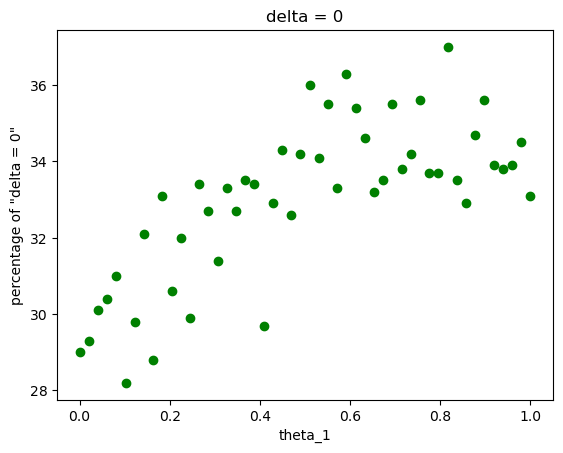

In [9]:
# As theta_1 goes from 1 to 0, plot how "delta=0" changes, and same with "star wins", 
# "branch 1 wins, fraction of 1s on branch 1", etc.

# cnt_1: branch 2 wins
# cnt_2: branch 3 wins
# cnt_3: branch 1 wins 
# cnt_0: delta = 0
# cnt_4 - cnt_0 : star wins

divisor = 1000//100 #TODO
cnt_1_frac = [x/divisor for x in cnt_1]                       # branch 2 wins
cnt_2_frac = [x/divisor for x in cnt_2]                       # branch 3 wins
cnt_3_frac = [x/divisor for x in cnt_3]                       # branhc 1 wins
cnt_0_frac = [x/divisor for x in cnt_0]                       # delta = 0
cnt_4_frac = [(a - b)/divisor for a, b in zip(cnt_4, cnt_0)]  # star wins

# print(cnt_1_frac)

plt.scatter(h1_range, cnt_0_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"delta = 0\"')
plt.title('delta = 0')

plt.show()
# increase

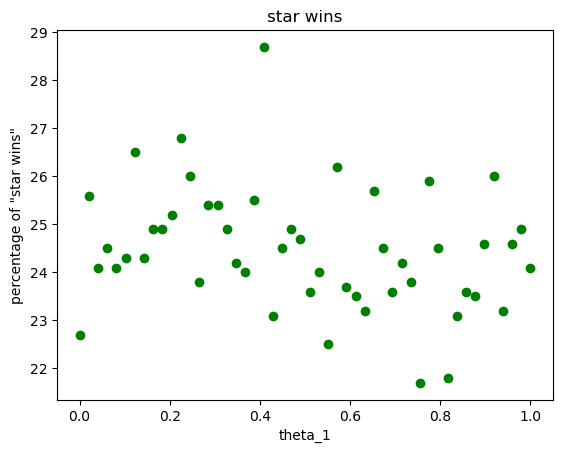

In [10]:
plt.scatter(h1_range, cnt_4_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"star wins\"')
plt.title('star wins')

plt.show()
# flat, around 25

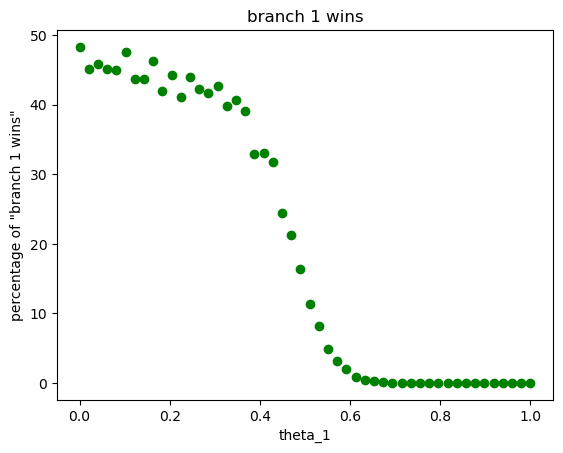

In [11]:
plt.scatter(h1_range, cnt_3_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 1 wins\"')
plt.title('branch 1 wins')

plt.show()
# steep decline

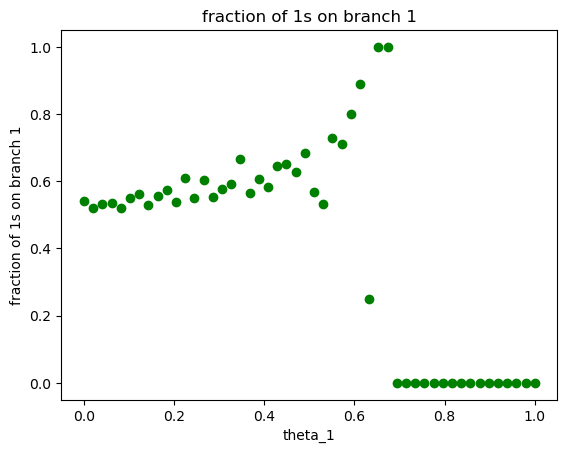

In [12]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_1_unique[u])):
        if theta_1_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_1_unique[u]) > 0: # when bracnch 1 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_1_unique[u]))
    elif len(theta_1_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 1 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 1')
plt.title('fraction of 1s on branch 1')

plt.show()

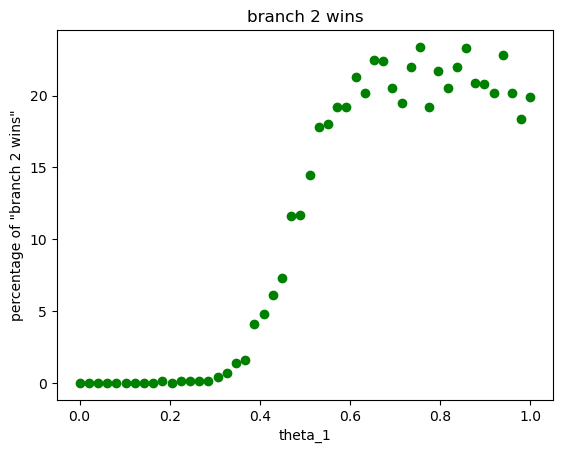

In [13]:
plt.scatter(h1_range, cnt_1_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 2 wins\"')
plt.title('branch 2 wins')

plt.show()
# noisy

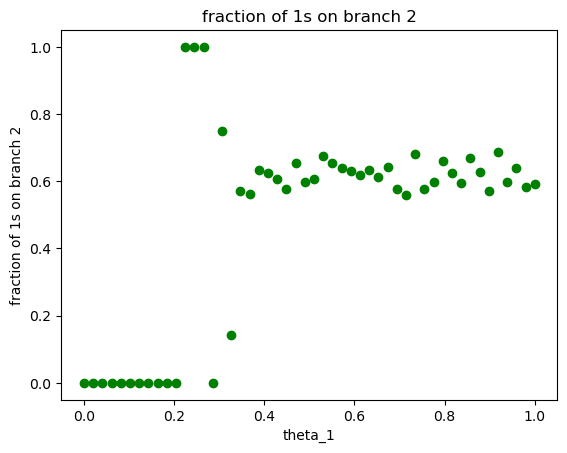

In [14]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_2_unique[u])):
        if theta_2_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_2_unique[u]) > 0: # when bracnch 2 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_2_unique[u]))
    elif len(theta_2_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 2 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 2')
plt.title('fraction of 1s on branch 2')

plt.show()

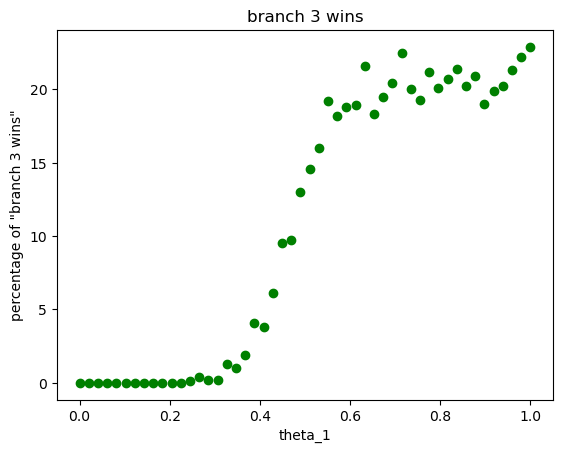

In [15]:
plt.scatter(h1_range, cnt_2_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 3 wins\"')
plt.title('branch 3 wins')

plt.show()

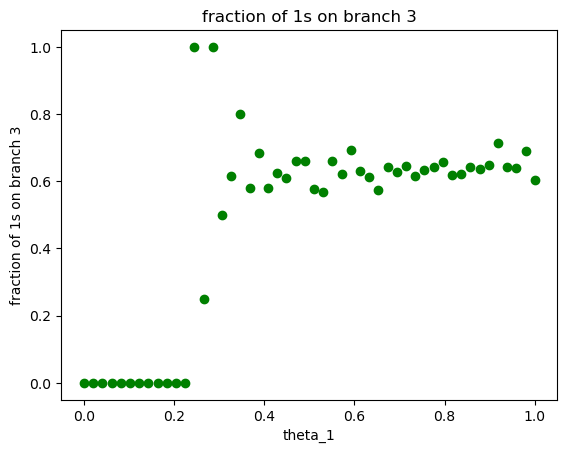

In [16]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_3_unique[u])):
        if theta_3_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_3_unique[u]) > 0: # when bracnch 3 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_3_unique[u]))
    elif len(theta_3_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 3 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 3')
plt.title('fraction of 1s on branch 3')

plt.show()